In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.optimize import fsolve, root
import copy
from pyswarm import pso

pi = math.pi

def pied (x):
    while x>pi:
        x -= pi
    return (x)

def pi2ed (x):
    while x>pi/2:
        x -= pi/2
    return (x)

data = np.load("sphere_render/meas_simulation.npz")
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

ymax, xmax, imax = Is.shape

phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))

ph = 1
th = 1
n = 1.6
kol = 0
fal = 0

def nearest_nonzero_idx(a,x,y):
    idx = np.argwhere(a)
    return idx[((idx - [x,y])**2).sum(1).argmin()]

def fill_with_neasest(ymap):
    a = copy.deepcopy(ymap)
    for y in range (0, ymap.shape[0]):
        for x in range(0,ymap.shape[0]):
            if a[y,x] == 0:
                y1, x1 = nearest_nonzero_idx(a, y, x)
                a[y,x] = a[y1,x1]
    return a



In [2]:
def indtoangle (psj, thj):
    return (psj*2*pi/1000 - pi, thj*(pi/2)/1000)

def angletoind (ph, th):
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    return (phmap*5, thmap*5)

In [3]:
def nextcoords (y,x,c):
    dx = x-c
    dy = y-c
    if dx==0 and dy==0:
        return (y,x+1)
    if dy<0 and abs(dx)<=abs(dy):
        return(y, x+1)
    if dx<0 and abs(dx)>=abs(dy):
        return(y-1, x)
    if dy>0 and abs(dx)<=abs(dy):
        return(y, x-1)
    if dx>0 and abs(dx)>=abs(dy):
        return(y+1, x)

In [4]:
def system (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
        
        
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
#     I = Is[y,x,:].flatten()
#     print (Iup, Ip, ps, I, ph, th, n)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001) or n<1:
        return (100, 100, 100, 100, 100, 100)
    return (
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5]
    )

def systempso (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args
#     print (args)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001):
        return 100
    return (
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5])**2
    )

def systempsoabs (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args
#     print (args)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001):
        return 100
    return (
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5])
    )

def system1 (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
#     print (I)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     if 1.5<n<1.7:
#         return(100,100,100,100,100,100)
    n2 = n**2
    if n2 < 1:
        n2 = n2 + 1
    Ip = 0
    ps = 0
    sps2 = (math.sin(ps))**2
    cps2 = (math.cos(ps))**2
    tps = math.tan(ps)
    cth = math.cos(th)
    sth = math.sin(th)
#     print (n2, sth)
    Rs = ((cth - math.sqrt(n2 - sth**2))/(cth + math.sqrt(n2 - sth**2)))**2
    Rp = ((-n2*cth + math.sqrt(n2 - sth**2))/(n2*cth + math.sqrt(n2 - sth**2)))**2
#     print (I)
    return (
        (Iup/2) * (Rs*(math.sin(ph - angles[0]))**2 + Rp*(1 - (math.sin(ph - angles[0]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (Rs*(math.sin(ph - angles[1]))**2 + Rp*(1 - (math.sin(ph - angles[1]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (Rs*(math.sin(ph - angles[2]))**2 + Rp*(1 - (math.sin(ph - angles[2]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (Rs*(math.sin(ph - angles[3]))**2 + Rp*(1 - (math.sin(ph - angles[3]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (Rs*(math.sin(ph - angles[4]))**2 + Rp*(1 - (math.sin(ph - angles[4]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (Rs*(math.sin(ph - angles[5]))**2 + Rp*(1 - (math.sin(ph - angles[5]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[5]))**2 - I[5],
        n2 - 2.56
    )

In [5]:
xmap = fill_with_neasest(xmap)
ymap = fill_with_neasest(ymap)

In [79]:
# going through all angles and ns
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz, 10))

nl = 1
for ll in range (0, 10):
    nl += 0.1
    psj = -pi
    for ii in range(0,sz):
        psj += 2*pi/sz
        thj = 0
        for jj in range(0,sz):
            thj += (pi/2)/sz
            res1 = system((psj, thj, nl), (I))
            res1 = [abs(xx) for xx in res1]
            res[ii, jj, ll] = sum(res1)
        

In [6]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
# ff = angletoind(ph,th)
# print (ff, res[ff[0], ff[1]])

NameError: name 'res' is not defined

In [69]:
# going through all angles with fixed n
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz))

psj = -pi
for ii in range(0,sz):
    psj += 2*pi/sz
    thj = 0
    for jj in range(0,sz):
        thj += (pi/2)/sz
        res1 = system((psj, thj, n), (I))
        res1 = [abs(xx) for xx in res1]
        res[ii, jj] = sum(res1)
        

In [34]:
# solving this shit for one pixel
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

sol = root(system, (ph, th, n), args=(I), method='lm', tol=0.000001)
print (sol.x[0], sol.x[1], sol.x[2])
res1 = system((sol.x[0], sol.x[1], sol.x[2]),(I))
res1 = [abs(xx) for xx in res1]
res = sum(res1)
print (res)

0.39564903020521547 0.772063916561229 1.6
1.240327285323417e-16


In [10]:
# solving this shit for one pixel using pso
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
print (ph,th)
# n = 1.6

# sz = 1000

lb = [ph-0.5, th-0.5, 1.1]
ub = [ph+0.5, th+0.5, 1.9]
for ii in range(0,10):
    I = Is[y,x,:].flatten()
#     sol, fopt = pso(systempsoabs, lb, ub, args=(I), minfunc=1e-20, minstep=1e-20, swarmsize=100, maxiter=2000)
    sol, fopt = pso(systempsoabs, lb, ub, args=(I), swarmsize=1000, maxiter=2000)
    phis[y,x] = sol[0]
    thetas[y,x] = sol[1]
    ns[y,x] = sol[2]

    print (sol[0], sol[1], sol[2])
    print (fopt)

0.39564903020521547 0.7720639165612292
Stopping search: Swarm best objective change less than 1e-08
0.3956490517184262 0.772063959677741 1.599999961911436
9.160571990199373e-09
Stopping search: Swarm best objective change less than 1e-08
0.3956490010124137 0.772063965561543 1.5999999930705155
2.451737563316514e-08
Stopping search: Swarm best objective change less than 1e-08
0.08719424386048691 0.8604595155232257 1.578733015923155
0.001531741583118508
Stopping search: Swarm best objective change less than 1e-08
0.3956489266467852 0.7720635734399454 1.6000002942292495
4.8901873399634366e-08
Stopping search: Swarm best objective change less than 1e-08
0.39564925486524594 0.772063208784152 1.6000007535162684
1.1604886132957071e-07
Stopping search: Swarm best objective change less than 1e-08
0.3956493131888483 0.7720642506364737 1.599999743770402
1.1777484451320347e-07
Stopping search: Swarm best objective change less than 1e-08
0.39564914717831706 0.7720639593981203 1.5999999734069625
4.54

In [ ]:
# solving this shit for whole image using pso
y = 220
x = 320
# ph = phis0[y,x]
# th = thetas0[y,x]
# n = 1.6

# sz = 1000

lb = [-pi, 0, 1.1]
ub = [pi, pi/2, 1.9]
for x in range(0, xmax):
    if x%50 == 0:
        print ("x =", x)
    for y in range (0, ymax):
        if np.isnan(dm[y,x]):
            continue
        I = Is[y,x,:].flatten()
        sol, fopt = pso(systempso, lb, ub, args=(I), minfunc=1e-15, swarmsize=500, maxiter=500)
        phis[y,x] = sol[0]
        thetas[y,x] = sol[1]
        ns[y,x] = sol[2]
        
# print (sol[0], sol[1], sol[2])
# print (fopt)

In [11]:
lb = [-pi, 0, 1.1]
ub = [pi, pi/2, 1.9]
phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))
c = 230
x = c
y = c
for i in range (0, 60000):
    if np.isnan(dm[y,x]):
        continue
    I = Is[y,x,:].flatten()
    
    if i%1==0:
#         sol, fopt = pso(systempsoabs, lb, ub, args=(I), minfunc=1e-15, minstep=1e-15, swarmsize=10000, maxiter=2000)
        ph0 = phis0[y,x]
        th0 = thetas0[y,x]
        lb = [max(-pi, ph0-0.5), max(0, th0-0.5), 1.1]
        ub = [min(pi, ph0+0.5), min(pi/2, th0+0.5), 1.9]
        sol, fopt = pso(systempsoabs, lb, ub, args=(I), swarmsize=2000, maxiter=2000)
        ph = sol[0]
        th = sol[1]
        n = sol[2]
        print (ph, th, n)
        print (phis0[y,x], thetas0[y,x], 1.6)
    else:
        try:
            sol = root(system, (ph, th, n), args=(I), method='lm', tol=0.000001)
        except:
            print (ph, th, n)
        ph = sol.x[0]
        th = sol.x[1]
        n = sol.x[2]
        
    phis[y,x] = ph
    thetas[y,x] = th
    ns[y,x] = n
    y,x = nextcoords(y,x,c)

Stopping search: Swarm best objective change less than 1e-08
2.857175378315179 0.008358618314369357 1.5944599405273818
2.357175378315179 0.27407186881601825 1.6
Stopping search: Swarm best objective change less than 1e-08
2.330393367817687 0.26788064987353827 1.5999463972929302
2.3302847434482965 0.2672407844735892 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3573824422295075 0.2605856442561839 1.5999733809966927
2.3573295277599837 0.26015489120293556 1.6
Stopping search: Swarm best objective change less than 1e-08
2.508179139781181 0.1860589639003236 1.6160175772524512
2.382838471075378 0.26714650705621074 1.6
Stopping search: Swarm best objective change less than 1e-08
2.40676055856405 0.2737877009229948 1.6000531659050576
2.406901031609481 0.274436466641065 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2083955784191285 0.4260531898335475 1.5368606690321502
2.3813962480638415 0.2811080210093465 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
2.2421265015020544 0.24739951920741562 1.5999997052683963
2.2421255780880647 0.24739324391155046 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2679737946026397 0.2396600800336851 1.5999999521528256
2.2679736467536236 0.23965767362075885 1.6
Stopping search: Swarm best objective change less than 1e-08
2.294989529845576 0.23224885511054957 1.6000001166908404
2.294989843473768 0.23225200624832124 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3248273128620607 0.22477379023575517 1.5999996670879255
2.3248246040930773 0.2247535402094769 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5427570538993995 0.10024823004385819 1.601400084364465
2.3569054304284807 0.21847602578072264 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2331362760441857 0.34251328465892394 1.5692063928032365
2.3881116754109484 0.22474561902364104 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.4952850950867145 0.3063582041471355 1.6000018062761674
2.495286463594754 0.30637256496255266 1.6
Stopping search: Swarm best objective change less than 1e-08
2.360756866914587 0.3959068085984958 1.556947242009783
2.4689475141691704 0.31222944972494304 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2633682188070803 0.46782311909155727 1.51370013159049
2.445586210397189 0.3186721754640419 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2604455317070657 0.462193009101274 1.5214950318137592
2.4225713710609886 0.3249136555716503 1.6
Stopping search: Swarm best objective change less than 1e-08
2.400712027939147 0.33163809244818415 1.6000406845742465
2.4007821931791313 0.3319081905769839 1.6
Stopping search: Swarm best objective change less than 1e-08
2.780926595178424 0.0668383407363751 1.6315645860454537
2.3781677466316973 0.33937062881718394 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
2.7667086492511914 0.10024308303690166 1.6347825867347017
2.3567878971663587 0.3617106825185094 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6784053313190195 0.12530913999388923 1.6423039304135523
2.3365663711468625 0.3543070108022896 1.6
Stopping search: Swarm best objective change less than 1e-08
2.315034668742343 0.3469433762221406 1.5999999072420703
2.3150346101781714 0.3469425879937846 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2931831421367037 0.33996497502662537 1.5999995771465243
2.293184895047507 0.3399664298564208 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2713021343772573 0.33271461666391317 1.600000604040262
2.271302800013303 0.33272060131278947 1.6
Stopping search: Swarm best objective change less than 1e-08
2.248358689846176 0.32627743975314905 1.600000630330673
2.248357896069246 0.3262669026084637 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
2.7828796942051404 0.1252883189072743 1.6669290004172979
2.396749946886023 0.3620427022559786 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6712615191585956 0.12532184459097956 1.6324843142904577
2.3761457108459236 0.36888126121138387 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4697852024260816 0.28403427289274114 1.6333714174905591
2.356851169283889 0.37594784726188285 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3371816547858515 0.3688438508827179 1.600000941014699
2.3371796721158193 0.3688495648390766 1.6
Stopping search: Swarm best objective change less than 1e-08
2.446065902363576 0.2672037767130948 1.6374421441800207
2.3165657192304763 0.3618543323421286 1.6
Stopping search: Swarm best objective change less than 1e-08
2.443695162047055 0.23778612904423085 1.6397128777436236
2.2958140296971705 0.3551528299313933 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
2.6288641906447334 0.3156385078375917 1.6000002793734742
2.628864978583645 0.3156414286912034 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5668511280214394 0.350867238111613 1.5908871369051176
2.601647098369084 0.320723882176132 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5338266802140184 0.3675753978247328 1.5897732678292338
2.5755095608481313 0.3257871974215016 1.6
Stopping search: Swarm best objective change less than 1e-08
2.61348810890775 0.27571090538885934 1.6211926142666004
2.5512084690543864 0.33178819384870684 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5265400550570796 0.3374596999378738 1.6000001033240048
2.5265403313979737 0.33746095671762255 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5022408976360757 0.3440147716012033 1.6000000254932283
2.5022409529921315 0.3440147240181783 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
2.283988637650731 0.426089683255546 1.5204817728783573
2.572949359246462 0.19594873555191608 1.6
Stopping search: Swarm best objective change less than 1e-08
2.304155959132904 0.4427656000888365 1.5134881487279959
2.599798449717743 0.2039491893850952 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3798653666261207 0.4194694257728714 1.532054193669232
2.624765423447466 0.21275370410764666 1.6
Stopping search: Swarm best objective change less than 1e-08
2.647519759005807 0.22117705459643944 1.5999852417935099
2.647451374860109 0.22072553805369444 1.6
Stopping search: Swarm best objective change less than 1e-08
2.667735955474099 0.22930324868626556 1.6000018514734564
2.6677399344323467 0.22936466031105315 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6868307354120384 0.23769584753658135 1.6000007240591818
2.686832123846526 0.23769862924565352 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
1.6976773756974934 0.46989682584352177 1.4928080529515946
1.927861624643269 0.2705216084359757 1.6
Stopping search: Swarm best objective change less than 1e-08
1.972910011878267 0.23392732081455503 1.6080397891593943
1.941360737098648 0.2611545090287633 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9553245072907854 0.2517689236860449 1.600000102001317
1.9553246503886854 0.25177051507437376 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9403000406115656 0.26732477648934105 1.592049943886199
1.972009825159789 0.24226110807621598 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0242864926451705 0.200504772508528 1.6014796847116177
1.9874176573662659 0.23363302846532294 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9681148387959386 0.2607113135179277 1.600852696366991
2.0060539295721727 0.2248259530337167 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
2.431083002641977 0.3912966841559893 1.5999984633506668
2.431082481181577 0.391288598720974 1.6
Stopping search: Swarm best objective change less than 1e-08
2.41145826739507 0.3976132867424357 1.6000000086403292
2.4114582199582735 0.3976135837130036 1.6
Stopping search: Swarm best objective change less than 1e-08
2.392685238714501 0.4045690116126174 1.6000002579322292
2.392685210375161 0.4045715237833492 1.6
Stopping search: Swarm best objective change less than 1e-08
2.364880981095811 0.4260537082250433 1.5968969713667955
2.374826883224363 0.4109705660216636 1.6
Stopping search: Swarm best objective change less than 1e-08
2.356991587028572 0.4181646617725097 1.599999883971764
2.3569914727200874 0.4181643072960359 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3398400243092965 0.41128941259698676 1.5999998389363972
2.3398400613351833 0.41128915690047596 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.957744968993902 0.054317042970757026 1.5794980496581275
2.610503459143734 0.16941432816481827 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8054654629130087 0.07532407231685237 1.5934567287186452
2.63939454701814 0.17735216608945342 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6656236594241407 0.185986321512557 1.6000007976841821
2.665630699918232 0.18606116380003426 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4548164291147994 0.3926379745781924 1.5502331206629447
2.6894206578498903 0.19491893449125056 1.6
Stopping search: Swarm best objective change less than 1e-08
3.013456384339657 0.03343577057342707 1.58688093881975
2.711392187933889 0.20360379673176163 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7590081083831297 0.21718689943698688 1.6039091242125212
2.729913855916538 0.21243064013912472 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
2.3649027504744384 0.1336364679172403 1.6353310835549166
2.0666947749004323 0.3481487480297868 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0498759995974787 0.3412681999186266 1.600502950575354
2.040754536597867 0.3434057246345939 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9566426905660437 0.37998009523044596 1.5752676547164635
2.0152484264950745 0.3385783950025579 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0728431208282236 0.27562356388558157 1.6196249947050332
1.987269335851172 0.3342723120289673 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9588490781612016 0.3300815011472597 1.5999998243221951
1.958849093555544 0.33007975455148497 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8701928045131568 0.3938966568940035 1.5774325259650919
1.9312667440095623 0.32630739197527125 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
2.711665552679711 0.43123076224555457 1.537323964139234
2.8748813622743032 0.28420964608351423 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6422299981970525 0.5179513793001093 1.4808798968605643
2.8850906819068767 0.2936240532741736 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7947680735067655 0.4093443180148089 1.561557457579331
2.8923542706988736 0.3043826482465152 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7986562030606374 0.4093455445695184 1.559295328657727
2.901504921923706 0.31441844788000506 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9089855931011805 0.3241190560101339 1.6000000259106284
2.908985648202513 0.3241196127823944 1.6
Stopping search: Swarm best objective change less than 1e-08
2.895486290309888 0.28501396904950177 1.6011826996152998
2.8789320852147613 0.3270168253446246 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
2.0287435555764115 0.18617360843372321 1.6537553604087685
1.802999695216182 0.324406439911468 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7559200443660328 0.3315305219548248 1.5930582563541726
1.7734010296439007 0.32243490849931494 1.6
Stopping search: Swarm best objective change less than 1e-08
1.780643189292325 0.3116721552993456 1.599999891265566
1.780643006603742 0.31167131894573735 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7386807948254979 0.3558500300191239 1.583695250935443
1.78778175892864 0.3019937902652923 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6994469034022606 0.3675827829504204 1.5679941830800417
1.7944466911749417 0.2915646568085006 1.6
Stopping search: Swarm best objective change less than 1e-08
1.813327719236204 0.2888667952095319 1.6054504056136738
1.8028399776793573 0.2815158077713604 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.876400530126691 0.38917083801103264 1.5726942113310833
2.9452887916248565 0.33237217558690374 1.6
Stopping search: Swarm best objective change less than 1e-08
2.915682587621146 0.3349142744871033 1.6000026712863236
2.9156835753843207 0.33492796036350786 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8865337694637905 0.3374107770535366 1.5999989319664256
2.8865317635584136 0.3374064164567497 1.6
Stopping search: Swarm best objective change less than 1e-08
2.857997258155652 0.3399582626309614 1.5999988031947951
2.85799347696615 0.3399512587773899 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8478269070113034 0.3341589000392313 1.6045327700549155
2.830315748544611 0.3430694473806426 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6372486248586147 0.47837054278713265 1.5089399167703659
2.802532080488196 0.34618213420768557 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
2.0632282534011317 0.1341464629976239 1.6445975200036664
1.7666103042433243 0.33217838191058713 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7940563094599449 0.2958860542126059 1.6180783025542766
1.737934121912157 0.33054379118226657 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7172658111548078 0.3508531730904865 1.5873213110575721
1.7431306121884071 0.320391689091056 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9959573863885267 0.1587222249278827 1.6276699488278255
1.7489739468202519 0.30976529501992484 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6983150268114755 0.3494105262138252 1.5818886085209534
1.7553904559860534 0.29996896004395773 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9869002987369309 0.13368926718759494 1.6213290466192496
1.7610565355358887 0.28970011556069925 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
2.956402242476548 0.30002166873375613 1.5999998263641224
2.9564018358563255 0.3000197439406882 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9630054109056174 0.309986913378372 1.6000013023421666
2.9630078130686 0.30999582810474763 1.6
Stopping search: Swarm best objective change less than 1e-08
2.968716523642959 0.32050196089441607 1.6000000121541056
2.9687164849478935 0.3205019723252956 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9574030259705895 0.34229202167856565 1.593000117525126
2.9744682919809438 0.3301247740854561 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9780384332930625 0.3409606247727088 1.599999195702199
2.978036456015854 0.3409536346550568 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8983571346873105 0.38786817260828804 1.5773714511371562
2.9503640534744613 0.3424193507699399 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.8597297308131142 0.4822650644776867 1.5361561829356127
1.9536860999827295 0.363503069656849 1.6
Stopping search: Swarm best objective change less than 1e-08
2.056746796777525 0.2673122683777292 1.632258035476012
1.9276273231291452 0.359997851657801 1.6
Stopping search: Swarm best objective change less than 1e-08
1.905126243765783 0.3461115238760955 1.6008039444289757
1.9004979475341721 0.35647515753721815 1.6
Stopping search: Swarm best objective change less than 1e-08
2.063421625390159 0.1921760669754744 1.6378656853682354
1.8732268212363863 0.35310189244469353 1.6
Stopping search: Swarm best objective change less than 1e-08
1.873970581265945 0.29462651053120525 1.6040903251136462
1.8456375320234009 0.3502226913131343 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8457465887495446 0.2923993965026598 1.6033213889325029
1.8175656914403846 0.3475789631219956 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
2.8996700380687788 0.19057653333843017 1.600000155087079
2.8996703969832716 0.1905831171126753 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9120790171833506 0.2004074556204051 1.599998326012017
2.9120734640617703 0.20034384187737642 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9233398260919063 0.20988929547765647 1.6000000170817839
2.9233398827925248 0.20988960455142894 1.6
Stopping search: Swarm best objective change less than 1e-08
2.895717928245865 0.2589696167884211 1.5941994356127178
2.9341897439314795 0.21915503590055668 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9431855397842037 0.2283771360033442 1.5999928877424723
2.9431726785696313 0.2282273217176671 1.6
Stopping search: Swarm best objective change less than 1e-08
2.951431207307056 0.23774985612549113 1.600000058064224
2.951431655114203 0.23774742259447265 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
2.2502945383407083 0.4523241494186983 1.5976247067330072
2.2580941738874545 0.44984207825910527 1.6
Stopping search: Swarm best objective change less than 1e-08
2.482996829682105 0.2506133493188974 1.6923899541610925
2.2405644240453255 0.44288094794899874 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4876704289527067 0.22085763428650118 1.6954843394789532
2.2224879511148052 0.4372858268280126 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4142340718660353 0.2506171245105106 1.6744167068338962
2.2047478619721463 0.4303904732893657 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1756707418697907 0.42700725856130917 1.5973376269080923
2.1852941684440816 0.42440348047451815 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1654708506000984 0.4188439209965633 1.5999996788167572
2.165470383357002 0.41884285527631065 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
1.7730618685587627 0.2338920677649647 1.5904902179915874
2.0121256392517837 0.0842975321798092 1.6
Stopping search: Swarm best objective change less than 1e-08
1.572132136353146 0.4344042939065764 1.5130661555461955
2.0675540212227212 0.07564535095509291 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1370896028657516 0.06690782113583749 1.6000002007525866
2.1370892059549944 0.06689464102685172 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2318351831992618 0.05858232383440777 1.5999993023399368
2.2318354061669545 0.05857503163540396 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9996969069839774 0.2589741441868732 1.5931078590966763
2.358097860717292 0.050740500360350924 1.6
Stopping search: Swarm best objective change less than 1e-08
2.479094344772599 0.05860739580142771 1.6000000986397684
2.47909450569207 0.05860509772607768 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
2.6571158145558376 0.40726294810661073 1.6053503443915371
2.642046429807843 0.40697622042803966 1.6
Stopping search: Swarm best objective change less than 1e-08
2.620279899905565 0.4117373673733674 1.599989943057227
2.620267310051494 0.41168572880898124 1.6
Stopping search: Swarm best objective change less than 1e-08
2.680839055771274 0.3749699776394826 1.6367553386371914
2.5996525644307993 0.416524681493337 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5799561173002057 0.42167157483505524 1.5999986053086455
2.57995349149305 0.42166754860176536 1.6
Stopping search: Swarm best objective change less than 1e-08
2.778459485202068 0.25896801374187484 1.679735188644049
2.5597525059841164 0.4277164102537795 1.6
Stopping search: Swarm best objective change less than 1e-08
2.671204405883346 0.31746635703698256 1.6650583359381357
2.5401664744994554 0.4332960222425263 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.8420835738354453 0.19218646122271443 1.6407419517216697
1.647769971363188 0.3263320420521012 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6498470292855083 0.3160909085880362 1.6000000653219988
1.6498472250862797 0.31609156159466434 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6795086999671882 0.29238873182559977 1.605306485934216
1.6523715500138056 0.3056576384657354 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6542498829724037 0.29562118739095056 1.5999997055985655
1.6542496563114493 0.2956178253326287 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6572156165965204 0.2851475312217385 1.6000000882600813
1.6572159486286355 0.2851491974400017 1.6
Stopping search: Swarm best objective change less than 1e-08
1.660901122139251 0.2750337693397261 1.6000002017772377
1.6609012251042814 0.2750359111674833 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
3.038358412794604 0.24455071554275803 1.5999994216257913
3.0383563912972016 0.2445424976467464 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0425535351001107 0.254573697414405 1.5999999775997253
3.0425534889624735 0.25457347358660304 1.6
Stopping search: Swarm best objective change less than 1e-08
3.048085280948309 0.266304411148915 1.599879198083054
3.0476859122466795 0.26453843879005784 1.6
Stopping search: Swarm best objective change less than 1e-08
3.051170575124739 0.27493103632787574 1.5999949667317013
3.051149119304651 0.27485089908321964 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0820162457539233 0.2673169654573692 1.603735093706396
3.0544513051691173 0.28505922304122605 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1298406143232884 0.2660409911549188 1.623279085345059
3.0572258188110477 0.29555566526851423 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
2.4558456189211437 0.325804471436628 1.7043343034001892
2.2656683100006996 0.47850117946914134 1.6
Stopping search: Swarm best objective change less than 1e-08
2.515867093625292 0.2339208137635537 1.7129526650787865
2.248884820754686 0.4723272963720602 1.6
Stopping search: Swarm best objective change less than 1e-08
2.398587499012662 0.31744741228680334 1.680390943152418
2.2308074168239234 0.4653697501653572 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2029530334538 0.45111551550415413 1.5963143041881487
2.2132809552193513 0.459219691739568 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4117784724579185 0.25897420857092535 1.696692171896662
2.1955457219699577 0.45308301655748684 1.6
Stopping search: Swarm best objective change less than 1e-08
2.467667123807268 0.2089843057654284 1.7059366032004415
2.1776523931124423 0.447334135256796 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.4387791769281637 0.30074763443659414 1.5773457343849218
1.6853400365626259 0.1378642694706287 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4223855326959516 0.30393437925065164 1.5735281391488058
1.6950522459269934 0.12781909214608297 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7056186893046232 0.11791347049277061 1.6000009756331457
1.7056143803319748 0.1178278736978343 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3730647842700427 0.35921993846037015 1.5584314258166627
1.71884524534355 0.10781291701410113 1.6
Stopping search: Swarm best objective change less than 1e-08
1.284991129051293 0.44276101924194944 1.5156708647698247
1.7320938377636546 0.09772091578637816 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2500471886022648 0.4761768478222563 1.493176687771046
1.7500471886022648 0.08784574361876557 1.6
Stopping search: Swarm best objecti

Stopping search: Swarm best objective change less than 1e-08
2.9959130757409227 0.38090199067900715 1.5999996809459438
2.9959127419563534 0.3809006536918547 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9778292526864956 0.3675791510326458 1.6062947633593618
2.969573342812261 0.3823156147350946 1.6
Stopping search: Swarm best objective change less than 1e-08
2.942917878203605 0.3845912026726915 1.6000046850398302
2.942927495222312 0.38461074317331884 1.6
Stopping search: Swarm best objective change less than 1e-08
2.917786865977639 0.3867469634669109 1.5999998012447632
2.9177865657824853 0.386745688771531 1.6
Stopping search: Swarm best objective change less than 1e-08
2.921204798794559 0.36636586936302173 1.6142278226361526
2.892545503492976 0.38918123109205244 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8677176502416386 0.3919683583886649 1.5999999233233861
2.867717362889679 0.391967827833747 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
2.372716255722973 0.13364405434125948 1.6683449601882587
2.0058466950160483 0.4155621084345478 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0397302119097467 0.35874491582476886 1.628316488094226
1.9843391116337403 0.4116571762727925 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0383882314314867 0.350867219804705 1.63518349659631
1.9620721220652664 0.4081801756477129 1.6
Stopping search: Swarm best objective change less than 1e-08
2.234501245703089 0.15954779455072735 1.6637800288508642
1.9390383703275693 0.4045694501796008 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9968715309023992 0.32579653577755363 1.635716893133404
1.915845315973453 0.4012607189365011 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8735330622537583 0.4009931798669319 1.591504329505937
1.892702156671085 0.3981287682847171 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.7782116808759312 0.02623193122356164 1.5999997616918087
1.778211887538529 0.026253688476402182 1.6
Stopping search: Swarm best objective change less than 1e-08
1.909499905525745 0.01640152723826522 1.599999448150532
1.9095002163319579 0.016463771003013595 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1719105493298105 0.07519443657750054 1.6122010392298551
2.3730891461758503 0.007694645937329595 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3138881349471023 0.30909525067658583 1.5879980384697827
2.80766781258002 0.01665583496990274 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9346486401029526 0.02639910272964463 1.6000004856304015
2.9346460958404035 0.026280999645673046 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9926107452904476 0.04100425426866126 1.6000801250464252
2.9925227096975573 0.036186835807090666 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
2.903036737220093 0.31745139835171227 1.6343243671561645
2.826534600022131 0.40691469960441146 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9057431498109825 0.30951829332361636 1.6443371833682443
2.803616613991411 0.4098640457089202 1.6
Stopping search: Swarm best objective change less than 1e-08
2.641944280528038 0.5263008514784271 1.5096873298036846
2.782142166947374 0.41273367089653845 1.6
Stopping search: Swarm best objective change less than 1e-08
2.759742026242339 0.41624529165365526 1.6000014878694049
2.759754956369196 0.41625425567640345 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6230582957294617 0.5179465092634855 1.5181071036711855
2.738502287425697 0.4200146046087891 1.6
Stopping search: Swarm best objective change less than 1e-08
2.737475834300532 0.4093457545236189 1.6149392390547965
2.7172103841326067 0.4241461697532165 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
1.9900016551603301 0.33126546763435627 1.6457708123301902
1.8850566179627553 0.40666971516228334 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1929957033845864 0.17541534403505996 1.6699600613441912
1.861569395577244 0.4041726557085394 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8505427322487669 0.3842838149367437 1.6118091908322953
1.836619058081392 0.4012125309646762 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8132606720676354 0.3989204678814188 1.5999999726573473
1.8132604150349818 0.3989205646066764 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7897020583685639 0.42577871853744187 1.5976528898690292
1.7886021006295811 0.39652186383439686 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9013732921688111 0.2935587935888008 1.6586748877415118
1.762967532235184 0.3948159405115548 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-0.7798134625867079 0.15326172731234253 1.6045140139924163
-0.7938577812831915 0.006822896058148141 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4212630291584096 0.0211040180528964 1.6000941686697885
-2.4213760061463274 0.007281918948911144 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8440104384684792 0.021561573254811433 1.6000380746916936
-2.844062369807414 0.01635233443605169 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.961654497727361 0.029798012019894727 1.6000378708566694
-2.9617347426227547 0.026081434243765595 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0108440588026855 0.03623004333313402 1.5999999067027888
-3.010843942933078 0.03623525037184474 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.037376107345111 0.046321387501180485 1.6000000399221799
-3.037376062438002 0.04631963463221152 1.6
Stopping search:

Stopping search: Swarm best objective change less than 1e-08
2.9529622646223213 0.35086709198648613 1.6301204772547084
2.880651895815756 0.4110502938193368 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8573265075986636 0.41353376107827555 1.6000002566933422
2.857326321622081 0.41353432798975676 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8483963165026003 0.40934496864855874 1.6051877595945045
2.8340133021505527 0.4158919673894657 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8114584287736606 0.4191610352868875 1.5999993251089795
2.8114572988134565 0.41915932196960104 1.6
Stopping search: Swarm best objective change less than 1e-08
2.790018897570374 0.4223062178147882 1.6000035880275358
2.7900251139444237 0.4223213079928351 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6846936112598967 0.4955606245269793 1.54325857073176
2.7682623776848687 0.42576295097473527 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
1.9621944624316183 0.4408592307331373 1.594411256165014
1.9655641121207297 0.43013290072190213 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9649556186403292 0.4039400643751771 1.6135712287997257
1.9437411823303934 0.4260652618294138 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9084632113257245 0.43611025614245613 1.593386304229237
1.9214985064919892 0.42252527506879456 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0063515078592515 0.33415260196684077 1.652197662976285
1.9002132642124752 0.41925734043130736 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1669056595133163 0.18402241070409317 1.6853346471317183
1.877658334847228 0.41619324408027364 1.6
Stopping search: Swarm best objective change less than 1e-08
2.06070418296686 0.22790113493649275 1.671524400141159
1.8541685617604668 0.41421736040312995 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
1.3122570343857636 0.06024688577352069 1.6000430971258772
1.3121905791451993 0.05823792012277964 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9584079717533024 0.21718483358405336 1.5999809784646362
1.2615773938398513 0.04835376937473685 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9755618818812098 0.16707618387350742 1.6103298798821426
1.1827238620195164 0.038858768457823684 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0475012812654432 0.029593564510285744 1.5999995600583798
1.047500372037157 0.029623427132882775 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5127453842696277 0.15020738433021727 1.5921704909290342
0.8060489781611241 0.02134897006978804 1.6
Stopping search: Swarm best objective change less than 1e-08
0.36167881941982033 0.017687694535838055 1.6000160212635108
0.3616627205595637 0.015891093294655503 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
3.128249612554878 0.4068319877478853 1.6000004199735294
3.128250458681223 0.4068333025947256 1.6
Stopping search: Swarm best objective change less than 1e-08
3.103542297053399 0.4068446227850157 1.6000002191307543
3.103542554190876 0.40684565220214874 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0940086222994654 0.39264611069968247 1.609963653891503
3.079794191852126 0.4073732713024997 1.6
Stopping search: Swarm best objective change less than 1e-08
3.072650057732116 0.39564535403077605 1.6100129048044012
3.055371415791299 0.40791446231048695 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0509765213138196 0.39880569242455166 1.6103160291125507
3.029892310288916 0.4094166656396299 1.6
Stopping search: Swarm best objective change less than 1e-08
3.018603457172039 0.384769289469672 1.6097979560872575
3.005618839195658 0.4103939242727518 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
2.507523746761992 0.20061858233216268 1.731522347621172
2.1823298963089615 0.49655440355791863 1.6
Stopping search: Swarm best objective change less than 1e-08
2.165825866179402 0.4912465772684463 1.5999999717572633
2.1658259747890853 0.4912463450060056 1.6
Stopping search: Swarm best objective change less than 1e-08
2.148289820872387 0.4855835888193623 1.5999977583679403
2.148290276794371 0.4855774373025597 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1305568611399783 0.4801816038873848 1.5999990645515063
2.130554240167084 0.48017700430054105 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0900594785320066 0.47078217683123635 1.5890632931138777
2.112870179595758 0.4750871601991389 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4397432253863047 0.16110770266919533 1.705772245132794
2.0940902285247636 0.46978743595683037 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
1.4439010430732333 0.19673555342538762 1.6000064436141808
1.4439242250910043 0.19705844152674545 1.6
Stopping search: Swarm best objective change less than 1e-08
1.436357614187977 0.1869132171416078 1.6000028002998739
1.4363740749291964 0.18714553216952082 1.6
Stopping search: Swarm best objective change less than 1e-08
1.35104194386524 0.22557790200075967 1.5950026897063416
1.428564519172258 0.1779177570542941 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4195889955902725 0.17342916923998639 1.5999804651909606
1.4192892082402229 0.16857987968324878 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2865425063199816 0.28402494832695535 1.5966543397267912
1.4098853783191452 0.158810692265371 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3987425818749992 0.1491864829206758 1.6000000029762798
1.3987424548330707 0.1491850949748834 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-3.0499012972587307 0.2644462331228174 1.6000002537486606
-3.049900765626892 0.2644485794132054 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.05326902892157 0.274657124543857 1.5999997231960177
-3.053269686004979 0.2746555072730491 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.004486269077243 0.2589876455060939 1.6221821928567441
-3.0565531917518944 0.2847930451521538 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9974447422578963 0.25907528149645315 1.6211141771128994
-3.0590469102682682 0.2951466043249546 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0021915757109827 0.2589854198295565 1.6179702933450688
-3.0617820557882975 0.30557924595695524 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.064591811733698 0.31592524032028374 1.60000430831176
-3.064586295337557 0.315955448110457 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
2.4200275327783807 0.5219588023549309 1.5922113381046046
2.447187895285358 0.5422622825406916 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4338957187964665 0.5492301765203021 1.6000000228518079
2.433895686705957 0.549230205730087 1.6
Stopping search: Swarm best objective change less than 1e-08
2.437406863621711 0.5862209571737527 1.595646549090253
2.41975139555001 0.5558965415853636 1.6
Stopping search: Swarm best objective change less than 1e-08
2.42113178569294 0.5680522541108539 1.6027426733518797
2.406184548233731 0.5625998509488034 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5782773788037243 0.37591286892619374 1.7407880508842997
2.3937494535482724 0.5692751603567427 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3894177172984192 0.5764241558206228 1.6011368913733823
2.380622749274648 0.5758098929899298 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.4869257336204045 0.41809358804778246 1.5999998751769215
1.4869255600044617 0.4180930530378741 1.6
Stopping search: Swarm best objective change less than 1e-08
1.693909384504383 0.23390801186964158 1.653186660559982
1.484838766835999 0.4083648937593723 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5095369049742304 0.38411273300905346 1.6117915806861305
1.4830206353124356 0.3983167413540922 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5161741118367313 0.32580532366221815 1.6104313685718568
1.4802844885776403 0.3888926237559755 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7734599509194022 0.13366385817972506 1.6366233097969898
1.47840726951799 0.3792370600140992 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4844698313936469 0.3641981509431347 1.6014352112756018
1.4759641841436184 0.3693555521961879 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
-2.2007100038704057 0.06565679583800797 1.6000298463386593
-2.2016327318898448 0.04387609768532148 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7308419548726324 0.32760349516641685 1.595470658482304
-2.362833491809988 0.0506008307997486 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6830551293953886 0.15870422529659706 1.5994855981468468
-2.4872590053120733 0.05829213421132973 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7378602167386497 0.14201809537291354 1.6051028175028157
-2.580795122314303 0.06675974498051253 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4760148150771877 0.05011843366168132 1.6284010250016727
-2.651519491118345 0.07531693751105004 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.843775163884039 0.2923830165594459 1.655962375293666
-2.7073640008761664 0.08434532902898584 1.6
Stopping search: Swarm b

Stopping search: Swarm best objective change less than 1e-08
2.965318467956761 0.43304522600764583 1.5999999796541537
2.965318452125516 0.4330451583124105 1.6
Stopping search: Swarm best objective change less than 1e-08
2.94289263546778 0.4348271546246065 1.6000002203623522
2.942893397173264 0.4348295588944652 1.6
Stopping search: Swarm best objective change less than 1e-08
2.928058340614607 0.4288012442765773 1.6031561645517116
2.9208746915167256 0.43668476694991093 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9284666511901083 0.4009909757402279 1.6150526501051883
2.898305864131505 0.4392611086716031 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8758657987130327 0.441760674981253 1.6000000978151716
2.8758657667940755 0.44176084251571424 1.6
Stopping search: Swarm best objective change less than 1e-08
2.854748843151611 0.4444117169604978 1.5999992401042769
2.854748604210851 0.44441065832970805 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.1088418660709722 0.49733560733787 1.6000002488287415
2.108842111749652 0.4973356313046768 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0938836383463304 0.4952594159467734 1.6017137749653798
2.0913442623910052 0.4926083926194201 1.6
Stopping search: Swarm best objective change less than 1e-08
2.073481093928928 0.487396595634118 1.6000001071516075
2.07348107417469 0.4873968714234537 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4145933740335788 0.18064089453901835 1.7256567682853703
2.0559301345062524 0.4824411654972196 1.6
Stopping search: Swarm best objective change less than 1e-08
2.031882025656277 0.5019633294652626 1.5932487756102658
2.037226792596603 0.4780248156406689 1.6
Stopping search: Swarm best objective change less than 1e-08
2.033349438429614 0.46308584646104806 1.6101660640335425
2.0183917593501244 0.47355086818427944 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.3578375465092112 0.21408389233365163 1.5999136019644042
1.3574936256829444 0.2096786161655718 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3092940963809812 0.23280367667267624 1.5936029778715781
1.3455755048429316 0.20036004212137404 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2840643327431327 0.25058005424074004 1.6045735011396958
1.333484094203016 0.19055772655007974 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3204695358052172 0.18102267858132665 1.6000024522320015
1.3204859284670463 0.18122029677502674 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4409444719920406 0.11682499306175739 1.6136884125637976
1.3064156980780297 0.17180462102870758 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1171832096512064 0.29238785980830817 1.577750734362854
1.2894522261566774 0.163020746947612 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
-2.935919319095018 0.21879200579779937 1.600001178124959
-2.935917055952776 0.21880872040766672 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9447051819714916 0.22785668420002977 1.5999998239783348
-2.944706563952707 0.227843783715866 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.95320204325225 0.23761097146596433 1.5999999748302682
-2.953201665660772 0.237613775951615 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0396018311771122 0.20907120411170999 1.547034957247142
-2.961127527861431 0.24698921213877068 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8862652866538947 0.09346310918562728 1.5119233714908247
-2.9676728675387687 0.25690197533323433 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.974897792920048 0.2668372351829447 1.6000041952732302
-2.9748808560718225 0.266941930652306 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.61329910294748 0.5057620689736577 1.6000008426055266
2.6132996517799234 0.5057638347725615 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5963645125925794 0.5111334807564977 1.5999996786367168
2.596363613088471 0.5111326484900012 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6908571531904157 0.4344066616025578 1.6805018026250802
2.578819344088773 0.5163293666226653 1.6
Stopping search: Swarm best objective change less than 1e-08
2.562234273798994 0.5221634233334616 1.600000022336766
2.562232934335351 0.5221623158456805 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5458988699385188 0.5277120793936821 1.599998992968101
2.5458979786302716 0.5277093518426352 1.6
Stopping search: Swarm best objective change less than 1e-08
2.530876410787922 0.5334235121880531 1.6000005236481363
2.5308766263323417 0.5334248464810978 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.831572962941615 0.40934309300532973 1.6314997947661267
1.7861055664666898 0.44594077125689513 1.6
Stopping search: Swarm best objective change less than 1e-08
1.815161531585548 0.4009912474537575 1.6422116501053983
1.7642264767940596 0.4439484503180338 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7415440097762926 0.4260531387419064 1.6045159798936235
1.7430305039752994 0.4429376857505618 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9222669607596856 0.2673295884013647 1.6999285420796266
1.7206242468072928 0.4409545236228095 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6979411537409215 0.44005522416197695 1.5999999906759996
1.6979410082198354 0.44005517211902817 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8442754866041553 0.29238806253676064 1.66709665358001
1.6748743718203147 0.43897464180171936 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
0.8735437475364386 0.08684504961859724 1.6000000385700972
0.8735440796258584 0.08684658668450923 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7912772888137513 0.07945674802322458 1.6000003787890684
0.7912769193699467 0.07935698468547323 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6916927684174952 0.07261193101581326 1.6000003439240942
0.6916926258991435 0.07259771998278032 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5733836321907518 0.0664654682072458 1.5999998901271117
0.5733837108819014 0.06646750823840697 1.6
Stopping search: Swarm best objective change less than 1e-08
0.4312536273427254 0.061590254038854056 1.6000001768383243
0.4312537514087935 0.061578166422793484 1.6
Stopping search: Swarm best objective change less than 1e-08
0.27088978758514887 0.0578394660037155 1.5999990294595905
0.2708891499069891 0.057891400997578876 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-2.9794933809297186 0.3403961820570854 1.5999969040113358
-2.9794949522899374 0.3403748265882651 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9949901988948624 0.3843254370502187 1.6001208606968909
-2.9846076605495706 0.35116283858711134 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0288478170653375 0.3146018900802961 1.577128730303366
-2.9887952867198977 0.36137697585755013 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.992548068173943 0.3711350424143424 1.5999982203408893
-2.9925505923242213 0.37112608149456494 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9154270614812083 0.6052213132022014 1.6231934760510476
-2.9976103354209256 0.38136433837055217 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8881208633212956 0.6766719886755949 1.585401582149687
-3.000338893618634 0.3906518327170212 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
2.46575570615581 0.5717196572933523 1.5999958930064708
2.4657541152836577 0.5717141944542096 1.6
Stopping search: Swarm best objective change less than 1e-08
2.453063410820762 0.5786240338840027 1.6000000826578549
2.453064253217978 0.5786239841858759 1.6
Stopping search: Swarm best objective change less than 1e-08
2.412656902799035 0.5680709216806265 1.5971207385498585
2.4389823110003293 0.5841043429677084 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4260021622466548 0.590931616405332 1.6000015062559798
2.4260035314526753 0.5909350506856036 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3779075259030598 0.5764229560915982 1.5864577369110366
2.4139022204789824 0.5973631933278661 1.6
Stopping search: Swarm best objective change less than 1e-08
2.402025632911871 0.603999680703092 1.6000007397712575
2.402026259918859 0.6040006334446022 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.9295839853321348 0.19216837244712517 1.726542110237744
1.604257835678891 0.44653107454419183 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8050965698860149 0.24228362208424253 1.6991266138957801
1.5821528981113393 0.44675470028394815 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5790468971454839 0.42604585712482235 1.6086401759145545
1.5600468535783334 0.44576355902094705 1.6
Stopping search: Swarm best objective change less than 1e-08
2.015404158107209 0.08354235222066672 1.6908903587182569
1.5379864209724632 0.44632500344491755 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5209587572344245 0.4427604546299673 1.5980800583545303
1.514384740738753 0.4467270379485598 1.6
Stopping search: Swarm best objective change less than 1e-08
1.491215992709141 0.44743151028828015 1.6000001193860545
1.491216101579284 0.447432005358933 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-0.06018047691414628 0.14681940838013183 1.572335507503886
0.08018865103756986 0.06639597654642065 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.24112446248546157 0.5662798542857943 1.7262359939273832
-0.07435730985032132 0.0663984987510801 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.22460103526094835 0.0894327052126788 1.60005400880111
-0.22578204070571034 0.06796199869859408 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.12270098908284122 0.013859378728341275 1.598981844358307
-0.3655523920716102 0.07087765125326644 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6521482524333378 0.10885145678291892 1.566245894549845
-0.49270001859088447 0.0753152059813476 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6039916772597218 0.08216688099767466 1.599994955083818
-0.6040853598207232 0.08061881994402297 1.6
Stopping search: S

Stopping search: Swarm best objective change less than 1e-08
-2.9703095951579206 0.38254956977813687 1.59999868091718
-2.970311480609924 0.38254418115539374 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.974255288468894 0.3937324611758344 1.5998622757085412
-2.974450461543021 0.39314017605993035 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8928823482400476 0.5766281817666231 1.623664035485451
-2.9781385130278966 0.402595032478971 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.935462001328076 0.4845307107750214 1.6106289226938886
-2.9822561702726307 0.41185019875778756 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9855384037090174 0.4223210557398248 1.6000020008440279
-2.9855354582815714 0.4223289764224619 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.989018212863198 0.43154822081708294 1.6000003008229566
-2.989017814196642 0.43154921914555655 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
2.603274013489276 0.3675793617532995 1.7401859451037631
2.450043830634178 0.5919227290717826 1.6
Stopping search: Swarm best objective change less than 1e-08
2.427133476335254 0.5680702669009686 1.6070553684788087
2.436800117450393 0.5985168704266314 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4249278654191437 0.6044223242180958 1.6000001196238747
2.4249279734121707 0.6044225809879832 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4594457914424357 0.6348944137118591 1.6076033078415033
2.412760614538508 0.611380085022135 1.6
Stopping search: Swarm best objective change less than 1e-08
2.400408786527776 0.6183252252850712 1.6000002107597147
2.4004089874662253 0.6183256314286184 1.6
Stopping search: Swarm best objective change less than 1e-08
2.389320014665167 0.6446726037135821 1.5885212787580627
2.3884567973509916 0.6257182166074325 1.6
Stopping search: Swarm best objective change les

Stopping search: Swarm best objective change less than 1e-08
1.603940644895556 0.4568507990451586 1.6000008210677918
1.603942493065021 0.45685649354807023 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8466880008698296 0.24217365079492303 1.711324712474604
1.581929246728313 0.4558201686481747 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9062398753623935 0.16250207256235596 1.7069122279258238
1.5596398880895315 0.455792211599644 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5377641909377382 0.45632891974847295 1.600000461772034
1.537765545981701 0.45633097839138587 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5181312601903232 0.44276277710381196 1.6106488036707327
1.5151500928679695 0.4569347445694686 1.6
Stopping search: Swarm best objective change less than 1e-08
1.493355840843674 0.4578422771555861 1.6000000861788246
1.4933558563020228 0.4578425474973987 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
0.3259202818908874 0.08042840325038751 1.5999994187028723
0.3259231124406009 0.08048106032536115 1.6
Stopping search: Swarm best objective change less than 1e-08
0.1558646499783521 0.11386555009454521 1.5989277728592546
0.20164099164757518 0.07811374831960728 1.6
Stopping search: Swarm best objective change less than 1e-08
0.07084050801188213 0.07681056687589549 1.6000020670141866
0.07083532524152288 0.07669143011221591 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.14844572688010613 0.10040352927001926 1.5979518524588534
-0.06562441696202899 0.07669402243337259 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.3332369946637433 0.13367396726472064 1.5942618460226194
-0.19582653556299445 0.07805659179551484 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.02116935236936444 0.087873339771701 1.61612634742769
-0.32023641373730644 0.0805526991573448 1.6
Stopping search: Sw

Stopping search: Swarm best objective change less than 1e-08
-2.9231942814141725 0.3451078513649178 1.6000001773348769
-2.9231939648968677 0.34510878503012726 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8849867800154336 0.4845309462406503 1.6177234103437514
-2.9285673368194187 0.3547151374278428 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9345840214640595 0.36497886939644786 1.6000027773183112
-2.9345797171909194 0.36499375844259035 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.939335602837411 0.37472232038327635 1.5999998148887136
-2.939335112234703 0.3747184669770255 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.94543613505514 0.3753128984801103 1.5991796911510645
-2.943635220326044 0.3850154941527763 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9242574089573288 0.47624857518126346 1.6058065747488088
-2.9489853079363955 0.39491219538705746 1.6
Stopping search: Swarm best

Stopping search: Swarm best objective change less than 1e-08
2.5461426357686925 0.5631235585584919 1.6000002935860733
2.5461429640313935 0.563124099194361 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6363455550439348 0.4594697602601449 1.7027189749810323
2.5303719185576155 0.5689780860671473 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5191017524841097 0.5744850071276454 1.5995106755465212
2.516161329372713 0.5752517898321252 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4935115476502077 0.5764285205387579 1.5997442142122262
2.5019914195198627 0.5809405545998947 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4875143799301798 0.5873235522919694 1.600000008610506
2.487514379528252 0.5873236215350952 1.6
Stopping search: Swarm best objective change less than 1e-08
2.47392109277639 0.593266348413823 1.6000019120100517
2.4739144204957597 0.5932636987931436 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.725910317775155 0.5021667794448681 1.5561247567980292
1.7729580676969867 0.47598421597301427 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9618248833663954 0.2756476302753767 1.7069943028961936
1.7516941507177053 0.47391947591314193 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9648777591810462 0.27568060650777493 1.7264134963243216
1.7312827888732578 0.4727628054346574 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7559949734611666 0.45111389917400974 1.6349617545666204
1.7100258125119352 0.47133877064130997 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7679160908809157 0.4093455411657016 1.6677493415548335
1.6893371731014897 0.4702916010732511 1.6
Stopping search: Swarm best objective change less than 1e-08
1.721534577533976 0.4195260013713915 1.6468070609578849
1.668237859467374 0.469223455882177 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
0.9740745017251361 0.1533128681043322 1.6000016432090516
0.9740535077881208 0.15281444348922182 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9354461996224988 0.14522025424048726 1.600000316745134
0.9354415428922921 0.14518133625705099 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8914026116082349 0.13742750379639043 1.6000009208616948
0.891396241033108 0.13725472889368726 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8408142214678516 0.12963770217936232 1.5999999228905146
0.8408145255353029 0.12964378267628734 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7856641566104343 0.1216253865960486 1.5999880295601625
0.7856936975452701 0.12228897486156375 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7235988133078323 0.11519731040391326 1.6000001609072034
0.7235985412332163 0.11518823369714225 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.763466610676922 0.22962228250316022 1.6000000849849552
-2.763466408216931 0.22962368255607596 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7786351237074145 0.23818792250477497 1.5999996715863898
-2.7786354865825955 0.23817879659804495 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.794352568030009 0.24688954134791705 1.6000287227873662
-2.7942536695637377 0.2479714912564908 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8079973954778983 0.2549171353489661 1.6000877916737386
-2.8077073885662553 0.25759592175984164 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8187817023317128 0.2673078072898829 1.5999998863783897
-2.8187821034692115 0.26730501656335076 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.829865254791141 0.27836096144196715 1.599889218778894
-2.8301373773546925 0.27670748768650855 1.6
Stopping search: Swarm b

Stopping search: Swarm best objective change less than 1e-08
2.7884937370364162 0.5078555485321834 1.5999969150430502
2.7884901667614894 0.5078478587818455 1.6
Stopping search: Swarm best objective change less than 1e-08
2.708730374601026 0.5622708204810388 1.5454782755485366
2.7701142916009887 0.5113353008167759 1.6
Stopping search: Swarm best objective change less than 1e-08
2.667105464561039 0.6090028491063256 1.5095062076608874
2.7519165906534533 0.5155709340996633 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7752267820625582 0.4929743969639901 1.6333897494760121
2.7345402184289043 0.518676465157562 1.6
Stopping search: Swarm best objective change less than 1e-08
2.767158166208731 0.47617734273375056 1.6460855478538696
2.716627044190569 0.5230419752732892 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6984513354219195 0.5275953783890395 1.6000068969662888
2.69845687504635 0.5276115908291082 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.0624347821291376 0.5410431426265184 1.5999980720279259
2.062432137338878 0.5410378836517458 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9304991666885019 0.593133803861132 1.5106927916393738
2.0459682391561294 0.5356687261550926 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5673142697573925 0.826178423107577 1.9
2.028931614318626 0.531555138769566 1.6
Stopping search: Swarm best objective change less than 1e-08
2.347946849909073 0.21720138330476071 1.731919160399627
2.0135884352781654 0.527930406809226 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0097355329297697 0.5263023277939833 1.6122274209099896
1.9955882782840255 0.522967282991762 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9773481832347437 0.5189131206488004 1.5999987470144916
1.9773464460735362 0.5189102327398575 1.6
Stopping search: Swarm best objective change less than 1e-08
1.

Stopping search: Swarm best objective change less than 1e-08
1.7411817339518425 0.0334159490746305 1.620240870098972
1.268906215097849 0.31927696123162724 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2589730930891005 0.309787654894503 1.600000017877163
1.2589735603695578 0.3097900564743604 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7112443836469287 0.09189211567350035 1.6284669181767584
1.2489572889833433 0.30020621566867545 1.6
Stopping search: Swarm best objective change less than 1e-08
1.238205487305004 0.29000562178375383 1.600000049180589
1.2382055679087938 0.29000594428033843 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2264244612377193 0.28025887447563264 1.5999999865037087
1.2264248873254868 0.2802599340586333 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2138625353981765 0.27122694767218863 1.599989439932132
1.2138313359088315 0.27100597448291286 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
-1.7286083697734949 0.44049108766259065 1.5840137830802994
-1.732411141944131 0.09789453659033777 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.809479768114291 0.3926398393831825 1.633275065160381
-1.8335353078794314 0.10009099853292863 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.914762657377115 0.35922571905916834 1.6333103558922215
-1.9301857292652689 0.10317671874995178 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9958625879462264 0.39265701539208525 1.6262921406254385
-2.0163858035143054 0.1071872960349494 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.2192620371421796 0.3354906179658859 1.599561934150114
-2.09466760974884 0.11171370579340544 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9973333784627794 0.35291384830451594 1.6540643775979968
-2.1705628872662808 0.11751133161292217 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-3.0289595459394585 0.48963508206710477 1.6000005265944985
-3.028957730448849 0.4896377481994779 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0844411615016663 0.36757676874043427 1.5756029729389758
-3.0480800669860635 0.48918893284049186 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0850698960935152 0.49288461025182306 1.5834788073048918
-3.0685760653429432 0.4881188087213171 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.058324255628916 0.3508681107327048 1.6179266246778279
-3.0890659036546193 0.48756076634680867 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0168685921965985 0.18036128341241098 1.5264729703932138
-3.1100806386291953 0.487241118303209 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.101342600477727 0.6098047125526184 1.601521956866184
-3.131261409675599 0.4871338849731518 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
2.319715559301943 0.6799018316892053 1.5664947974692522
2.3767421305196477 0.6763148360644176 1.6
Stopping search: Swarm best objective change less than 1e-08
2.348399775006913 0.7184325594300143 1.5501125317778068
2.3657727165783538 0.6835876035071763 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3385654609499857 0.7267962661739295 1.5513945575258974
2.3558173570667793 0.6911714779777766 1.6
Stopping search: Swarm best objective change less than 1e-08
2.36782861152301 0.6766750508203917 1.6249867214385967
2.3459562661074944 0.6835488744983665 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3636853122265586 0.6766729026759382 1.621240295148992
2.3347446346448377 0.6761113838456642 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4005515707252245 0.6181969264433774 1.6945608092993838
2.323958807417183 0.6689617736125809 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.5392422189157924 0.48707930469658006 1.599998799056767
1.539241179505202 0.4870753476870257 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5172809341177236 0.4761774650134081 1.6047627031795322
1.5180177047661363 0.4871674326115219 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4983528835166704 0.4877296364920185 1.6000005377947493
1.498352837236455 0.48773035863175185 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4813186405672543 0.48969901400526644 1.6017357154646994
1.4781071099459342 0.4886731819801843 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4582316349093296 0.48960364196135814 1.6000001070303445
1.45823155498228 0.48960396305070714 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4380623435735207 0.4906354824685879 1.5999997596562054
1.4380620199388146 0.49063491152579275 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
0.48516958709578084 0.12047798814854013 1.5999994316898032
0.4851775054230955 0.1205727205939043 1.6
Stopping search: Swarm best objective change less than 1e-08
0.2931719206591564 0.18379237793934478 1.5994263834798206
0.4081482246992758 0.11621329385763578 1.6
Stopping search: Swarm best objective change less than 1e-08
0.2661343819726906 0.14658613814726942 1.5975822927837606
0.32592275399586706 0.11251248991904189 1.6
Stopping search: Swarm best objective change less than 1e-08
0.15059091435916486 0.16166630821520056 1.6004034441120525
0.23701591703883365 0.10974214655025595 1.6
Stopping search: Swarm best objective change less than 1e-08
0.27341139537823167 0.0918930343710462 1.6085400518353197
0.14476187348694605 0.10783061179663597 1.6
Stopping search: Swarm best objective change less than 1e-08
0.021065521422987152 0.11724849235458258 1.596564566627772
0.04906669171796152 0.106708517623463 1.6
Stopping search: Swarm b

Stopping search: Swarm best objective change less than 1e-08
-2.739733143741724 0.1921421674345103 1.5796189561477034
-2.7347868218755162 0.2649022478689231 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.748868134647442 0.2741149490523529 1.5999999347080855
-2.748867910390734 0.2741146455639139 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7619699671662863 0.2834097714122213 1.5999993773991998
-2.7619709200275846 0.28340351334233466 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7676246664579653 0.18378907525971172 1.5704041497925596
-2.775092781158119 0.2935476354259308 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7421421251486127 0.16708294188392206 1.5755981721324617
-2.7873136743168376 0.303426206576294 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6197333460662144 0.10859932150791135 1.571556489106574
-2.798502144346622 0.3126592810557366 1.6
Stopping search: Swarm best obj

Stopping search: Swarm best objective change less than 1e-08
2.8377731868962353 0.5203760888279632 1.5999991738164048
2.8377720280609013 0.5203742718434144 1.6
Stopping search: Swarm best objective change less than 1e-08
2.819577581784185 0.523693650676683 1.600000516363132
2.819578057443064 0.5236947191326643 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8014317938046456 0.5272484644651522 1.5999993039926448
2.801430753657381 0.5272469248019916 1.6
Stopping search: Swarm best objective change less than 1e-08
2.782972593746148 0.5360047208986617 1.5994440942791244
2.782759266512586 0.5299150080557531 1.6
Stopping search: Swarm best objective change less than 1e-08
2.682784091809594 0.6265487843588123 1.5057894241952934
2.7661624069483075 0.5339925905310391 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8430788979077026 0.47617692867190253 1.6698636774794435
2.7493806113701824 0.5376233641804687 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
2.136396663986871 0.5888571322924757 1.6000011571809711
2.1363970853407634 0.5888581785899067 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0287902780239127 1.05187029865991 1.2373960491673983
2.1218289123011984 0.5835176013665937 1.6
Stopping search: Swarm best objective change less than 1e-08
2.106838113087051 0.5782609247770771 1.5999998284040133
2.1068377762620734 0.578260438533933 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0351133919321382 0.6432526710734464 1.5202427196196988
2.093205029576113 0.57308823323665 1.6
Stopping search: Swarm best objective change less than 1e-08
2.089347415933313 0.5835270425201667 1.5948342303251246
2.0779921423345993 0.5681797128217633 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0613285974891853 0.563203776462448 1.6000001970407036
2.061328628063109 0.5632045949337801 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.294063681544438 0.4176999325586238 1.6047571681430597
1.2936995697916864 0.4229743884340076 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2881537300418247 0.409347874695289 1.604722823155102
1.2869261139467536 0.4131991613183654 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2919581177515893 0.3725516665028721 1.605908635991255
1.2788203010789214 0.4042632665336427 1.6
Stopping search: Swarm best objective change less than 1e-08
1.264272128184021 0.41351848907809724 1.5972826871160293
1.2714058641316304 0.3949521052328522 1.6
Stopping search: Swarm best objective change less than 1e-08
1.251424032925447 0.4084696953889958 1.5924267159186116
1.2643546908062102 0.38603124251340076 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6447958174623099 0.10024972613315761 1.6556241698487113
1.2576318834333748 0.3760244994017331 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
-0.8010273675438004 0.183792727664931 1.5980431988440191
-0.7428662385660368 0.15766654797647187 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7856095022440657 0.1643043869964968 1.6000000762314281
-0.7856093163594859 0.16430566775391697 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.831220145960505 0.15781241508390675 1.5999979386141385
-0.8312231471131006 0.15779036704992827 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3221175323687326 0.45113567546592326 1.4873489175769985
-0.8812853712043871 0.15147645335615287 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9742627424143544 0.20656819775580232 1.5992730961840087
-0.9348988242621356 0.14521865132916942 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3223851837248235 0.3090982374868329 1.5663172074751397
-0.9945089694503884 0.13941708932930783 1.6
Stopping search: Swar

Stopping search: Swarm best objective change less than 1e-08
-2.356213206046321 0.033988791245381796 1.6234497112285862
-2.8500081024571666 0.4044853196344909 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.819725980884675 0.3642860552558578 1.622236120115978
-2.8575033839861446 0.4140528447018768 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.863991798752015 0.4233841249308759 1.6000009233412786
-2.8639903996273794 0.423386259632369 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9181811586496025 0.36130200669054807 1.5847147722291985
-2.8707551732045378 0.4329261648714983 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.902046835606771 0.34251873020942725 1.5916326167110404
-2.87655646117948 0.442026501964863 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8446572243717174 0.5095928828588513 1.610952565380491
-2.8815599538869514 0.45102515790989406 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.6834131618133155 0.5597160436501725 1.6389218426976315
2.6272612157013024 0.5817461495358996 1.6
Stopping search: Swarm best objective change less than 1e-08
2.613364415619872 0.5867048284856298 1.6000000388322295
2.613364498005972 0.5867048510139402 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5982737455565843 0.5931328155347733 1.6043972229156573
2.599184967124965 0.591443444979095 1.6
Stopping search: Swarm best objective change less than 1e-08
2.63286132365991 0.5647071333200505 1.6511176983241098
2.584323823659553 0.596884183784926 1.6
Stopping search: Swarm best objective change less than 1e-08
2.570125531455498 0.6029243562590814 1.5999998379162026
2.5701248273232906 0.602923502847381 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5459243377320817 0.6181957754008922 1.589518365900768
2.5555624507856267 0.6084232547959423 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.9062406160816554 0.5881264109178893 1.5548976060934885
1.955983203987777 0.5477532060974458 1.6
Stopping search: Swarm best objective change less than 1e-08
1.540341022587802 0.8646218506639681 1.8813176378437688
1.9390492971419138 0.5437403877986434 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5091121074191571 0.8537941621268366 1.8602638278052581
1.9224344416705539 0.5397565283573879 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4910522776409914 0.8521068444152509 1.8632604161185145
1.9046309084751338 0.5363949315179627 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7886625383888795 0.6432614791497451 1.4833013023981618
1.8869472097284856 0.533395422745039 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8694302384094166 0.5301358166514062 1.5999995600249002
1.8694296531931334 0.530134893679366 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.1929084657098912 0.34028725087956785 1.6000002299091243
1.192908385691869 0.34028860541535727 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2876396929218443 0.20880919343725513 1.59216636103612
1.181173426698503 0.33013525465843074 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1698970046626929 0.3205117822208592 1.6000001566430764
1.1698974358376197 0.32051349350154434 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2811494376211114 0.1781565750775949 1.602446995607833
1.1572212323907494 0.31073975232179857 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1430566366275932 0.30174984819965284 1.599998653461565
1.1430663651561825 0.3017390845820287 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1299298550616996 0.29243172823555996 1.5999999732466732
1.1299288936768572 0.2924361465523375 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-1.344841110092632 0.49518936025791843 1.5350911970367718
-1.1579013453851363 0.13859446118518923 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7291101160473126 0.3341595772018629 1.7281049030707119
-1.2254598296298704 0.13504758443111137 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7987055495056863 0.5430089009579375 1.732074888869748
-1.2987055495056863 0.1318461393131256 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3736015077362478 0.12926424428357994 1.6000061062048865
-1.3736091415166563 0.12940511572383656 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.2859532140537138 0.15035593285574253 1.6064104035715885
-1.4537132948039915 0.12775926558719142 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1806653448359201 0.14201739365052243 1.621351399983272
-1.5347534719295188 0.1271759916194307 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
-2.8717085646314033 0.4732313726547768 1.5999999682068617
-2.871708630753804 0.4732312812199887 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.904138453225912 0.4344066041346162 1.5886923517541869
-2.877270233252561 0.4828631306713877 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8673695784595044 0.5380681063091972 1.5952848889320264
-2.883323164501955 0.4927598837060298 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8474905978738305 0.5597166098868256 1.5994013262525792
-2.8883520232593374 0.5025181277513914 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8932767995465913 0.5121105771345095 1.5999989621812893
-2.893277454146866 0.5121091694224287 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8972361323537448 0.5222476520325716 1.5999996994682275
-2.897236872471851 0.5222469994314609 1.6
Stopping search: Swarm best object

Stopping search: Swarm best objective change less than 1e-08
2.582942701022781 0.618194567489055 1.6024898165667743
2.564502782927144 0.6166433718742469 1.6
Stopping search: Swarm best objective change less than 1e-08
2.550646974874075 0.6226407102538003 1.6000779331361887
2.550750010523405 0.6227758086839084 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5367922332269717 0.6287735195401214 1.6000019650164832
2.5367936606205355 0.6287766113847363 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5327676700411392 0.6349025360785785 1.5903804249649334
2.523708255799957 0.6345252796867471 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4910960493232692 0.7184416107610246 1.511836123566051
2.510871818935743 0.6405833986495572 1.6
Stopping search: Swarm best objective change less than 1e-08
2.443694651893106 0.7207339834313161 1.502216382732329
2.4982269206084897 0.6467662672534729 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.8972967250400674 0.5513639001735038 1.5977021597672765
1.8987026558176607 0.546183467571652 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8731185467150493 0.545936747393397 1.5941587222764586
1.8817681967148505 0.5429628809532069 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8618722304591402 0.5543569676681589 1.5889465603638235
1.8636187300610214 0.539646522827917 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4431754709526337 0.8579542992554912 1.863798645512423
1.8462761049845409 0.5372474909023698 1.6
Stopping search: Swarm best objective change less than 1e-08
1.813896803770851 0.5285781493476379 1.5964501132693747
1.828171980410031 0.534563073431354 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8099863051065446 0.5321161544512271 1.599999689406685
1.8099859219547865 0.5321151467227918 1.6
Stopping search: Swarm best objective change les

Stopping search: Swarm best objective change less than 1e-08
1.1525498685078508 0.3345604159742318 1.599999983531667
1.1525497517595047 0.3345598712002836 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2492011636711402 0.20047709567505487 1.597354115449516
1.1411323774368645 0.32434140803582906 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1276191950740435 0.3150400795105452 1.600000115554055
1.1276192299423828 0.3150408730396797 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1141787575025002 0.30626904041511493 1.599999739710118
1.1141797066535801 0.30626210180060565 1.6
Stopping search: Swarm best objective change less than 1e-08
1.099857411525226 0.29713472452088885 1.6000001370921508
1.0998576195734684 0.29713622550322144 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0839361005014407 0.2877906392647045 1.5999999741052682
1.0839362525012688 0.28779122090797593 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-1.123611082763634 0.15213711545677677 1.5999999943872651
-1.123611048397764 0.15213720962909452 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.403269346714464 0.2506206264646953 1.578074754176622
-1.1859668805036871 0.1481112454756098 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9544271917097006 0.36752716732185337 1.673013926522853
-1.249053337857215 0.14468537201472945 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8178497429681102 0.38428319284023016 1.7097079625678682
-1.3178497429681102 0.14185024368532684 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3881793162124025 0.13793673788574 1.6001232656370852
-1.3883564690713384 0.1396738438235487 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3984774812610619 0.13421741753897895 1.6071537791610444
-1.4627794548781226 0.13810488769972043 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-2.798337619305906 0.4845668062962789 1.6245232739055822
-2.8445567831612353 0.46640717131153325 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.790951455806902 0.5095874382295091 1.630522127178392
-2.8514788622030256 0.4755392628202465 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8571518174695476 0.4858100488765139 1.5999988542195933
-2.8571540513069245 0.4858062832947107 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8890800728141435 0.47339922189913874 1.5892204128304979
-2.8631785012864395 0.4951945042401856 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8688282449331544 0.505142644778991 1.600002909208545
-2.868820939210181 0.5051529971513306 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8524190952288353 0.534655631493673 1.6105390859311686
-2.8738716137928977 0.5149717198036725 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.6312110923337317 0.6177605516018606 1.5960776746656993
2.6164519275780265 0.6095867153702096 1.6
Stopping search: Swarm best objective change less than 1e-08
2.623911281898936 0.6183671761643721 1.608993406297732
2.601645214001425 0.6138718144026347 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6274860356757497 0.6265082229219575 1.6098093828027686
2.5871868084657357 0.620086252558985 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5801445240649246 0.624442652508808 1.602860401828231
2.5732072207203407 0.6258518389436296 1.6
Stopping search: Swarm best objective change less than 1e-08
2.559522210772315 0.6313803972185593 1.6000000210030247
2.5595222019112347 0.6313804239251076 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5459985773144136 0.6374379118479252 1.6000039279214802
2.5460018217403437 0.6374445617682888 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.9477493427233838 0.5646946706040826 1.590567003963788
1.9746287099278785 0.5727059304434793 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9531241421397505 0.5680721045458068 1.6014331512289532
1.958086494698632 0.5695431162708764 1.6
Stopping search: Swarm best objective change less than 1e-08
1.942425151377935 0.566002718386037 1.5999998220478524
1.9424249347100064 0.5660025303455958 1.6
Stopping search: Swarm best objective change less than 1e-08
1.823384700097952 0.6599649344646885 1.479770596164928
1.9273381865307453 0.5623745862727365 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8058202139679311 0.6516195563208501 1.4855749986178064
1.9102580874917219 0.5590547276383329 1.6
Stopping search: Swarm best objective change less than 1e-08
1.500369587089231 0.861822705654058 1.8790315560891537
1.8930773080424694 0.5562511131314134 1.6
Stopping search: Swarm best objective change les

Stopping search: Swarm best objective change less than 1e-08
1.200884355591229 0.4045142658808104 1.6000002404254616
1.2008844107424879 0.40451481851404053 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1904483914827575 0.39385121472519674 1.6019250341376752
1.1918755002588337 0.39546759728448466 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1826919565116758 0.38689594373972663 1.6000000424588023
1.1826921425415777 0.3868961438979897 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1723361291884593 0.38607766072641797 1.600777863011593
1.1730800741313874 0.37760693104528187 1.6
Stopping search: Swarm best objective change less than 1e-08
1.471150900168621 0.13375059730564107 1.6447697175874907
1.1613945261223118 0.36798066901657084 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1505665014074178 0.3585311961600415 1.6000000992605017
1.1505662201175515 0.35853264814124275 1.6
Stopping search: Swarm best object

Stopping search: Swarm best objective change less than 1e-08
-0.6876941165502747 0.17061914707241646 1.606156287943231
-0.7511006376171351 0.1988981230076309 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6785202766047346 0.11695716778741339 1.6028485943388266
-0.7870076529594127 0.2059730219486382 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8223376536561688 0.19886459821628164 1.5999999424190183
-0.8223378859910746 0.1988656123374074 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6966491982937904 0.15031467161434175 1.6003407886601921
-0.8602616467477087 0.19239183151417127 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.902182167211628 0.18620805927523493 1.5999999779386036
-0.9021822882624246 0.18620768873016463 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9454186784711536 0.18038342754003434 1.5999993946564006
-0.9454194083882591 0.18037900964249962 1.6
Stopping search: Swar

Stopping search: Swarm best objective change less than 1e-08
-2.7447497200414523 0.38428296923394534 1.6001083761476356
-2.753173853284962 0.38665625028164946 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.762390196270773 0.39576338501571967 1.6000000876372955
-2.7623900221865427 0.39576370633398444 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7714098693288363 0.40481663097013704 1.6000001737970682
-2.77140967617896 0.40481719145151634 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7802478286821555 0.41365781525100076 1.5999998147385943
-2.7802487880675395 0.41365714760127575 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7605255091819716 0.4832554807689426 1.595066682452354
-2.7886869684959086 0.42269822875510826 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.796857863995152 0.4321084100825381 1.6000007599134733
-2.7968573857095884 0.4321104664111962 1.6
Stopping search: Swarm be

Stopping search: Swarm best objective change less than 1e-08
2.868707807242428 0.48149060944522615 1.679777198134083
2.791719815194787 0.5714097990476017 1.6
Stopping search: Swarm best objective change less than 1e-08
2.86053186559486 0.49340754372336076 1.6836233710728767
2.775888716553987 0.5751169495283246 1.6
Stopping search: Swarm best objective change less than 1e-08
2.837680215198466 0.5071074834953218 1.6791722716508424
2.760277516024315 0.5783940271063219 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8620463393826983 0.4761753106880482 1.7120885076230903
2.7450215232562005 0.5819728703336027 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7476455968385007 0.582406493586549 1.6113616739119532
2.728729891391093 0.5863618769417522 1.6
Stopping search: Swarm best objective change less than 1e-08
2.860279002748595 0.4761759071081526 1.7387326810916994
2.713576966031042 0.5906097335964933 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
2.207400581414162 0.559718103508555 1.7012429964087679
2.1571928095601733 0.6454012844514884 1.6
Stopping search: Swarm best objective change less than 1e-08
2.188367159244176 0.5614672604474032 1.6887232283140705
2.144099507037204 0.6397471088188708 1.6
Stopping search: Swarm best objective change less than 1e-08
2.132092532319236 0.6339965196971201 1.599999918887875
2.1320923690350218 0.6339963731840401 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0871198369729282 0.6432535988347421 1.5666095990692115
2.117360027797551 0.6288379397048038 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1019776712214493 0.6230429926294098 1.6000035386736762
2.101980866835078 0.6230490777129202 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0561478370034583 0.634914551477017 1.5719988554317408
2.087716444709108 0.6180081703100615 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.264303285899501 0.5662509083241569 1.5803446718015923
1.2834239459908228 0.5495363045953282 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2778924860291148 0.5392616472205333 1.599999729798519
1.2778924850979219 0.5392605651803701 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2719603070840837 0.5299158765674219 1.6000003202000666
1.2719605143566362 0.5299166340984478 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2526609389747725 0.5095910081163144 1.5919719759989295
1.2666923046616394 0.5204747115457418 1.6
Stopping search: Swarm best objective change less than 1e-08
1.27008896071761 0.5134672907336642 1.6068254713568595
1.2604805124326055 0.5107054634747022 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2540597016598372 0.5007838841805765 1.5999997116771094
1.2540595985336669 0.5007829891610486 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
0.03554643461678274 0.1586285810860531 1.5999861424406452
0.03544574024859815 0.15748705403344915 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.029975821526493765 0.15607472266699376 1.6000391143963706
-0.029842613994089606 0.15743001039909119 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.094081864690421 0.15805196932796123 1.5999998776691273
-0.0940821666189944 0.15804871138157922 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.03373592834685194 0.4845222100085612 1.810545647213823
-0.15754639670604714 0.1593418776734911 1.6
Stopping search: Swarm best objective change less than 1e-08
0.25856595835592544 0.05011943135140832 1.6245059296979927
-0.21872901420016824 0.16111013350432538 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.2793092141168265 0.16342274694775286 1.6000001931885324
-0.2793089644459296 0.16342541069978073 1.6
Stopping searc

Stopping search: Swarm best objective change less than 1e-08
-2.469173253949158 0.2475655924326425 1.5999999632145259
-2.469172742968697 0.24756557225283432 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4926142257582344 0.25519437858242056 1.6000002131210886
-2.4926142594432696 0.255195151358746 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.514714272765267 0.2633066656772645 1.600000288485406
-2.5147141662893104 0.26330792140690157 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5357272682162706 0.2720282462133787 1.600000276796993
-2.5357270777019623 0.27202922506776533 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5558455197937944 0.2799908814459913 1.6000334054910472
-2.5558150313219024 0.2801373843143101 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.575034121550746 0.2889183121622619 1.6000001909068648
-2.575033952664492 0.28891892057661217 1.6
Stopping search: Swarm best obj

Stopping search: Swarm best objective change less than 1e-08
3.1400284356288815 0.44276477044924684 1.6392142284343236
3.1322898694619163 0.5468420400804987 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1010735996062926 0.5430089740493038 1.5994399969104913
3.114784450576221 0.5479947162030148 1.6
Stopping search: Swarm best objective change less than 1e-08
3.096476819560085 0.5485389484788828 1.5999995064786465
3.0964765038707482 0.5485381566086255 1.6
Stopping search: Swarm best objective change less than 1e-08
3.077984900974512 0.5487912784626522 1.6000018757023842
3.07798703539464 0.5487957540735416 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1100684969619734 0.5095930726349533 1.6493127704351904
3.060194100689733 0.5500610343818821 1.6
Stopping search: Swarm best objective change less than 1e-08
3.091947688386608 0.5095963464677128 1.6496560689823427
3.0417402760721126 0.5504712989700442 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.416157828612742 0.7769203332478398 1.6094186913500792
2.375832550125756 0.7635264500949569 1.6
Stopping search: Swarm best objective change less than 1e-08
2.36583616682814 0.7712117618618087 1.5999999733166201
2.3658361848075242 0.771211744255294 1.6
Stopping search: Swarm best objective change less than 1e-08
2.413900603210606 0.8019822670346315 1.597131016150975
2.3557798997729393 0.7781025974384341 1.6
Stopping search: Swarm best objective change less than 1e-08
2.311386454605947 0.7617186051328394 1.5919672169426673
2.3464552027802634 0.7707283436694012 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3162446971348105 0.7553359216710805 1.5998841147796992
2.336291970613865 0.7634797710861091 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3273591940139142 0.7566385008613332 1.5999756001185894
2.3273450107954425 0.7566107224937468 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.6530450376621377 0.549751485574536 1.6000003504417528
1.6530455633375658 0.5497522240558866 1.6
Stopping search: Swarm best objective change less than 1e-08
1.641252368217857 0.5509538647912787 1.601175617758642
1.6348269427921402 0.5486473684281552 1.6
Stopping search: Swarm best objective change less than 1e-08
1.616349212286719 0.5483162965204434 1.5999988009798274
1.6163520311655188 0.54831576762061 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6086699745998967 0.5414854017497549 1.6067799748218698
1.5977617726081759 0.5476586582387304 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5708767451232544 0.5430175647871149 1.6005837999095793
1.5794062601725674 0.5476860772889485 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1899780524692405 0.9526595097227437 1.9
1.562421506692311 0.5483858629382471 1.6
Stopping search: Swarm best objective change less than 1e-08
1

Stopping search: Swarm best objective change less than 1e-08
0.9567614166260903 0.2862335927905659 1.5999999939739578
0.9567614006144954 0.28623345374082465 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9783897783566045 0.2427465212507395 1.6066166743381693
0.9355855021125346 0.27783985090005475 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8732919831016235 0.3081555823603164 1.5913836444132778
0.913568889322294 0.26954056905051005 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0074778021367181 0.17543057978909668 1.602505598680542
0.8909544936438965 0.26185053691356536 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8672228719375578 0.25426119822456406 1.600000241714536
0.867223303205847 0.2542625896577708 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8411056997976932 0.24702872055329372 1.5999986927904442
0.8411029250776867 0.24700177858989925 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
-1.2512509482973697 0.1753799168764745 1.599999941039223
-1.2512507501166867 0.17537995272140117 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3413756187565962 0.19315093489932678 1.5958001014828498
-1.3051900112871597 0.1728145459989783 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5623967747618144 0.27953022217666584 1.5759511578815983
-1.3619862268065615 0.17041003502349666 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4483912080111263 0.3675871689605572 1.5987478036278175
-1.4203097514716918 0.16887478526519567 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4803121210707768 0.1677239501930165 1.6000008086623212
-1.4803128260016407 0.16772791649608726 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.34842033046741 0.26503936932570454 1.6362644534445774
-1.5431700658668954 0.16710954233051326 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
-2.793428900047086 0.48568163098059947 1.6000009077944346
-2.7934354858087875 0.48567536308363835 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8184169410128677 0.5209886764409184 1.583825804181729
-2.800118419893377 0.4951648546535571 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.87431463356182 0.46512045323581996 1.5643633508283508
-2.805162685911595 0.5045717926721233 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.900077206474178 0.43633863656917427 1.5663929971067532
-2.8115440406674517 0.5139961227722538 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.907302022842045 0.4367188703103296 1.56815074672354
-2.8183246527944026 0.5238480284790296 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.82457601888759 0.5333474220037489 1.5999997852542733
-2.824575698287343 0.5333484624818526 1.6
Stopping search: Swarm best objective

Stopping search: Swarm best objective change less than 1e-08
2.7127012551349137 0.6134592218038998 1.6000001420834402
2.7127011853203467 0.613459396306464 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8656820660341915 0.4678235941929927 1.7917669881048393
2.697823870141351 0.6179879905901423 1.6
Stopping search: Swarm best objective change less than 1e-08
2.858598690671429 0.4651205739915371 1.8065614511372465
2.6832596737504706 0.6227177925070155 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7548472949677607 0.5346547079961778 1.707311986941862
2.6689470181768247 0.626946955603848 1.6
Stopping search: Swarm best objective change less than 1e-08
2.654802246101364 0.6315351078632098 1.6000005034217355
2.654800059242653 0.6315337567644882 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6084759766658188 0.6349123620936608 1.5873080204021157
2.6410788046818876 0.6362914059827821 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
2.1131763643211587 0.6530041375759557 1.5999995938003073
2.1131759425082883 0.6530035816270028 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1004497586254876 0.6471589163144706 1.5999996573642696
2.100449219681003 0.6471583027374812 1.6
Stopping search: Swarm best objective change less than 1e-08
2.156451484277518 0.5789301165100159 1.6881698107711152
2.0860764461146917 0.6419771249632008 1.6
Stopping search: Swarm best objective change less than 1e-08
1.779749350951787 1.0860181141312826 1.464437278774734
2.0713514787875007 0.6363852581079064 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0248060901301246 0.6474249697061425 1.5676125060120423
2.057237324909759 0.6311062906829442 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0437194333511868 0.609841361108985 1.6162050325756578
2.043246836415824 0.6272855419376779 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.2611072618809869 0.5792293648746687 1.5979645402142628
1.2601223570906337 0.5755335798865774 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1347011029228988 0.6265487417883383 1.5160667613369538
1.2540859254021666 0.5657791510999557 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2478776779114062 0.5553305248359225 1.5999987836472438
1.2478762458173351 0.5553280916079697 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2425003066167915 0.5457123271430879 1.600003939327051
1.2425051132676455 0.5457222374827433 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2364981070560654 0.5359043928355673 1.6000013032529043
1.2364999793182812 0.5359074441911219 1.6
Stopping search: Swarm best objective change less than 1e-08
1.230888878884177 0.5263010275342062 1.6047627483137983
1.22995970188649 0.5265642645664865 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
0.14465632296841827 0.17792146550355742 1.6000059032199274
0.14468290253942048 0.1782368745089842 1.6
Stopping search: Swarm best objective change less than 1e-08
0.08879376355946357 0.17895007581799752 1.5999715819980072
0.08867422588936012 0.17724806707945864 1.6
Stopping search: Swarm best objective change less than 1e-08
0.031154093977230825 0.17667722037891442 1.5999985633979603
0.031147871379697118 0.17660289777819946 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.0253998629894266 0.1775739459226586 1.5999659129826662
-0.025466489434723464 0.17684848431903422 1.6
Stopping search: Swarm best objective change less than 1e-08
0.1068206790523059 0.14179204402793816 1.6535636280208896
-0.08225750704892143 0.17740516879124285 1.6
Stopping search: Swarm best objective change less than 1e-08
0.17816231693810958 0.12530813516620262 1.6645585397676326
-0.1388921963423983 0.1776658258156206 1.6
Stopping search

Stopping search: Swarm best objective change less than 1e-08
-1.88132295763636 0.20049892586013016 1.6172303991810373
-2.2265435505557973 0.2199196352109195 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.261989120557385 0.22658672724310333 1.5999999176126252
-2.2619893062095175 0.2265881470386774 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.8290788555015145 0.2673239566253356 1.6277130695539155
-2.2940998070254333 0.232627008133773 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.325381088673529 0.23934969870747436 1.6000007196531956
-2.325382337808926 0.23935562855672227 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9304732665847104 0.4594688570720057 1.629048270732602
-2.3549431931512768 0.24608366879635887 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.150338312650422 0.3425134406328663 1.6483408211417339
-2.383272921205617 0.2534083685619425 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.9756575660291587 0.5763364587682885 1.5999965795035571
-2.975661366700679 0.5763297758667755 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9931438811346496 0.5748154349238975 1.5999917239806554
-2.9931566360298225 0.5747995977024482 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9883469285246558 0.6600936174325658 1.5664902798405707
-3.01037530883941 0.5735349597779746 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0197609045179186 0.5929581105017753 1.5955967040790615
-3.0278114745282263 0.5727607662113149 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0590763327518973 0.5099346088436756 1.6030769101444515
-3.045615884829332 0.5707221022593704 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.937781650586255 0.07519841642252868 1.4781685647128227
-3.062849964752681 0.5697744986944207 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.4911323207071607 0.70654881770431 1.6037494678334703
2.496992932478522 0.7135997016107245 1.6
Stopping search: Swarm best objective change less than 1e-08
2.486255579428758 0.7201520706958183 1.5999989279481674
2.4862552862765663 0.720151049560169 1.6
Stopping search: Swarm best objective change less than 1e-08
2.488163918372346 0.726796145040952 1.605535615915777
2.474989591357176 0.7269937017511283 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4852016493648414 0.7017333967921499 1.6520291632256157
2.4643235024975163 0.7331203917975497 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4537734809185188 0.7391073106483268 1.5999998505070687
2.4537735736299564 0.7391072502139695 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5075250511739746 0.6817112107065681 1.7139791563302906
2.4443381515029556 0.7451957822895189 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.8915894609980142 0.5931328816794449 1.6109309550641395
1.887621124949038 0.5973789007505623 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8709502838849852 0.5943378004382323 1.599974595049024
1.8708795482909593 0.594283505634025 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8113376369780434 0.63490257528692 1.533461820786242
1.8543907768389372 0.5911738223085427 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8759029050309195 0.5263045691696879 1.6599619710066535
1.8375527037523232 0.5890777359610978 1.6
Stopping search: Swarm best objective change less than 1e-08
1.821426335339336 0.58656522960441 1.599994738260708
1.8214133051458523 0.5865533002367904 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7316359245489226 0.6599653946342131 1.5042248637655242
1.8056964107506783 0.5844253166617788 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.1517173536181702 0.4558227365764295 1.5999980494882295
1.1517133869877874 0.4558133745085431 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1431283565356434 0.44695575678563176 1.600000800689107
1.1431288844323457 0.4469580302184567 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1223550030167841 0.43440958272442026 1.6006159847439452
1.1335593492035545 0.4377849240524747 1.6
Stopping search: Swarm best objective change less than 1e-08
1.123795146352611 0.428728326088604 1.600071130516078
1.1239173264080817 0.42884178985434884 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1136823492537629 0.4193792199469086 1.599999755121782
1.11368208599013 0.419378222923491 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1036881167319872 0.4110497630772488 1.60000019417517
1.103688251405513 0.41104972170322013 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
-0.475741801761784 0.20822833803519147 1.5999999729689525
-0.47574175181886924 0.20822833873574384 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.08149452478820589 0.4168519597161282 1.8768825972756062
-0.5168872197948013 0.21296690792921893 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.25271491613401187 0.6177314614319745 1.7690938452198697
-0.5572144599872454 0.21778501696476485 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.5962939729012148 0.22301557053596188 1.6000000691062168
-0.596294115226754 0.22301587065787662 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6308003031096843 0.22836675929890848 1.5999999181519469
-0.6308004421122994 0.22836662300307972 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6646552557095451 0.23404006103937944 1.6000008830132846
-0.6646532294763328 0.23404855107277103 1.6
Stopping search: 

Stopping search: Swarm best objective change less than 1e-08
-2.1462846096510897 0.05849013738817273 1.6195232320227821
-2.472218978239764 0.29849513198926286 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.459440932303675 0.1583423373736444 1.5828181451835355
-2.492068597788426 0.30672083924826593 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.371377542628756 0.10259029062476344 1.5911140228668617
-2.5115327457774397 0.3144732917880074 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5305299187039174 0.3226270989407597 1.6000003198213462
-2.530529491284824 0.3226280096979038 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5351828763140354 0.17543391358962424 1.5882102808376162
-2.549277404228968 0.33193476145861395 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5657633455532878 0.34100902359691215 1.5999995706691474
-2.565764973526112 0.3410060248613972 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-3.109455322472961 0.5872650362545905 1.6072251452338393
-3.115278720099001 0.5777166422421086 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0780178691692566 0.7116423963156754 1.5767532836722629
-3.1331850914733885 0.5773920976819031 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1321510620491333 0.577427506099478 1.6000000113216155
3.132151074917121 0.5774275203347603 1.6
Stopping search: Swarm best objective change less than 1e-08
3.106018152996056 0.5764248495426243 1.5986577072359787
3.114571490332913 0.5777961089103406 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0977195344303845 0.5782750805984234 1.5999993967970088
3.0977191850011176 0.5782738966057338 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0896757237764825 0.5845250924164457 1.598290682602361
3.080138319341888 0.5790078912196077 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
2.406083967816005 0.7769465658620829 1.5773839685491007
2.422216202057383 0.7726314661625229 1.6
Stopping search: Swarm best objective change less than 1e-08
2.38298066927241 0.770762569828067 1.5929851651614948
2.4123674994076185 0.7792293007450006 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4026449122403726 0.7860207189098776 1.5999973993729393
2.4026434946646105 0.7860178245270005 1.6
Stopping search: Swarm best objective change less than 1e-08
2.427834420681596 0.8019801942722072 1.606307864747699
2.393514196845177 0.7933713022406904 1.6
Stopping search: Swarm best objective change less than 1e-08
2.384029932192015 0.8007937247858867 1.6000027578353915
2.384030632870427 0.800796104467413 1.6
Stopping search: Swarm best objective change less than 1e-08
2.37134862593517 0.8097387342344906 1.5896116128550377
2.374443233180567 0.8078077920687327 1.6
Stopping search: Swarm best objective change less than

Stopping search: Swarm best objective change less than 1e-08
1.7853332365234187 0.5919165320316132 1.6000003761247767
1.7853334742501417 0.5919170191737617 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7648077109295732 0.6295908139171669 1.5635473524077448
1.7682568797113685 0.5894232127122708 1.6
Stopping search: Swarm best objective change less than 1e-08
1.86920796807255 0.5263003254471709 1.709548448688971
1.751705256033175 0.5875255071430455 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7336726771079218 0.5860040523140284 1.6000001201288336
1.7336723185319725 0.5860038631713792 1.6
Stopping search: Swarm best objective change less than 1e-08
1.716663508352418 0.5842599877730755 1.599999965458422
1.7166633555179434 0.5842597905904371 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7888170582310035 0.5242321319175238 1.6884509335925046
1.7004817063498217 0.5833914866027178 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.0925229831986334 0.4242005428744398 1.6000005213138668
1.092524319717202 0.4242026935321909 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0821326796478774 0.4156092421165312 1.6000004524940759
1.0821326618820089 0.41561075633424366 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0702848693859282 0.4070879473637836 1.6000003231746112
1.070284173553084 0.407089219561822 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0582639799669042 0.39851054070443864 1.6000028452164619
1.0582644324136583 0.3985200984014851 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0422361724303144 0.4009910844948664 1.5972546749640268
1.0445286500071111 0.3904218826311747 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0245150308798323 0.41297386020284915 1.598507579227394
1.0305612742811163 0.38184090377331115 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
-1.1065754291394003 0.12710668725456328 1.4939190461284706
-0.6065754291394002 0.23577977048253054 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6557639820426662 0.24977545930554623 1.5960483917804125
-0.640437216170412 0.24135387149406565 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7022882456956314 0.27568321433175896 1.5976887709227396
-0.6718502426985807 0.24807199976507152 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.713332661979545 0.2923891378639299 1.6000542549629997
-0.704692502906167 0.2539596100293758 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7324259847005298 0.2613534286752597 1.6000001036186748
-0.7324257904336382 0.26135392678253727 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7612136352008249 0.26778495107860417 1.6000002344464768
-0.7612145927562933 0.26778584228230706 1.6
Stopping search: Swarm

Stopping search: Swarm best objective change less than 1e-08
-2.4289944169834112 0.12530976972970187 1.5842804221012494
-2.4868399688987575 0.3206979524828794 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4931683828872524 0.2604209824577044 1.5990373001143448
-2.5059564803012 0.32849907776867715 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.524953286132585 0.3376482863103669 1.5999999977066157
-2.524953222876178 0.3376482865458804 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5105126343494906 0.20049405772738463 1.5846119731324337
-2.5416317852647827 0.3467768668081733 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5570841965320685 0.35540276395477993 1.5999996717862905
-2.5570849141051952 0.3554021252274358 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.571871913234103 0.3639720323155977 1.5999999855512985
-2.5718718452145066 0.36397199537609726 1.6
Stopping search: Swarm best o

Stopping search: Swarm best objective change less than 1e-08
-3.1007020214443335 0.2923891744946336 1.5849132638771053
-3.1159524682395316 0.5876195828756634 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.077761663921499 0.7184470622158355 1.5617345634690658
-3.133535940235875 0.5874478553446595 1.6
Stopping search: Swarm best objective change less than 1e-08
3.064568388701739 0.5272234333675996 1.5951149195228929
3.1322016457419495 0.587751741833176 1.6
Stopping search: Swarm best objective change less than 1e-08
3.10737471758454 0.5847807422493287 1.600089209980096
3.1149557946866038 0.5874097649120357 1.6
Stopping search: Swarm best objective change less than 1e-08
3.097891715198689 0.5880045267367427 1.6000313628069907
3.097890724769229 0.5880501318540223 1.6
Stopping search: Swarm best objective change less than 1e-08
3.136895854415143 0.6265512523157705 1.608581132156199
3.080978963881692 0.588632797584673 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.3743418987175287 0.7457143188685748 1.6173639753848137
2.430485628695005 0.7798593189334919 1.6
Stopping search: Swarm best objective change less than 1e-08
2.420823414188986 0.7868339186469921 1.599998151130584
2.4208228092640103 0.7868322038021026 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3627608249637913 0.7769199667978818 1.5955146891564491
2.411670994916783 0.7941216474707572 1.6
Stopping search: Swarm best objective change less than 1e-08
2.351196217507567 0.7815949846347521 1.6006650691016573
2.4019924200198326 0.8015703941480518 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3933059269450907 0.809215737025422 1.6000002124947845
2.393306074991216 0.8092160390703467 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3841778995723772 0.8161835434260167 1.5999976008038053
2.3841766780117526 0.8161806231637715 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.829148863829182 0.5942841484846249 1.6220833768548886
1.8132777297930573 0.6057958478545101 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7900029061809597 0.6130828272560526 1.5840792886827435
1.797370474034678 0.6031770602566173 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7815652574174445 0.6011546073612462 1.6000000236552336
1.78156558558021 0.6011548213665399 1.6
Stopping search: Swarm best objective change less than 1e-08
1.773460128437583 0.5951637315112968 1.61303808468004
1.765372781718771 0.5989283218949012 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7486613850868158 0.5971238402261242 1.600000048211923
1.748661297223931 0.5971237956063248 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7251553423988335 0.594360882261715 1.5947669302371266
1.7317541332211526 0.5950845244374788 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.1124183019726495 0.46467924489589213 1.6000004258502978
1.1124189268995581 0.464681444460423 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1155379111782926 0.45946591862092523 1.6011027856193534
1.1028894315174056 0.45567139769432163 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0929042672620453 0.446725937405459 1.5999995372799642
1.0929036815008406 0.4467247014200043 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0824700769418005 0.4379109004432897 1.5999998332917773
1.0824700175865682 0.43791065026795256 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0717175523840867 0.42940865087680485 1.6000000716747875
1.0717186349341656 0.4294088206319077 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0608940154177309 0.4182141991963098 1.6039863957274165
1.0605296776500512 0.42068470015040094 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
-0.09505125649532675 0.29712787972474547 1.756619117558304
-0.4344677473478549 0.22525887427557467 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.21434361582708938 0.2648460111974105 1.6929337834429814
-0.47419634853036224 0.2294450685848372 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.38704078121063845 0.21720249611114376 1.6300272777687699
-0.5134118357218116 0.23417668321758633 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.18649213812267137 0.6516175652217333 1.8990718345035964
-0.5493448285325263 0.23905245849988335 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.5839640411925675 0.2441303078297591 1.6000085200873762
-0.5839553753740538 0.24416948626667945 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6161816824581476 0.249586266528423 1.599999397523049
-0.6161849300529731 0.24958950805796234 1.6
Stopping search: Sw

Stopping search: Swarm best objective change less than 1e-08
-2.3313982397682347 0.28193561510809517 1.5999983448776818
-2.3313967334119763 0.2819300350105465 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3560846218769442 0.28918397052694983 1.6000002295196307
-2.3560845295425192 0.2891852020938447 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3796279797366475 0.29645919190426717 1.600000127316383
-2.3796277017617373 0.29645960022476253 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.401353366688744 0.30395813789021653 1.5999998245286893
-2.4013532924342975 0.3039568862589451 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4223348949596426 0.31154028762330704 1.5999996838371002
-2.4223350497381713 0.3115391683338124 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4424360072290776 0.31870083383277964 1.6000007580914393
-2.442435467987391 0.31870303789262894 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
-2.983433091964459 0.6050782046069224 1.6000710714970965
-2.9833074114285965 0.6052262895879812 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9820996429089917 0.7002697811038949 1.5419932159312384
-2.9988493170344324 0.6035916939976071 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0159168388968687 0.6019667196247884 1.5999538708273462
-3.0160003385384013 0.6018675318631279 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.033366050846916 0.6004139627337312 1.6001845879834111
-3.0330530535529663 0.6007943027134232 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0645314651483297 0.5178363700875815 1.606386490432537
-3.04927985430577 0.5998671054092894 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0813391752327997 0.6432572003208851 1.5746082870334381
-3.0663763994535254 0.598655805440666 1.6
Stopping search: Swarm best object

Stopping search: Swarm best objective change less than 1e-08
2.5435073336414566 0.7435042401185732 1.603330974185876
2.5212518293646426 0.7381375448215711 1.6
Stopping search: Swarm best objective change less than 1e-08
2.510558890158198 0.7445519939911662 1.5999996617872483
2.510558323649662 0.7445515426681063 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4792214719251358 0.743505094860172 1.5992991512896981
2.499542596363533 0.7507633957652763 1.6
Stopping search: Swarm best objective change less than 1e-08
2.489428564864142 0.7564233714832819 1.599990202864642
2.489420344647003 0.7564104714321676 1.6
Stopping search: Swarm best objective change less than 1e-08
2.455616558308016 0.7522740368549877 1.59890920196349
2.4789706019992863 0.7626738353700265 1.6
Stopping search: Swarm best objective change less than 1e-08
2.471324371933862 0.751857647651457 1.616460412786371
2.4690955246317565 0.7682402827570046 1.6
Stopping search: Swarm best objective change less than

Stopping search: Swarm best objective change less than 1e-08
1.967649849361367 0.6481316203327026 1.603404250113115
1.9608701382723401 0.6459281324261206 1.6
Stopping search: Swarm best objective change less than 1e-08
2.047549652645215 0.5979040006282786 1.7004896901330329
1.9469260155207142 0.6423394120849223 1.6
Stopping search: Swarm best objective change less than 1e-08
2.066376482006727 0.5680695384407984 1.737231083347159
1.932195662550195 0.6390650761564709 1.6
Stopping search: Swarm best objective change less than 1e-08
2.057352648939933 0.5632829420403337 1.7538421800650053
1.9178980616852868 0.6356838963692563 1.6
Stopping search: Swarm best objective change less than 1e-08
1.957296763515462 0.5958948564783206 1.670989519250784
1.9026985672863477 0.6320736296753133 1.6
Stopping search: Swarm best objective change less than 1e-08
1.61387868629034 1.128546713525415 1.4728563253772382
1.8876077923022407 0.628546713525415 1.6
Stopping search: Swarm best objective change less tha

Stopping search: Swarm best objective change less than 1e-08
1.032225297563728 0.52528006831815 1.5318995244204796
1.1890867186058096 0.5786361304377037 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1823777370478845 0.569492220003274 1.5999999332865096
1.1823774119127652 0.5694918319766246 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1450108747399619 0.5848001830742804 1.5734353469170717
1.175757390771931 0.560122814822316 1.6
Stopping search: Swarm best objective change less than 1e-08
1.167859251195818 0.5511915099147289 1.5999996768768059
1.1678584444862743 0.5511900132127817 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0710746007558893 0.5305446479228484 1.5539715060946264
1.1605036865702187 0.5414410579649781 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1284020947965658 0.5012384801491214 1.5938215473518709
1.1530185677476739 0.5324832773190584 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
0.2817671125589233 0.08356323202525925 1.6013287273160506
0.07313025690128164 0.21554905460692045 1.6
Stopping search: Swarm best objective change less than 1e-08
0.026223731518800933 0.21546839569550927 1.5999887404099475
0.02620722844734195 0.21517042669350575 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.021361794276528182 0.21550452829811867 1.6000005004392623
-0.021343388241598604 0.21545258508885262 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.01724382534630038 0.2339059149943797 1.6246530855793564
-0.06886071849128249 0.2150007363130915 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.11405605784378163 0.21636951286350842 1.6000000017335447
-0.1140560245229372 0.21636956612401093 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.15830876597103016 0.21806120121218173 1.5999996367987093
-0.15831061570871244 0.21805681137751967 1.6
Stopping 

Stopping search: Swarm best objective change less than 1e-08
-1.7500865446294784 0.25061953086899785 1.6202493925817092
-1.865581431810428 0.22408622410121334 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.7360561461562807 0.26103500216930536 1.6237942853532956
-1.9077339332341017 0.22696865624161303 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9292932159754836 0.23391420181843448 1.6044843981885644
-1.9476304166035932 0.2300337487003862 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.992619347052281 0.26202720618482955 1.5967789744061378
-1.9864785447277813 0.23354995370886247 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5332603173299706 0.3424733442485988 1.661513900315666
-2.0254383873966475 0.2378820152532253 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5638054676529431 0.2673251158667827 1.6575536245794202
-2.0628805899025924 0.24240476700327757 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
-2.8106832809768862 0.6265525016651805 1.5881614959832486
-2.783462190963783 0.6161533890650666 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.77339289259426 0.6265479668337559 1.5920031346847126
-2.788897756302147 0.6254096452235308 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.794811794017993 0.6355283508489027 1.6000000416595888
-2.794811771730419 0.6355284011573729 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7997566340886246 0.6457642285958187 1.5999999572458932
-2.7997565962001905 0.6457641610038692 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.807848675259371 0.6349023436825297 1.6028830132532343
-2.814557911200304 0.6421253557512068 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9236128635903595 0.5095923202519468 1.6141525271983612
-2.8293872994305875 0.6389327536260305 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
2.7151713208298833 0.668428487191947 1.5999978301564588
2.7151695818087136 0.6684252626042247 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7636152627368396 0.6219747835383772 1.6729909071128053
2.7018042812740775 0.6730577255751465 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7317704124626307 0.6098425349924812 1.6809603782340428
2.687810507456455 0.6778561605662045 1.6
Stopping search: Swarm best objective change less than 1e-08
2.742281873991559 0.6254554715615452 1.6789715147286244
2.6747496011428207 0.6824371304971469 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6611403597442993 0.6872298532788141 1.6000001263158432
2.661139939332941 0.6872299830377158 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7132490285740967 0.659964039460483 1.656413910817413
2.6491636343370715 0.6919945878189908 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.0407981608480577 1.0108318913930474 1.8129866515936306
2.172444742225579 0.740654556081123 1.6
Stopping search: Swarm best objective change less than 1e-08
2.156450641006693 0.7381833869919352 1.590945326988548
2.1612222601212148 0.7350276409096264 1.6
Stopping search: Swarm best objective change less than 1e-08
2.156451289676713 0.7267963894379809 1.5960156707427664
2.150022347933216 0.7293872595294137 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1337519588308114 0.7279340010421833 1.5927651566357013
2.138372417339352 0.7234303976445523 1.6
Stopping search: Swarm best objective change less than 1e-08
2.126299085335967 0.7187901787712841 1.599999261542179
2.1262978830987644 0.718788970141829 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1205661979602133 0.7184420633053089 1.5928225253412396
2.114564771934673 0.7128087605107924 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.4035125814487037 0.5931334547106543 1.6262168492102582
1.3989014657131542 0.617011618573513 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4869306761809133 0.6599587762117618 1.6412668388764924
1.381980083271089 0.6186140787016873 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3650089917752246 0.5179460540812365 1.6524154570129033
1.3664149162051584 0.62045161089856 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3167086528493903 0.4577977800765043 1.6174234340929337
1.3512801706102868 0.6225069182405608 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3720642745413496 0.26733224665966887 1.550757210426219
1.3354675553880777 0.624745961729509 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1989726721006118 0.7100883103362573 1.7638128984581003
1.3198732910811841 0.6270684217959365 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
0.5800467371291961 0.45111520336183086 1.5384386377651977
0.738543549970326 0.3037520943420936 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7138767565933436 0.2969339975440201 1.5999983549449979
0.7138727764052252 0.2969187547981552 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5606545488843424 0.4321342239809891 1.5524115081845804
0.6867598796063951 0.2904087261836459 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6608912987038381 0.284013678841166 1.600000241200412
0.660891696849376 0.2840156499419265 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1205991442120002 0.008467022289606708 1.584584090138425
0.6313594423306033 0.27785635185708446 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6004825009060303 0.27147122843147015 1.6000001983638026
0.6004832350397341 0.2714756659916732 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
-0.9982629081974939 0.26618522808553213 1.6000000346894805
-0.9982625553975055 0.2661864595922037 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.030115488151985 0.2608465995097615 1.600000323928321
-1.0301130937312168 0.2608439355017985 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0626090173692613 0.25582451344064705 1.6000000501889022
-1.0626090378971442 0.25582417062599894 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9917404941939654 0.35086729157937263 1.6227972257985286
-1.097259290465959 0.25105901116823287 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1536892002459362 0.2840360971535186 1.5990253930652376
-1.1332937912929137 0.2470232704945916 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0989732340209621 0.36425641919599117 1.6054317551818824
-1.1709575044082647 0.24276610497390705 1.6
Stopping search: Swarm b

Stopping search: Swarm best objective change less than 1e-08
-2.5916811184078776 0.4303490532245541 1.599991666974438
-2.5916901865074347 0.4303091470305299 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.640944794970875 0.5042678950362512 1.5645513055177478
-2.6032482639508694 0.43917561633533425 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.643877218273638 0.49169591424983095 1.5730974419607342
-2.614348511035071 0.4481854484564343 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.642320421396368 0.5095921943593228 1.5713798612732852
-2.624512049141972 0.45667208099754647 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6493212054107005 0.4928888369580954 1.5858529877797765
-2.634848707495822 0.46516029280252513 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6459192129013807 0.4733723609835406 1.6000000620258432
-2.645919373383544 0.4733723497700277 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
3.127085214302015 0.6461330020378705 1.600680758168523
3.0842228327159913 0.6185648865402824 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0827486782960913 0.6265482928920265 1.5970882269387032
3.068287492067035 0.619261360311742 1.6
Stopping search: Swarm best objective change less than 1e-08
3.129895881463875 0.6716951217679035 1.5963228538353724
3.0512590098318975 0.620100401811478 1.6
Stopping search: Swarm best objective change less than 1e-08
3.035599767983619 0.6212654769783945 1.5999993455513062
3.0355992357406745 0.6212644097570013 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0339343223819726 0.6181944473975728 1.6044357298249285
3.019922630249032 0.622607646043859 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0042575753488747 0.6236581190466196 1.5999989062582807
3.0042571920368735 0.6236569236869037 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.496972095925951 0.8260576380062087 1.6265969926656603
2.4079876093355828 0.8388505855382876 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6056524207319374 0.8019816806530888 1.697991717218499
2.398353393653717 0.8467940360285099 1.6
Stopping search: Swarm best objective change less than 1e-08
2.382801745174049 0.8588680901270452 1.5947972906373573
2.3898353145099636 0.8537295428294108 1.6
Stopping search: Swarm best objective change less than 1e-08
2.499662871749351 0.8358767083487617 1.6330342136604612
2.3807664604134295 0.8613789719033744 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4307531838008227 0.8437516736792184 1.6285503727547923
2.3722746458695236 0.86968373574256 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4576171491882297 0.8437511247685274 1.6374416633860802
2.3641975161352557 0.8770675576228492 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.9330395712434023 0.5285436881907438 1.7551026892501103
1.81726321225147 0.6369834054885332 1.6
Stopping search: Swarm best objective change less than 1e-08
1.74154457685581 1.1277878019021474 1.2445875988203812
1.801987563778769 0.6345783470879136 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7869812165036365 0.6320658883862649 1.599999401442813
1.7869808712811581 0.6320648344678981 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7734594366156629 0.5891837296506779 1.633182494059298
1.7712053692614114 0.6301694673557375 1.6
Stopping search: Swarm best objective change less than 1e-08
1.757454017605703 0.5867581138074068 1.6387857499093996
1.755135703105573 0.6286597343432143 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7096281645597748 0.6289421427243023 1.5707367726540213
1.7395636937492267 0.6269497537328421 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.0792773750177445 0.5239292050749875 1.5815993449377688
1.1202237541716424 0.5402848838892357 1.6
Stopping search: Swarm best objective change less than 1e-08
1.111665903878298 0.5315419185954692 1.6000001793627994
1.1116650896070508 0.5315415756177471 1.6
Stopping search: Swarm best objective change less than 1e-08
1.103604283829751 0.5225985786829519 1.5999998780891769
1.1036043096746282 0.5225981806453088 1.6
Stopping search: Swarm best objective change less than 1e-08
1.09500474192158 0.5136707709174502 1.6000013243653315
1.0950056175303735 0.5136739304780102 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0856130381771272 0.5047354681920753 1.6000008653136677
1.085613849157959 0.5047375410833106 1.6
Stopping search: Swarm best objective change less than 1e-08
1.076628660027689 0.49574369297292137 1.6000006184043798
1.0766291790798332 0.495745006161366 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
-0.10455749746722451 0.23528900634830294 1.5999993632884322
-0.10455843633108791 0.23528027925441314 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.14405445970267378 0.23661995484735432 1.6000000604879674
-0.14405446299637878 0.2366206026359572 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.18698186612846884 0.2380948401400154 1.5999998837739724
-0.18698143843296336 0.23809564443522044 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.06388579288555903 0.2746235756254608 1.682428538867184
-0.22674154280965156 0.2401457674787161 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.31531689184468153 0.2756811623517999 1.5859373731598594
-0.26787046338433473 0.24217433989881332 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.047266324749894555 0.5625976484339076 1.7644619102742098
-0.30663930910340786 0.24544926444215617 1.6
Stopping s

Stopping search: Swarm best objective change less than 1e-08
-1.841151706532765 0.2424334163107246 1.599971420807977
-1.8411533247273817 0.24229568684201114 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6403913948807536 0.22882966429474444 1.6293820564296735
-1.8793613672038272 0.24480236511477393 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.7471149272042183 0.29155559489288935 1.6214386135871426
-1.917315701357289 0.24816005863940907 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6272627594127074 0.34350150850674377 1.6528089595106887
-1.9551090309389874 0.2517562516468716 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6612342472913781 0.3728502899006473 1.645116858446331
-1.9923978455069673 0.25548111023980286 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6240447386961878 0.41943535258405723 1.643243579259957
-2.026778978188672 0.25968434500395626 1.6
Stopping search: Swarm be

Stopping search: Swarm best objective change less than 1e-08
-2.6296307834077135 0.5430058501521602 1.6835994699977734
-2.75401867149916 0.6239025616739362 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.759967182851226 0.6324782764692132 1.599943383133141
-2.759977055144677 0.6323975508227698 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7656453663228664 0.6431152746672166 1.5999883728599786
-2.765645675848874 0.643099615787875 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.771419041940745 0.6524960319415626 1.5999999049483886
-2.7714192611560207 0.6524959542737738 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7905175100645128 0.6728771465235933 1.5880613330230824
-2.7768578394839394 0.6625167203876358 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7913852105109744 0.6766727002614841 1.596596102884351
-2.7822318608835332 0.672526806411425 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
2.791063254857196 0.6432553675615854 1.6238074948718004
2.78302892051738 0.6724401998460897 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7802725452996966 0.6766719331308545 1.6016069657482879
2.7690000663293795 0.6762164553831495 1.6
Stopping search: Swarm best objective change less than 1e-08
2.755217052864975 0.651611182216838 1.6275052917319208
2.7553060061019536 0.6796089710559741 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7486388941872697 0.697772093445321 1.588518261253289
2.7409745055507253 0.6836093006121845 1.6
Stopping search: Swarm best objective change less than 1e-08
2.786020591434146 0.6757432441098542 1.6368477851851377
2.7273260646773414 0.6876738337518403 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7786683322215304 0.6599648760421933 1.665464282600722
2.7134505453826443 0.6920763720797555 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.2362748294047274 0.7852718960011978 1.6389764169996497
2.240035943301321 0.805876118046063 1.6
Stopping search: Swarm best objective change less than 1e-08
2.18232683106781 0.7705564391785685 1.6353369675298008
2.230378555460937 0.7988947084646938 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2124508948423522 0.7898685969869103 1.6003990353774311
2.2199830446768605 0.7918431010174879 1.6
Stopping search: Swarm best objective change less than 1e-08
2.286588587731875 0.7994356265435351 1.6082206585918877
2.210064025763281 0.785832576737026 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3101404556697904 0.8103343759444814 1.5965560877902265
2.2001493609679823 0.7800759209234088 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1967175875621225 0.7792035027180295 1.5902419261536809
2.190666296158747 0.7747015122658888 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.6536953773809477 0.5346564373310412 1.7549159240212202
1.5313804051933633 0.6283107463441345 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6138802090346418 0.5233513204311565 1.731260908058631
1.5145913061856464 0.6288130734511131 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5819646230852658 0.5263003090699756 1.7143428163329695
1.4979381973995443 0.6296798958200405 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5856417689667055 0.526295899254939 1.724185159970643
1.4827295130655296 0.6305249986144847 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5613369332962024 0.5346571878625508 1.7409948662727786
1.4671137315143745 0.6313648851758829 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5563421816798617 0.5263011804450322 1.751678223498045
1.451240259427837 0.6327820973358762 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
1.3883842759177876 0.12530780010641474 1.6707285347271679
0.9266061287727275 0.40815875715070443 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9117914369973643 0.4005014996000132 1.599999878628425
0.9117914081014254 0.4005009751061757 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8150730584917556 0.4594691636070785 1.5519813385636885
0.8952990058127859 0.3924558418890036 1.6
Stopping search: Swarm best objective change less than 1e-08
0.806315401230192 0.48180795389779507 1.55057997965874
0.8796305799295904 0.3848738540637969 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7756963532040784 0.4485481918685528 1.5490983880128313
0.8622531802307082 0.3773855628866505 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2628057642773944 0.0835442756907017 1.654580295370873
0.843867411152373 0.36990950914666065 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
-0.23361700435512944 0.7769205141705031 1.654314980912222
-0.6487120752380021 0.30680197007609683 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6024616002317471 0.2840325488605906 1.6157564682979104
-0.6747504625648852 0.3126820981372222 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.5940098295928861 0.2576321609260326 1.62861457197252
-0.6980220426122777 0.31889163409770327 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6213792713146332 0.26229011499860494 1.628478645901549
-0.7206573833031563 0.3251739712884658 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6356773343189789 0.2694977390539711 1.6286586665155285
-0.7426644323027145 0.33238799235401756 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7641648246473118 0.33904772186891363 1.599999976345307
-0.7641650662042906 0.339049015944929 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-2.2688352762812922 0.3186214474090364 1.5999998114837257
-2.2688353622671475 0.3186210824968409 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.266200525152193 0.16077322985511186 1.597576736994196
-2.2918824156087805 0.32553956854170807 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9962825417171826 0.3552158625500691 1.6542399686363924
-2.312999646340942 0.33199407457702756 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.119000649775053 0.3652687100734605 1.6442845711904495
-2.334995343902253 0.33897112411439645 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.311778804843365 0.3614109709061729 1.6082755733996374
-2.3563789359410485 0.34697021589625904 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3767069713057087 0.35489556382258447 1.6000003794321993
-2.376707534453008 0.35489683250071524 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-2.963668707817904 0.41767233257229 1.6235293628811163
-2.88681528199349 0.6596993919900719 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.874705404759326 0.7184419405169999 1.5698643809393384
-2.902812237880379 0.6577206905848039 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9337855358853258 0.5847786744149446 1.6331125395663744
-2.9174367279231266 0.6555091936141622 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9432896294221114 0.643256144477408 1.6003170021555762
-2.9330499092133575 0.653436504271094 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9923771498514955 0.501251986401154 1.638396580241956
-2.94839313646686 0.651342795126219 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0139290672235077 0.4290317446606552 1.633557024538894
-2.963267959800998 0.6494263872495525 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
2.6325739257431606 0.7267957677702502 1.6055458151215274
2.630654164908294 0.7346292019603345 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6183501300677356 0.7397153428824542 1.5999998408501956
2.618350043428109 0.739715157632171 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5970133375373043 0.7408377144206898 1.5976127077419462
2.606876750896423 0.7447665454151786 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5923197668221487 0.751859068962878 1.5982050332197106
2.5958731809276805 0.7496782359266034 1.6
Stopping search: Swarm best objective change less than 1e-08
2.584309839721809 0.7551382505406931 1.60000027097566
2.584310019059483 0.7551385651656654 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5762286283005307 0.7593559782494115 1.6018861846520747
2.573130240692134 0.7605914819306555 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
2.10287423481882 0.7554989393359767 1.5876135591308986
2.12784575890078 0.7550665469044102 1.6
Stopping search: Swarm best objective change less than 1e-08
2.120346804034438 0.7514280651508869 1.5958918880139612
2.116564585419067 0.7495422444806736 1.6
Stopping search: Swarm best objective change less than 1e-08
2.105375786469917 0.7444949561505362 1.5999912809966674
2.105368924882172 0.744484621616306 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0122607454913424 0.7769220192656572 1.5195826277843762
2.0940214666245294 0.7395156804333513 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1013404069166923 0.7313101875657949 1.6124030853622797
2.0815795882702175 0.7339857832600251 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0471386156141733 0.7201605678135181 1.599158887185954
2.0696997073864334 0.7287345040474893 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.3771382984384821 0.6511110246665559 1.5999999980802415
1.3771378615143803 0.6511113002801904 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3618398293680942 0.6533012575638278 1.5999987653341574
1.3618404138745022 0.6532990839423664 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3266317066604854 0.6432583441228371 1.5739512704578706
1.346285270266706 0.6553921102563794 1.6
Stopping search: Swarm best objective change less than 1e-08
1.330990208541368 0.6580237961679589 1.5999998922177499
1.330989927731594 0.6580240088835205 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7661269074918353 0.4296517491249614 1.2722177052773245
1.315995809218956 0.6600194167442919 1.6
Stopping search: Swarm best objective change less than 1e-08
1.731424834785817 0.4594684836957786 1.2703976100020384
1.301275294759327 0.663259297356855 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
0.7655155862920107 0.3546969187070701 1.6000002480626625
0.7655155426592679 0.3546979610393752 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0983348082743922 0.09189481538383229 1.6156014024589582
0.7442239389775809 0.3475956475129604 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5899492000369321 0.48452978965168925 1.5215955983612028
0.7217190279977332 0.34074572838674183 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6996035447900214 0.333635834683949 1.6000001793892094
0.699603794222491 0.33363748355926565 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6766967042030764 0.32692619389699 1.5999990077172748
0.6766938888630599 0.3269172952336667 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6526684547444901 0.320461557363369 1.600000405552516
0.6526689882092941 0.32046504038956874 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
-0.6755248493141134 0.25897556142348227 1.6404737486643766
-0.805914632867633 0.3548590384679571 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7798141986924609 0.1336622905367238 1.5753252644208238
-0.8274893979907397 0.34718043394621473 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9042954889805535 0.3843039488520594 1.584060796130312
-0.8489267546468584 0.3402071749921885 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9543519450748269 0.40196349447004404 1.5663382230350147
-0.8716998301767922 0.33282391684321083 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9523979393847763 0.3543989419565357 1.580385502486818
-0.894008611951781 0.3266594423675667 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9177594470532483 0.320571053833185 1.599999795756423
-0.9177597138432081 0.3205704499932621 1.6
Stopping search: Swarm best ob

Stopping search: Swarm best objective change less than 1e-08
-2.375263424422427 0.36884735424288007 1.5999996990717098
-2.3752636113065866 0.36884648683774574 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.401252164230311 0.3745121365142639 1.593526431246216
-2.394464262888573 0.3763343574808422 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4125506479829606 0.38374500536205536 1.600000079532939
-2.412550589400932 0.3837453020293443 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4538781803830547 0.2088493064423607 1.5823958553066402
-2.4299093905009173 0.39098673130203443 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.44727688811812 0.3987198917988291 1.5999997282864125
-2.447277363988209 0.39871964469541926 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4630709234908035 0.40652039608141255 1.6000040217316565
-2.463065014465527 0.40653076482142353 1.6
Stopping search: Swarm best obj

Stopping search: Swarm best objective change less than 1e-08
-2.998931173175914 0.5012435957465073 1.6417102880167285
-2.9513655027108214 0.6615559906498532 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.030838546710614 0.46782392888035096 1.6380382292633098
-2.965485241678815 0.6597657365803645 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0056805735178735 0.5928323617459641 1.621990399668794
-2.9806770465370587 0.6579518215216069 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.995354473491003 0.655928853500689 1.6000464885104075
-2.995271430176987 0.6560116146643986 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0368703618595476 0.534599744669284 1.638370036318584
-3.0104978565084934 0.6550274961226991 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.024502332356707 0.6540432993810071 1.5999963647610482
-3.024512200238045 0.6540338817033017 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
2.5972226584733855 0.7685666497714472 1.5952747909966483
2.591196456708042 0.763916050686378 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5802243478048372 0.7693134910390174 1.59999963956505
2.5802241614141073 0.7693130811175976 1.6
Stopping search: Swarm best objective change less than 1e-08
2.580357199884361 0.7746948209484628 1.6036385060298226
2.569585120735815 0.7745308897863651 1.6
Stopping search: Swarm best objective change less than 1e-08
2.571357348799015 0.7804107674274682 1.5983014718008184
2.558456263144531 0.7802741654316024 1.6
Stopping search: Swarm best objective change less than 1e-08
2.547546523746218 0.7858670303631236 1.5999986484507895
2.54754620368345 0.7858656985926573 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5420438237583034 0.7991190355687332 1.583918787002578
2.5370354567602393 0.7918500392902806 1.6
Stopping search: Swarm best objective change less th

Stopping search: Swarm best objective change less than 1e-08
2.124535718679049 0.7551383289001868 1.6107119319928294
2.0983958169706387 0.7533195204278326 1.6
Stopping search: Swarm best objective change less than 1e-08
2.07553799900697 0.7655073680933835 1.5700209730813397
2.087339388941194 0.7484915399043908 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0313131286218216 0.7435039708591542 1.565825844186444
2.0747567884290916 0.7434368305887233 1.6
Stopping search: Swarm best objective change less than 1e-08
1.956188354393531 0.7518583314345116 1.5153707087124348
2.0634457676245286 0.7373646015178985 1.6
Stopping search: Swarm best objective change less than 1e-08
2.041170769406181 0.7435037889053427 1.5716459187312506
2.049930420007161 0.732465426998535 1.6
Stopping search: Swarm best objective change less than 1e-08
2.037796344420671 0.7282623344401224 1.5999992301607042
2.037795325859544 0.7282613095757571 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.3480384083269474 0.6620978452479069 1.6042791214930132
1.3499606092807388 0.6655497190798053 1.6
Stopping search: Swarm best objective change less than 1e-08
1.343356372565911 1.1528495424352114 1.1450862295875635
1.335105621141677 0.6679164882263959 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8096066402355866 0.42353796339649946 1.312744272332837
1.320120371214735 0.670635914973095 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3054138770650139 0.6738497654031949 1.6000009837776858
1.3054168123438914 0.6738450562460763 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2912154919372894 0.67761164348745 1.6067265701515394
1.2912111915711304 0.676226277555077 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2770564275104497 0.6933804569802757 1.6758337518404653
1.2772000267303252 0.6793531128946225 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
0.7466075155397187 0.36234305895230906 1.6000010446143003
0.7466070534296069 0.36234641627618835 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6055394388741827 0.4511150890283678 1.540410535256457
0.724470916761168 0.355273655169113 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5471447074247241 0.48453141614835527 1.5193305627462284
0.7009416107550973 0.34832012218703057 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6592039789784284 0.36756835284729067 1.589577164469844
0.6794013536083597 0.3419298172387002 1.6
Stopping search: Swarm best objective change less than 1e-08
0.657228958399457 0.33565123394974694 1.5999961338014532
0.6572208913565047 0.3356254122280477 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6049377357682068 0.35926775888753776 1.591261596695108
0.6329377013420906 0.3293902102565325 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
-0.7714692376433326 0.3759280699091612 1.5997987567326792
-0.7850129936719752 0.3759408610207959 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8048887986412454 0.3689334089813083 1.6000000477372986
-0.8048886699317778 0.3689336632780685 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8254440378917701 0.36232616787907623 1.6000000476052694
-0.8254440651385248 0.3623262957031234 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8626786629483285 0.3592212223757993 1.597164570331085
-0.8476874760728698 0.35559398802298386 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8876090567471707 0.35922317759839245 1.595740968593809
-0.8691203264778178 0.3486182598690513 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9558786797242996 0.38618218942600596 1.5764122912666096
-0.8904059480535883 0.34219995482758453 1.6
Stopping search: Swarm be

Stopping search: Swarm best objective change less than 1e-08
-2.3167813147455645 0.3622796416640243 1.5999999505477223
-2.3167820600927014 0.36227809170634184 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.391607569763142 0.27568088847124417 1.5924660998423696
-2.3370809687181375 0.36878977108819727 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.35641372801284 0.37597368258650105 1.59999988426867
-2.35641366256081 0.37597341431973125 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3756137744748678 0.37592390256578073 1.592019532414117
-2.37556147990104 0.38321349134309535 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3936058615834166 0.390107692357517 1.599999608899877
-2.3936062848376536 0.390106790151252 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4111969272563445 0.39750308974971893 1.6000004319458159
-2.4111966547216923 0.39750421010044484 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.9820234997042 0.5012445621254805 1.6279574236992123
-2.8946571796084437 0.6818331271943797 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.924002777056198 0.6728980506627222 1.5996082605839093
-2.9099597277747424 0.6790187468701937 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8433482808121946 0.6599619257821292 1.6349612332970214
-2.9250821924849166 0.676412900540653 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.992019342707217 0.5778899803331693 1.6317933656372532
-2.9391726095691295 0.6736333251651107 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.042741757628773 0.4260518916769542 1.6273002900708378
-2.9538903028324985 0.6717275243676681 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9805489162278884 0.6649018421066358 1.5924805099502217
-2.9687179014885983 0.6699118784517538 1.6
Stopping search: Swarm best objecti

Stopping search: Swarm best objective change less than 1e-08
2.63647701924624 0.7465428763321645 1.6052091327730529
2.6432342718205595 0.7520517074982845 1.6
Stopping search: Swarm best objective change less than 1e-08
2.655910332112823 0.7518581949333691 1.6171809299928865
2.6316181341029843 0.7572012365895152 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6204953818850405 0.7621121866642192 1.5999978356777897
2.620494372730784 0.7621094364573404 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6244688969624503 0.7685662810270778 1.5993226170400894
2.6094218552027804 0.7671875101422831 1.6
Stopping search: Swarm best objective change less than 1e-08
2.613497537514029 0.7767069346321744 1.5965439331473679
2.59820605432321 0.7727198418864896 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5873095150986165 0.7781275925940857 1.599999744083367
2.587309359992252 0.7781274539783952 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.1416618380548798 0.7852744453966195 1.6203456860098195
2.15775000445282 0.7946915144893737 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1786624488987294 0.8019673099257733 1.5752972310117996
2.147082957717371 0.789100456602875 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1245352958595625 0.7927786910749658 1.577558893148601
2.135964445867348 0.7833941240464815 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0308254466362103 1.0191854175712063 1.8888302271220894
2.1253291554327043 0.7778153021812668 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0876038522976104 0.7829330239248742 1.5687695257342253
2.1144129792586845 0.7726102091053685 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9942878388889698 1.0275413973724021 1.8185507665117406
2.102984647760908 0.7672099695710938 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
1.581967102773809 0.6978103040616188 1.6587265484617257
1.441396261574193 0.6649724201282389 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5181324515252792 1.1664408415065322 1.1180773826151178
1.4268784433330077 0.666440841506532 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4114973958674557 0.6679874160963801 1.5999999265922504
1.4114972793192955 0.6679873156783419 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3855204076150924 0.6951859729866837 1.8618588778914498
1.3970867258059962 0.6693031284011748 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8691706915778032 0.42613163148258604 1.3403800968760198
1.382739768089007 0.6714877946969117 1.6
Stopping search: Swarm best objective change less than 1e-08
1.867407776770317 0.401012182755153 1.3363398433913898
1.367790424171488 0.6735650968531072 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
0.8236882520421159 0.4678277313377249 1.5682347356656392
0.87065853435564 0.42678980408607414 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8549163074388016 0.4193514673172835 1.6000001643643593
0.8549163532720762 0.41935226815600635 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8516610979130227 0.4172945241198654 1.6049991645968027
0.8383567509940435 0.4115814586121608 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8215116591613533 0.40452089934021584 1.6000002787202596
0.8215118847209408 0.4045220144976986 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7447590928131533 0.4176993203333221 1.5710240309005772
0.80454023433992 0.39726804069375893 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7874631700708917 0.3901426904200063 1.600000288414349
0.7874631762509877 0.3901443153346116 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
-0.5931722775072642 0.3323045207092545 1.599991225449269
-0.5931416091764997 0.33223602038986555 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.22722500285442884 0.3258043261021871 1.7470592178461126
-0.6171558564124644 0.338090847317233 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.3282346091031881 0.5095933247893726 1.6958264189521919
-0.6410233741222346 0.34430137957095736 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.2567645637498653 0.3258046405758331 1.740533495353465
-0.6635638786489988 0.3502660530140573 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6790259942363169 0.35538237688380675 1.5996983112593102
-0.685275512504638 0.35651431341810846 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7056141904694633 0.363011756194402 1.6000000293002887
-0.7056141024687866 0.36301164501801464 1.6
Stopping search: Swarm best

Stopping search: Swarm best objective change less than 1e-08
-2.006543376323084 0.12058961662627866 1.5804866623207139
-2.0554203848113413 0.31020290037618553 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9932656453082 0.3529391506583629 1.6144982964086592
-2.084273857980694 0.31548627689433867 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.0143164674566467 0.4093449771134744 1.6027528498644674
-2.1113332379053014 0.32072632815006463 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.064692362812976 0.45111789280952413 1.588365046597506
-2.137683272461216 0.32631201891686473 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.0816910518304814 0.4176983831719469 1.5997842032666079
-2.1629278797143723 0.33141217551202257 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.08300756197245 0.3341595029453944 1.627495386937131
-2.187420098774632 0.3377194853108221 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
-2.7449767866123085 0.7169260906096879 1.6000001672445163
-2.7449769903365477 0.7169263138817245 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.624258852856309 0.71569261396847 1.6105101599683094
-2.75061199081791 0.7264373041121198 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.76310465679428 0.7224630297337065 1.6000257638439788
-2.763121915363185 0.7224956597994118 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6761448513603754 0.7351501991208164 1.5719973329858135
-2.7764906071514557 0.7188756271516261 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8066783102027593 0.724210554196167 1.5927269329142335
-2.789451660235369 0.7153501901735894 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7937620565834 0.7017341777585979 1.6057534522472718
-2.8028184611791915 0.7113818138712228 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
2.8266872134782295 0.6784327848051359 1.6423413908198738
2.803367764992555 0.7108426529892672 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8037892338522408 0.7108628554592515 1.6100560256283387
2.7898575955310445 0.7146126594893495 1.6
Stopping search: Swarm best objective change less than 1e-08
2.800360593416715 0.7211380851749394 1.6057060083911199
2.7765627152904435 0.7182146016906286 1.6
Stopping search: Swarm best objective change less than 1e-08
2.821919117820955 0.7017315996110411 1.6431586035068877
2.762979043806685 0.7222278444122932 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7561280854970454 0.7332881706419947 1.5912402560106873
2.749856942210174 0.7261556997264291 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7373037797608553 0.7296761622895916 1.5999966109948716
2.7373013685499035 0.729671210438546 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
2.2011843442928387 0.8604593341676076 1.6461451494314163
2.2839345776373645 0.894743571286126 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2875192574299263 0.8521060162271231 1.6561530933502746
2.2744856650227887 0.8877146122734033 1.6
Stopping search: Swarm best objective change less than 1e-08
2.265654223935864 0.8807172944886059 1.5999928083353994
2.2656558088253202 0.88071097254752 1.6
Stopping search: Swarm best objective change less than 1e-08
2.341727278479242 0.8688150657418066 1.6294850964135252
2.2565023686825985 0.87259159601413 1.6
Stopping search: Swarm best objective change less than 1e-08
2.259145554171676 0.8521057743573272 1.6216037879593885
2.2475628950413706 0.8659349533989112 1.6
Stopping search: Swarm best objective change less than 1e-08
2.287547990108496 0.8521029712574498 1.620384279831008
2.2383920966163697 0.8591863638100251 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.6547565925624423 0.6723221336592639 1.59995364373696
1.6546983171219547 0.6722533686691317 1.6
Stopping search: Swarm best objective change less than 1e-08
1.358553008004825 0.8938787866034107 1.8942162541292964
1.6390174009150946 0.6711661289473103 1.6
Stopping search: Swarm best objective change less than 1e-08
1.623988017244068 0.6708518597790892 1.6000133007675015
1.6240030564745245 0.670871837296945 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3057377145898803 1.1585027083163513 1.5029926502096422
1.6096087883531949 0.6707152708787949 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2657167733038743 1.1612036896674383 1.5667299729510857
1.5943028475477583 0.6706484200999928 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5500484442984295 0.5494636186677462 1.6605723945024125
1.5787927359430112 0.6701834409821443 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
1.0568427369496656 0.5680749333624989 1.6130476133667728
1.0398943884720788 0.5644931919679324 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1065020197854105 0.5454541829365616 1.6496846002334475
1.0306732949814263 0.5559716221590377 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0798380393241405 0.5430088627873202 1.6403296249086203
1.021236324980612 0.5472725602083603 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1593560349158196 0.7518583396305566 1.5524079056009932
1.0116679583259032 0.5387982206336925 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9997545573630058 0.5303380514974427 1.5978017035048022
1.0016306659832266 0.530252260181299 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9914899288923562 0.52205154873238 1.600002133747124
0.9914943227880629 0.5220534750265746 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
-0.061873709228912915 0.2756018938746519 1.606660515163483
-0.08457488195546531 0.2846320237924439 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.11964421818882805 0.28572085469695885 1.6000022388775037
-0.11964264707834776 0.2857334079882991 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.10814807805480788 0.31239080730063895 1.6249165150121827
-0.15465525242118236 0.28712772099071504 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.32488305038435394 0.38427678885825867 1.5470509461247186
-0.18988498458695718 0.2891167351736858 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.2962856582484964 0.3007440380749578 1.576677748280328
-0.22349571109962155 0.29128156053819615 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.09748133518421452 0.29238900497876075 1.6681153235113257
-0.25634231938779767 0.2938006915943693 1.6
Stopping sea

Stopping search: Swarm best objective change less than 1e-08
-1.5454046984235617 0.17544664349254305 1.5783488492820668
-1.451093560427274 0.2853281396709838 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4935571441977373 0.18378166151976605 1.5884161350730417
-1.4867594598208298 0.28433002994360407 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3449415825094004 0.19753276474065598 1.6250602486439396
-1.5206259878722803 0.28361628747024714 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3558585801971466 0.2134717964151797 1.6327955632419247
-1.5538775726470393 0.2832138233651361 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.58920614406791 0.28338022703512966 1.5999998914651994
-1.5892061226600842 0.2833797955022707 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.623341239719801 0.2839638695663248 1.5999969737617232
-1.6233415279086558 0.2839499911866332 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-2.601851534274371 0.5556628666913533 1.5999998437562397
-2.6018517969348807 0.555662166963486 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5883929300185535 0.5505677142138428 1.614072953090853
-2.6110258249943934 0.564105622062008 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.579597897955051 0.5346567963575646 1.63943055127223
-2.6198664389649986 0.5729830345302939 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.577674189724142 0.5371744448804188 1.646148509010743
-2.628345561292508 0.5813329796246247 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5675183111114475 0.5012387719068817 1.6776449774438404
-2.637134553669666 0.5909515102306802 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.555014476361236 0.47617776656302707 1.7254567060939625
-2.645522353319553 0.5992979173775416 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
3.079153108712091 0.6782733954370167 1.6012320658866448
3.0892958073827903 0.6821623206098177 1.6
Stopping search: Swarm best objective change less than 1e-08
3.073891168809173 0.6813562096231781 1.6000001802686334
3.0738912845122384 0.6813562828263943 1.6
Stopping search: Swarm best objective change less than 1e-08
3.052402958123535 0.6806728951039492 1.599160906318091
3.05903671862222 0.6820891428725797 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0121737696980455 0.6766467761896726 1.5929148528378219
3.0449155030708237 0.6829614867688499 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5724598845979147 0.8604576060580227 1.4342910153516202
3.0300582718761633 0.6841503877292634 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0408471481580484 0.6933810509137334 1.605833786342711
3.0153684499602766 0.6853447386562193 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
2.4686964264755766 0.9216378907143445 1.5694809123743703
2.453441263601555 0.8888780864135982 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9450071348501536 0.6766731665338216 1.8475809525458449
2.4450071348501536 0.8960788158032558 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7759411906220763 0.7623995718394179 1.7799784557136447
2.4364828396013336 0.9028250777884148 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4526708938431443 0.8770999889651014 1.6244420127682222
2.4269282295563133 0.9102713829773348 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4105660661243067 0.9230078773369447 1.6010581748471107
2.418098339992634 0.9176622412061396 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4210897287477544 0.9272919895553097 1.5954848145666232
2.4102753840646116 0.9241416886971294 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
1.9487965417973392 0.7381356625930532 1.5902797588824846
1.9572166658423718 0.7351816666081564 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9768003588496477 0.7215320318142712 1.6373596371635177
1.9445635398483254 0.7314270208642801 1.6
Stopping search: Swarm best objective change less than 1e-08
1.919162535369796 0.7254479108973386 1.5919328738286307
1.9311869484880033 0.7273884459463711 1.6
Stopping search: Swarm best objective change less than 1e-08
2.050189373842601 0.6683168064848394 1.7370240116120987
1.9179314877059308 0.7238917832691089 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9582593247943685 0.7100878764944771 1.6517007923877725
1.9047456614946976 0.7202319536856673 1.6
Stopping search: Swarm best objective change less than 1e-08
1.951693694808744 0.695371884839569 1.6751877957164416
1.8920994332002405 0.7171869413142317 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.230888627391838 0.7738544968859118 1.5461608399612639
1.224055630243911 0.7243514670178614 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6803371610036761 0.39257566432629204 1.3313265378499484
1.2110439081690412 0.7273586475684368 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1989729300973595 0.8001692254216365 1.5128044373029714
1.1977669632899917 0.7315375117956471 1.6
Stopping search: Swarm best objective change less than 1e-08
1.22593500618278 1.184533056461793 1.1872950744675645
1.1851225804346324 0.7354468955673903 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1793731342543037 0.7852747650283615 1.6112460627443193
1.1728066731823383 0.7391691025534125 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1665475237712224 0.7852792031672633 1.5940240426945216
1.1601643559834207 0.7437493368822169 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.0713098777324803 0.07518278321769342 1.63352716088112
0.6062075139547858 0.3606108891502682 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6950960396786537 0.2756685251093244 1.6312388034276013
0.5834936114506806 0.3548310392733891 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5148681146497113 0.3832293025123649 1.5821687246845952
0.5585364003033838 0.3491381981302719 1.6
Stopping search: Swarm best objective change less than 1e-08
0.4265024550886247 0.44276776519210015 1.5482165364534706
0.5356275657456065 0.3438982778940061 1.6
Stopping search: Swarm best objective change less than 1e-08
0.3969036931147286 0.43440704761653953 1.551145134305812
0.5110388066388404 0.33849919311495863 1.6
Stopping search: Swarm best objective change less than 1e-08
0.37166612592579024 0.4260553498286018 1.5513863564925736
0.4845208727456355 0.33338583113424825 1.6
Stopping search: Swarm best objective

Stopping search: Swarm best objective change less than 1e-08
-0.8029105445905813 0.41096285074589883 1.5999999021643638
-0.8029105533179361 0.41096260567169135 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8215187730220472 0.4041832385190688 1.5999993649356112
-0.8215190110484591 0.4041816822340851 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.840300551037545 0.3974396669666715 1.5999999484725838
-0.8403005853137238 0.39743953536161897 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.85969074421863 0.39089086569793885 1.5999998353478986
-0.8596907133041741 0.39089052036124466 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.8685063303305613 0.3675750038583699 1.6028243983922574
-0.8794946040394873 0.3846227393564023 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0670576470194486 0.3174515115053226 1.5743303837668743
-0.8999330262148331 0.3786625760295664 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-2.3756090152918725 0.2693803198804467 1.5800397193644249
-2.2211081985331904 0.37192317068198916 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.0817221633811442 0.13365730666029033 1.5960539521680233
-2.242343001927053 0.3781541664984529 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9220353792985188 0.10859948264725404 1.6276402769147735
-2.2627193716015195 0.3843466658876251 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.282740960259267 0.39070659781168715 1.600000028569279
-2.282740885212414 0.3907065416015532 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.2793292919509263 0.41180623420823714 1.602997901492322
-2.3018403227221116 0.39712341297444903 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.279862140777734 0.4427557164381984 1.5979008756548774
-2.320867723251691 0.40425666646022584 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-2.683747323299946 0.7351492754804462 1.587214862512058
-2.799594919781962 0.7339355490182448 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.684415578583295 0.726796355615168 1.58697628901123
-2.811923606184093 0.7307880393152111 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8209759702467796 0.7184120709428491 1.6041175921514017
-2.8248136601515297 0.7276829294922199 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.838188303116326 0.7184402609779706 1.6055876816718087
-2.83790041719301 0.7259121174152642 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.879214362494596 0.7100884156809233 1.6036100292971582
-2.8510588263850645 0.7224655454632183 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8645643081759484 0.7191736033308251 1.6000001328434892
-2.864564206301855 0.7191736255491308 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
2.760568812952172 0.7446679033314526 1.5999977962411847
2.760567858206325 0.7446653001097396 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7628531530379252 0.7602214204940579 1.5918481091055183
2.7479606471782287 0.7490089258609627 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4100726482333257 0.8604576464082152 1.4715773450385352
2.7355957529804233 0.7526947122792628 1.6
Stopping search: Swarm best objective change less than 1e-08
2.383676442516036 0.8604596574043949 1.4734727941332648
2.723612668769458 0.7564136892262707 1.6
Stopping search: Swarm best objective change less than 1e-08
2.710838218080949 0.7613373961801053 1.6000001004133442
2.7108382275145884 0.7613375113235851 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7126719204353202 0.7602101364031998 1.6055095497642589
2.6988956210720287 0.7662053555699181 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
2.188368406747013 0.893875994407193 1.6299290145768806
2.269101814334586 0.9111070670935671 1.6
Stopping search: Swarm best objective change less than 1e-08
2.223920108542709 0.8938762860149019 1.7517113941359121
2.2602369247242753 0.904502246958874 1.6
Stopping search: Swarm best objective change less than 1e-08
2.056296791544464 0.39731942384662844 1.8009533798806117
2.2518845331072583 0.8973194238466284 1.6
Stopping search: Swarm best objective change less than 1e-08
2.132931339932859 0.5597197583366598 1.8915820841477242
2.2424277048911168 0.8897766553750476 1.6
Stopping search: Swarm best objective change less than 1e-08
2.124535265619537 0.7506014346249502 1.764766162860112
2.232994998143227 0.883613892046134 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2240904389234872 0.8760820172169813 1.6000005698319595
2.2240908609620873 0.8760825098657156 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.537298772871137 0.5346542286318077 1.6162319601518935
1.6511099722681426 0.693104533070476 1.6
Stopping search: Swarm best objective change less than 1e-08
1.401891332094257 0.6349020479811439 1.471868117734439
1.6368832647639258 0.6925312206172589 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6217740055046714 0.6913837849928075 1.6000005683108522
1.6217757662861838 0.6913850156943737 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5882890953547093 0.1918201026367674 1.4816090926714636
1.607480297051074 0.6918201026367674 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4862170776531705 0.6599763262664392 1.4929622181371838
1.5929896912142567 0.6912510585914408 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1670627314321202 0.7112588432009989 1.6000953283774726
1.578605018547831 0.6913968336112416 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.0443776372023497 0.6090387162342462 1.600000356421218
1.0443780744125375 0.6090394972712027 1.6
Stopping search: Swarm best objective change less than 1e-08
1.036906072958526 0.5979729735978203 1.6018496739052848
1.0359628238643086 0.6003898672617265 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0457477773253134 0.5924928844944032 1.6056364656737752
1.0279223890354179 0.591683195177082 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0192902581960113 0.5834815469523318 1.5999998360015733
1.0192899817876573 0.5834812538659729 1.6
Stopping search: Swarm best objective change less than 1e-08
1.056522581282674 0.5792409650732976 1.6218292250990938
1.0104023247600074 0.5746233476574425 1.6
Stopping search: Swarm best objective change less than 1e-08
1.000969117547964 0.5660115166934137 1.5999997399299717
1.0009688807536399 0.5660108719242247 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
-0.09124364258064985 0.16698567937996137 1.4946358584228951
0.01853241495225729 0.30462068621200983 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.15411878536573814 0.16707854744098072 1.4858805098536902
-0.014788302128971998 0.3046211102717169 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.08098207228641657 0.24226624078903994 1.5684226338131402
-0.04779005950700559 0.30480054208131463 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.20532903455715823 0.2761642874958992 1.5435193962066789
-0.0803061415817477 0.3053082302194198 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.3306354917620277 0.26732992380924453 1.514649018356839
-0.11246906416063192 0.3067332333328228 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.14520316214713067 0.3081790034616154 1.6000003167424732
-0.14520212931389537 0.30818268642915614 1.6
Stopping sea

Stopping search: Swarm best objective change less than 1e-08
-1.2381523909515073 0.32239343911631935 1.6000001085953748
-1.238152678962181 0.3223932909282043 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.2524727786979581 0.47617755597446126 1.5667090861490143
-1.2684922622858767 0.31877582350148403 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.252810583021701 0.2923892552696325 1.6074163784290105
-1.2990145710813028 0.31574353158018675 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.164511995366961 0.2338374378662924 1.6252205980458252
-1.329867833804853 0.3133495212237794 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.3262775490050336 0.23391154477865736 1.6081832636645244
-1.3609332205708795 0.31142987127416344 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.332919735201283 0.1772400751021268 1.5954399206173657
-1.3930363133675647 0.30930741471969164 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-2.501845424465559 0.5052778652938142 1.5984690256626515
-2.497374636938696 0.5090380407667854 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5086596462175224 0.5176879611422426 1.600000518672809
-2.5086579325917127 0.5176893240387437 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.520599015784706 0.5254228014752457 1.599999398870779
-2.5205992567140365 0.5254217057947722 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5469039560709223 0.5359057132674232 1.5955438252073557
-2.530906597305034 0.5337023127964345 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6273108399647103 0.6125027144365085 1.5211702519581487
-2.540876750749113 0.5412346940714647 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5910509257859484 0.5829912766475184 1.5657908028136605
-2.5511412802830047 0.5492635853608091 1.6
Stopping search: Swarm best objecti

Stopping search: Swarm best objective change less than 1e-08
-3.01909805250787 0.7070441465189877 1.5999998391306094
-3.0190979227668437 0.7070440568106141 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.915253087496668 0.8191476826154189 1.4449920389523185
-3.0335511385817444 0.7053709622389241 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.047872219678397 0.7045786736277974 1.6000003118674644
-3.0478741843081223 0.7045786588192431 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0688146068083575 0.6850316592198531 1.622748368094104
-3.062253004151338 0.7035936588956601 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0902318005567313 0.526282903383401 1.635126680512216
-3.0770874349710944 0.7028449770566788 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0917148667216288 0.7023212029882979 1.5999999350535625
-3.0917150944056133 0.7023211585758791 1.6
Stopping search: Swarm best objectiv

Stopping search: Swarm best objective change less than 1e-08
2.463793958192808 0.8634186789855393 1.5531152263337238
2.582091933265426 0.8298237128275467 1.6
Stopping search: Swarm best objective change less than 1e-08
2.565474002732604 0.8383240463964602 1.5918735878606194
2.5718839102965627 0.8355374789501637 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7073523987148747 0.8019819872808472 1.6688167480348681
2.5624649996311506 0.8417709808301312 1.6
Stopping search: Swarm best objective change less than 1e-08
2.6162707401262484 0.8270454030592208 1.6356199002072154
2.552253846598275 0.8482534044499936 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5880957274344984 0.8412072193484051 1.6164061752132948
2.542851596182946 0.8537961397073004 1.6
Stopping search: Swarm best objective change less than 1e-08
2.657751579896923 0.8186899307695646 1.6504522580127832
2.53331469304149 0.8592413175823362 1.6
Stopping search: Swarm best objective change les

Stopping search: Swarm best objective change less than 1e-08
2.130736417652388 0.8299268960325313 1.5999994525934969
2.1307361943628482 0.8299266185080758 1.6
Stopping search: Swarm best objective change less than 1e-08
2.079363922305188 0.8186894322183185 1.6004652215087287
2.120167129286274 0.8247328471163604 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1381545730273115 0.8186839369342008 1.6018741311397313
2.11015627623755 0.8190308723195515 1.6
Stopping search: Swarm best objective change less than 1e-08
2.206828588689545 0.835420597229142 1.5813998409122603
2.0988801629549942 0.8130053244943419 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1007309190544645 0.8072589827778228 1.6023832187803955
2.088410595143343 0.8079002198102909 1.6
Stopping search: Swarm best objective change less than 1e-08
2.09661827756763 0.8019818113972669 1.598971985556421
2.0772272208971843 0.80319639002238 1.6
Stopping search: Swarm best objective change less tha

Stopping search: Swarm best objective change less than 1e-08
1.9155629253621598 0.4449121995375544 1.3039232184210878
1.448176961367125 0.706917904249617 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9026606042866077 0.44908472017521306 1.3104341486508844
1.4341636860912403 0.7075611225550006 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8717869140427432 0.46782133701091244 1.3105860294604046
1.4198338913189217 0.7094449358084082 1.6
Stopping search: Swarm best objective change less than 1e-08
1.407952681057111 0.7100885187675692 1.5803721737477328
1.4068310674272542 0.7108721341905071 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3935767792469247 0.7128647919962456 1.6000000825947114
1.3935764938638402 0.7128648110509199 1.6
Stopping search: Swarm best objective change less than 1e-08
1.778441696977633 0.5095923624976589 1.3081220157004367
1.3793893178350782 0.7145453619066353 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
1.1403920755793675 0.7351505355805834 1.6270899317599237
0.9106033720026312 0.5155028357982976 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8987472111905451 0.5138357063328407 1.597793012073221
0.8982342176594238 0.5076013143904106 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8866253262089038 0.49995399650733785 1.6000000020077567
0.886625254935395 0.4999538070770692 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8867907054224267 0.4762220730325367 1.613836984829538
0.8737884516318174 0.49221532719343164 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8798141342605754 0.46042028969117715 1.6206190399449536
0.8605689814343511 0.4848253452371573 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8438434779948729 0.4511521994564043 1.6063556625326874
0.8466533974372638 0.47699144270155075 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
-0.15741532354172574 0.2506211114447351 1.6566677933730383
-0.3216001281860319 0.3325977993696642 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.3784372112481532 0.3836419893985033 1.5810938072864325
-0.34891491950647385 0.33569715091201713 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.42259530100980386 0.3174539118329491 1.588235458462009
-0.3776169386014611 0.33972129515038374 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.02824873980259 0.7267959980463832 1.6595483328940048
-0.40587491409348814 0.3437551618415192 1.6
Stopping search: Swarm best objective change less than 1e-08
0.027832892480195444 0.768566245952402 1.6575620025597253
-0.4326859522359274 0.3484402866330102 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9552224837474433 0.8270426211467273 1.3443579637920562
-0.45942694358228664 0.3528238372021434 1.6
Stopping search: Swarm b

Stopping search: Swarm best objective change less than 1e-08
-1.5258604412216512 0.31481356538244804 1.6000004287994514
-1.5258601841845165 0.3148153288573303 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5565666357818138 0.31384377331081503 1.6000001597472164
-1.5565662414659172 0.31384495067808554 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5386787136089852 0.3398663819060024 1.6050908648933668
-1.586851622532247 0.31402169633115995 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5893527690451736 0.4427615629451035 1.5776121651035158
-1.6184293297420347 0.3146945414840562 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.0162048989460697 0.2673258950509709 1.549797286147487
-1.650056112972959 0.31544095058430016 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6118325826562725 0.36670092512341523 1.6044733395757176
-1.6812574299653391 0.316645576339515 1.6
Stopping search: Swarm bes

Stopping search: Swarm best objective change less than 1e-08
-2.527253843555722 0.5504392987244439 1.6414625841972343
-2.5757316804895733 0.5889008476823119 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.584373799188688 0.597070572116647 1.6000004529063927
-2.5843738222925707 0.5970712986311544 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5234197155533677 0.5491114221209498 1.666060363927315
-2.5931201581633463 0.6058016419110414 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5024644839130796 0.5245819767358225 1.7046560114445377
-2.6018016003215023 0.6134716300570769 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.449104774147149 0.3926375220428228 1.8572214674842158
-2.610578078524801 0.6232734471506874 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.44441979844143 0.392637228081907 1.894787710311959
-2.618784072823814 0.6318259071043613 1.6
Stopping search: Swarm best objective c

Stopping search: Swarm best objective change less than 1e-08
-3.109674989539321 0.7198022183711272 1.599444314738659
-3.119795214544001 0.711627402117214 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.107424241280146 0.6345528816280064 1.6696192018999574
-3.1340762064774417 0.7112283821824796 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1347545595932162 0.7116972418299933 1.5999976771522404
3.134752516506071 0.71169442653492 1.6
Stopping search: Swarm best objective change less than 1e-08
3.10552611302359 0.7100976483545972 1.599015222374303
3.1201745560118908 0.7112857307717783 1.6
Stopping search: Swarm best objective change less than 1e-08
3.105410249497891 0.711763044732188 1.6000023249893758
3.105410892760693 0.7117648410874527 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0863148970839993 0.7184429748707849 1.5947193446531285
3.091715660298159 0.7128612318444729 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
2.8732457939198466 0.732306372742848 1.806046656806017
2.521876344396671 0.8816593966447998 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9110238746422663 0.6933817343637957 1.877259917168778
2.5118807756135832 0.8888414886781908 1.6
Stopping search: Swarm best objective change less than 1e-08
2.72533634127654 0.8019859591939754 1.7240595160158554
2.502723092520054 0.8955790487064518 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8344076051644675 0.7547037690489681 1.8168955068268897
2.4929831682666905 0.9008855964930141 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9838353839136875 0.6850266750213568 1.8847804522244522
2.4838353839136875 0.9077461012028305 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4436942684112246 1.1348677737093698 1.3614090902121598
2.4747058677849796 0.9144805445550673 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
2.1318388498480814 0.8270444824949994 1.5958642292751954
2.0711411000265145 0.8127772244472543 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1690324702035055 0.7602122399429843 1.688822898972377
2.0604329860183372 0.8072232467997109 1.6
Stopping search: Swarm best objective change less than 1e-08
2.140458452597702 0.7769200287527855 1.6735731764155042
2.0484715549896357 0.8023937811343778 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0644603195296867 0.7936275518150515 1.6151825516125375
2.0372869443865462 0.7983855832475166 1.6
Stopping search: Swarm best objective change less than 1e-08
2.085963963731409 0.776915891933591 1.6582137816932692
2.026102624310724 0.7937324045246787 1.6
Stopping search: Swarm best objective change less than 1e-08
2.085821070770329 0.7518570214833548 1.6966092266300656
2.0141921710489066 0.7896083893817003 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
0.9231398846349467 1.0921377439527626 1.1001111584107777
1.380826074428928 0.7241907743749745 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8946173078290502 1.077692074547688 1.1048156182014632
1.36748012771364 0.7274615029766481 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8822426316040418 1.0776670815105447 1.1032259815162007
1.3546003904917112 0.7294255360708585 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3411818583553652 0.7294521158025177 1.5940940045894851
1.3411820964597418 0.73078277888192 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3285564493242616 0.7339165467728297 1.5999962593960846
1.3285528428412285 0.7339130553283728 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8652511339829915 1.0860141077572611 1.1007342981801786
1.3151461121653356 0.7367030635851188 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
0.8676382510110997 0.46781812863180805 1.6108966495273158
0.85841119617295 0.49865369068402454 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8447034518144149 0.49187408148162476 1.599997730331304
0.8447012971336636 0.49186676637170307 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8020095646461524 0.48883959428630275 1.5819321665239656
0.8306694572498747 0.48399837015629327 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8084636985625873 0.48759556926314457 1.5937474909554485
0.8166943220006455 0.4767973733735052 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8741129878271079 0.4009912191621597 1.653977969004671
0.8019016505922413 0.46918180695850187 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8602570343177801 0.39264063788458164 1.6538973339777283
0.7864471900935498 0.4618593140567158 1.6
Stopping search: Swarm best objecti

Stopping search: Swarm best objective change less than 1e-08
-0.02551555593901241 0.5343368568825417 1.8049046112507534
-0.39406131665235233 0.35374438577336065 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.01451586442316344 0.5681233734209962 1.8364345919229654
-0.42063528175530257 0.3579192494448858 1.6
Stopping search: Swarm best objective change less than 1e-08
0.050000318271868745 0.27816392746376545 1.8209584538249657
-0.4451322588713002 0.3620651037308869 1.6
Stopping search: Swarm best objective change less than 1e-08
0.027318539504560268 0.7435053124054722 1.7644129117851735
-0.47047222832126273 0.36665571042678835 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.4822791212716551 0.37496808714720586 1.5992436330161812
-0.49432200224573364 0.37133049534742424 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.5176929265104384 0.37609670146969343 1.5999992858745622
-0.5176932226127742 0.3760953033343923 1.6
Stopping searc

Stopping search: Swarm best objective change less than 1e-08
-1.5573521464310915 0.3244717932528536 1.5999991530537452
-1.5573510718180807 0.3244692474137365 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5865518946409503 0.3244151683848854 1.6000047491000724
-1.5865496974813051 0.3244299305399002 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.01421110660084 0.25421521462551067 1.5495747402352038
-1.6172481082242407 0.3249920912846487 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6483486752435264 0.325578780865674 1.5999996833400492
-1.6483487848100487 0.3255781988484297 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.665064573628414 0.3463765632246119 1.600851436443909
-1.6783366853821617 0.3267790312309418 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.698010012059151 0.3425131292692326 1.5982475103009186
-1.7083595970260919 0.3277400176747724 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
-2.5633125004819703 0.5931244128187062 1.6085902006544632
-2.570411005380056 0.6025098133278798 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5391927346850247 0.5764258991270942 1.6441262374849903
-2.578643828137701 0.6112886851264994 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4635644904238814 0.4864466002913426 1.7493487518299105
-2.5873173059087593 0.6194223302688379 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4632648292003863 0.22558259960705435 1.8951093170697548
-2.596186630226058 0.6280459702454391 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.471355884872761 0.22555685378401236 1.9
-2.604292292579071 0.6377214121346664 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4607366209009607 0.5295815763859958 1.7729231290989036
-2.6125720460452806 0.6470939009885041 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
-3.0136461958318437 0.6843010835869135 1.6774925639134195
-3.1203018372165134 0.7221513275607698 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9820126941533203 0.7017344299512626 1.669727608456981
-3.1341805947445276 0.7212333007420496 1.6
Stopping search: Swarm best objective change less than 1e-08
3.094156301560804 0.7100896273640355 1.5999496403884799
3.1341918827511 0.7211186045853545 1.6
Stopping search: Swarm best objective change less than 1e-08
3.111379408727391 0.7193253260507386 1.6004275528256706
3.120341795938189 0.7216741917683623 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1061871153561356 0.7212036011966565 1.5999994738569352
3.1061868988828287 0.7212033379268996 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0774729703255703 0.718443332801422 1.6015859308716618
3.09221199987501 0.7216327013092287 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
3.018180817006905 0.6850265775737819 1.85627291827912
2.528048240137742 0.8908150139730159 1.6
Stopping search: Swarm best objective change less than 1e-08
2.518618719337819 0.8973393408514568 1.5999986932676469
2.518623383602742 0.897337997718235 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9493302385789404 0.6933804116769327 1.8835773113008762
2.5096730976681156 0.9035060824027805 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9732606943621387 0.6812511999641039 1.9
2.5004407325862643 0.9100150341885701 1.6
Stopping search: Swarm best objective change less than 1e-08
2.991093611267403 0.7017371260705889 1.8816182738313036
2.491093611267403 0.9172545644732676 1.6
Stopping search: Swarm best objective change less than 1e-08
2.472175810343956 1.1779105203850322 1.3185642404381952
2.4820558365332577 0.9233955582801844 1.6
Stopping search: Swarm best objective change less than 1e-08
2.44

Stopping search: Swarm best objective change less than 1e-08
1.946022049609289 0.7100883852450081 1.6619505071273841
2.086266519768519 0.8329323766353341 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9060520935555034 0.7461669990190499 1.6080334302400852
2.0753760474737626 0.8275980247026266 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9431012797732363 0.7672101905545413 1.6043478938201579
2.064383418809702 0.8227107098036771 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9793758702844626 0.7852563692357244 1.601900384795594
2.0538221728178465 0.8171444385893752 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0432286261136596 0.8125633762602221 1.5999552430796098
2.0431853483645543 0.8125171978803429 1.6
Stopping search: Swarm best objective change less than 1e-08
1.984089158842074 0.7852728671035696 1.6035178148535527
2.031119199030803 0.8076394089629021 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.4103160209513448 0.7378284863817858 1.6339182243593724
1.4103154775661757 0.7302656784827068 1.6
Stopping search: Swarm best objective change less than 1e-08
1.3964511772785744 0.7394543305056459 1.6300280217162355
1.396451471706499 0.7327306504666964 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9005787948239685 1.0970252497827053 1.100281810114763
1.3834092642082378 0.7338118994933722 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9078739352124231 1.0703161013434432 1.1051819380969152
1.370140655631841 0.7362363387685819 1.6
Stopping search: Swarm best objective change less than 1e-08
1.356731864727419 0.7304391460729882 1.5673155437524595
1.3567329775693608 0.7379226705519397 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6670473180667227 0.5931329526481756 1.2669630889373977
1.3441214601779374 0.7414146456215274 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
0.8921975393233057 0.5356542233662935 1.6000002967738092
0.8921984507057077 0.5356543203675856 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8796227611465837 0.5295802176290078 1.5971151275313726
0.8806734042927232 0.5278493310650367 1.6
Stopping search: Swarm best objective change less than 1e-08
0.868200620566443 0.5202513446411626 1.5999996778280439
0.8681999957719347 0.520250303758551 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8558083494120553 0.5128875510726827 1.599999552919912
0.8558079938883355 0.5128865831904408 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8427524064717336 0.505247141576667 1.6000002335683319
0.842753273097936 0.5052481914628927 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8648234427397827 0.4260531793355541 1.6400362300327767
0.8293589834627764 0.49858962171980314 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
-0.20127139873986397 0.2756818518335034 1.6238264156421007
-0.27588953963031093 0.3496549898359637 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.13436348483088129 0.2680987329007879 1.659829721197869
-0.3029302036770405 0.3525479066861563 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.3614726718588625 0.2733317910136973 1.5849489570937079
-0.32961466653947535 0.3557914101695627 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.35644930761488564 0.35956438110958017 1.599988145193659
-0.35646442906382547 0.35951944729499596 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.017518266686636814 0.5262876654682908 1.8372956581292523
-0.3836076617603135 0.36320512375572006 1.6
Stopping search: Swarm best objective change less than 1e-08
0.037277555530888455 0.23391285887852722 1.80394695403458
-0.4093302195772766 0.36771664846138796 1.6
Stopping search: S

Stopping search: Swarm best objective change less than 1e-08
-1.5153629627543508 0.22615982909451152 1.561002206253819
-1.379951808112748 0.3422710131623774 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4084688233545464 0.3402561697586653 1.6000000713712037
-1.40846827544515 0.3402564919327099 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4907489057042007 0.2937910419126367 1.59386990857463
-1.4376686059095278 0.3387453100775611 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.467237420490332 0.3370250766746081 1.6000026203869353
-1.467236824256784 0.33703152489214494 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5499341357137695 0.23678550095053963 1.5912265096879434
-1.4965999431757087 0.3361160576747902 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5274495294564245 0.3358050835593524 1.5999941919676748
-1.5274490416203157 0.33578235482759716 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.4749869067192107 0.5477839062717942 1.6115337928045992
-2.496028289144204 0.558521279360387 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.545004116433304 0.5864092617840895 1.5760924946611186
-2.5066818853367807 0.5663757232478835 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5285681750623015 0.5847783617673412 1.5877791971363555
-2.517189172604677 0.5749466333508966 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5478841376300174 0.6014728404501961 1.5791674806516567
-2.5267840601434317 0.5833416358706582 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5342501848449626 0.5879625438071746 1.6039867638501852
-2.5367259146456047 0.591223742285823 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5465330412346594 0.5996081630133575 1.5999997251919449
-2.5465332187533583 0.5996077221471847 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
-3.013929834486382 0.6933890684513954 1.6436747307001494
-2.997388412761409 0.7389754131628214 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9126333613289908 0.8214875455131007 1.4504714826083298
-3.0104848302291267 0.7376805230549259 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.024609447474096 0.73610683098818 1.6000005487847775
-3.0246083208076064 0.7361078874390582 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0678649118155987 0.632989949175118 1.6567293466299418
-3.0383814831955926 0.7349711884392968 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0520026886550924 0.7337263285364309 1.59999998612215
-3.0520030930184783 0.7337262089349109 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.080877293857831 0.6899764822843519 1.6382809970807533
-3.065485713604943 0.7325556393753546 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
2.7351434093493805 0.8142572790958896 1.6488252968093975
2.6208887009284974 0.846951870127798 1.6
Stopping search: Swarm best objective change less than 1e-08
2.739301520705284 0.812968470631093 1.6579060682107856
2.610914828045386 0.8528531060549375 1.6
Stopping search: Swarm best objective change less than 1e-08
2.828731374356131 0.7805320287607 1.712925384300247
2.600696521005793 0.858108737885436 1.6
Stopping search: Swarm best objective change less than 1e-08
2.888192630880302 0.7505126667921421 1.7372199431089588
2.5912024241310023 0.8637976062617307 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9112781637616694 0.7100875768590572 1.8200198399326937
2.58115331781223 0.8693156118877536 1.6
Stopping search: Swarm best objective change less than 1e-08
2.813416264347229 0.7786186051036946 1.7285894054725217
2.57264486754396 0.874979181981086 1.6
Stopping search: Swarm best objective change less than 1e-

Stopping search: Swarm best objective change less than 1e-08
2.5713575103274704 0.45946956266335803 1.4420148720554444
2.1873700027515146 0.9062301427706486 1.6
Stopping search: Swarm best objective change less than 1e-08
2.177786423088155 0.89993452171749 1.599999933478965
2.177785264579082 0.8999342307025961 1.6
Stopping search: Swarm best objective change less than 1e-08
2.163416718434663 0.8938766377288049 1.6190091724253586
2.168267380598499 0.8935143174048229 1.6
Stopping search: Swarm best objective change less than 1e-08
2.158462589168482 0.8868810799888434 1.599998259975761
2.158462664608662 0.8868793266762209 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1355805170155815 0.8771683957546993 1.6992075882087472
2.149241658857542 0.8808871905710829 1.6
Stopping search: Swarm best objective change less than 1e-08
2.124535217445356 0.860461086603666 1.660233408955671
2.140735214562458 0.8760256877887171 1.6
Stopping search: Swarm best objective change less than

Stopping search: Swarm best objective change less than 1e-08
1.5635800682038379 0.7290448062210021 1.58961913291038
1.563576323285095 0.7313820234722043 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9802579024615048 0.5012393028448721 1.356948554942911
1.5506604161915796 0.7320560473022736 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5373586385925255 0.7351512668883952 1.6128435520798674
1.5373567177734133 0.7322497146444602 1.6
Stopping search: Swarm best objective change less than 1e-08
1.522588460871651 0.7321475313320738 1.599999931625549
1.5225887112981684 0.7321474911097835 1.6
Stopping search: Swarm best objective change less than 1e-08
1.509022851125862 0.7336882802961993 1.604651987901384
1.5090233163784186 0.7326395515092714 1.6
Stopping search: Swarm best objective change less than 1e-08
1.9330397627299516 0.5179431613949015 1.342778709493874
1.4950791749882262 0.7334361330362688 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.0499498707539305 0.6298161951975418 1.6425222160475617
1.005156222013326 0.6486136651291272 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0260422004713836 0.6265484651359375 1.6214580771754419
0.9966703719155664 0.6393670791208955 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9884677084483141 0.6307422387938689 1.5999978933088834
0.9884661805671894 0.630739250477559 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9792171963760129 0.6226065721698916 1.600000235459137
0.9792174127497679 0.6226069675646975 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9750688408429056 0.6185500668966263 1.600308266284203
0.9702885454945629 0.614583550650913 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9619744067244136 0.6052087523370481 1.6000004313205132
0.9619748096997409 0.6052095364769083 1.6
Stopping search: Swarm best objective change 

Stopping search: Swarm best objective change less than 1e-08
0.07396904678347282 0.34680059439458266 1.5999996097398819
0.07396843830505156 0.3467992421454428 1.6
Stopping search: Swarm best objective change less than 1e-08
0.04396903426649937 0.3458708807124686 1.5999994219561773
0.04396850996376579 0.34586772062664134 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.004266851093008612 0.45111786720791136 1.6084599494884353
0.015397678601770432 0.3465848009981659 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.023599111698540835 0.4282087532855333 1.615354483884152
-0.013604184991659413 0.3459267846520718 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.16809102223457073 0.5181094327901236 1.5786358697836969
-0.04222233860739094 0.3460488389840494 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.07150439011605858 0.3463380747374851 1.599999236378969
-0.07150685224405091 0.34633966779187514 1.6
Stopping search

Stopping search: Swarm best objective change less than 1e-08
-0.8003603812285789 0.32580601934334025 1.6860484689940065
-1.0348830217536373 0.4029211369801107 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0569441569051192 0.39788764629748885 1.6000003102612907
-1.0569438953832804 0.39788872585742163 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.9258584362664959 0.2506150059487883 1.6468790176869441
-1.078653167339791 0.3934500561841529 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1659108882475007 0.35626176293713147 1.593595012678509
-1.1011888008572115 0.3891184188611198 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1188513459952776 0.3926371032399115 1.5972058248366425
-1.1237572556850928 0.3849104498358513 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1341099941611508 0.30011459595034773 1.607694152119547
-1.147642334188409 0.380564547068479 1.6
Stopping search: Swarm best 

Stopping search: Swarm best objective change less than 1e-08
-2.3024168923447963 0.43568496580814137 1.6075854318324518
-2.2938672907824524 0.4633406893838998 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.338202839682396 0.41118687461196723 1.6087695488559766
-2.310397765656416 0.46924235267313025 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3260524853515405 0.475928565167084 1.6000004908205572
-2.3260526365448193 0.475929878197629 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.349707125968016 0.4685179899222188 1.606028606072974
-2.3414208634161406 0.4837084035893234 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.357394793530072 0.4802593073153948 1.6053292220897757
-2.357101153787642 0.4908960639988925 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3704867755193346 0.4985217170747605 1.5999997807955348
-2.3704870612440496 0.49852141636915825 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.8543506321712098 0.7411461106939321 1.6372708031024392
-2.8088471508317303 0.7856202822451648 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8543493258654493 0.7685664276279144 1.619415453456453
-2.821010127637335 0.7822168152449052 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.832299045239401 0.7794091958444542 1.5999994618603033
-2.832298498087724 0.7794093213681453 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.854349323741493 1.033624325222483 1.2954576586889084
-2.8452912415980927 0.7768635825355477 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.857973544713421 0.7732380516800613 1.600009220328406
-2.857949566036096 0.7732541551465275 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.918183652704414 1.04921709234102 1.2987316174195793
-2.870030081428677 0.7703282061138764 1.6
Stopping search: Swarm best objective cha

Stopping search: Swarm best objective change less than 1e-08
2.828776345152555 0.7843122245713523 1.61172734023382
2.7968776704907676 0.7886052457086635 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7896419146686307 0.7937335956271733 1.6013068881681567
2.784139645599695 0.7930616336806561 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8551570008763987 0.760211276976526 1.6513816045570977
2.7723028248731993 0.7966978962134639 1.6
Stopping search: Swarm best objective change less than 1e-08
2.784413897973195 0.7992177341459679 1.604680959689304
2.7596675165401336 0.8002820101097734 1.6
Stopping search: Swarm best objective change less than 1e-08
2.748040725726825 0.8043563827682293 1.599985180423901
2.7480422890354754 0.804331238639787 1.6
Stopping search: Swarm best objective change less than 1e-08
2.753037261696727 0.8076473480648815 1.6022830768005931
2.7360113613003176 0.8085824391351578 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
2.3063327080232736 1.0401517319954394 1.5982474416156374
2.319464839784962 1.0392191832153224 1.6
Stopping search: Swarm best objective change less than 1e-08
2.284114709136929 1.0320655256700413 1.5923549207495937
2.3129779496919793 1.0308215502149687 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2841192982706087 1.0077385588497352 1.6179048900635062
2.3055500800052755 1.0226883522635215 1.6
Stopping search: Swarm best objective change less than 1e-08
2.297957137259296 1.0111120165089174 1.6060714050112805
2.297956913592448 1.014979853148534 1.6
Stopping search: Swarm best objective change less than 1e-08
2.316028826565406 1.0152923826497722 1.588130999314576
2.290580901385614 1.0071486227483915 1.6
Stopping search: Swarm best objective change less than 1e-08
2.279394605970884 0.9990103294814207 1.5997227564840608
2.282890433291687 0.9995270047498824 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
1.9649588371360993 1.0526027893449104 1.1875543211743917
1.7913881697375749 0.7599714892726296 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7788514013659626 0.757716343192447 1.5999996641739043
1.7788533987737416 0.757716240197424 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8809232001536451 1.0860164633289084 1.1951717214961215
1.765050748482991 0.7551744651718573 1.6
Stopping search: Swarm best objective change less than 1e-08
2.22970939072662 0.317454970281679 1.388199433416948
1.7528462552517996 0.7538583284226796 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2354292902346042 0.31745451090346544 1.3871575764507331
1.739662112994551 0.7516867567846379 1.6
Stopping search: Swarm best objective change less than 1e-08
1.709629854771821 0.7435045063784712 1.6021663625909925
1.725629600355157 0.7501418770230487 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
1.028195667768337 0.5835756175556596 1.7975833383429565
1.1205172583503136 0.8256747149922687 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9816083076907294 0.8169310124050074 1.5800838704925413
1.1156597864972122 0.8171007494233843 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1687968410468634 1.0442477836557176 1.8656113075369598
1.110560268803385 0.8076337155950245 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0573199398806987 0.7616902961614218 1.6561564468503587
1.104348602376071 0.798392942296774 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0576068874482012 0.7588287797380394 1.632674131774767
1.098755787423139 0.7886799093442464 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8680819356592447 0.8270370037400873 1.5296670098819414
1.0917465989805692 0.7799970816473755 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
0.5433410939353085 0.4161661886679503 1.6000020480376984
0.5433452270740972 0.4161746905716846 1.6
Stopping search: Swarm best objective change less than 1e-08
0.4523128978779014 0.42605382624151344 1.5650490305525486
0.5221945743167354 0.4109970957710214 1.6
Stopping search: Swarm best objective change less than 1e-08
0.46134203003942054 0.41754301414571543 1.5778554343226479
0.5007487154046919 0.4062030309428115 1.6
Stopping search: Swarm best objective change less than 1e-08
0.4787997713881187 0.402067849762847 1.5999999272602474
0.47879962576284213 0.40206743533440753 1.6
Stopping search: Swarm best objective change less than 1e-08
0.583998543087799 0.28397798181780143 1.6412713200294073
0.4559969332732157 0.3976778489491088 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5606531329376793 0.2673359058693832 1.6427751306296534
0.43446169455638284 0.39373211136539943 1.6
Stopping search: Swarm best object

Stopping search: Swarm best objective change less than 1e-08
-0.7564519026306072 0.454737881765477 1.5881017828899333
-0.6917346636149474 0.463626477835247 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7084608893696006 0.4699509511895782 1.6000003522290207
-0.7084607820589583 0.46995192677262826 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.7402874873536989 0.4796581550410888 1.5970885494557214
-0.7249442044009144 0.47685640049319306 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6577162396569761 0.46422640231874357 1.6275220014089642
-0.7405705169081276 0.48357319041665253 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6966331397528525 0.45946892760384267 1.622719800777339
-0.7553585565756256 0.4902847081849652 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.194717081342974 0.9957000964484116 1.3142000265997196
-0.7714023294448976 0.4981658592350713 1.6
Stopping search: Swarm best

Stopping search: Swarm best objective change less than 1e-08
-1.8325991828536397 0.36988728350105976 1.5999995945590908
-1.8325994002395538 0.36988612849455627 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.8579383162091556 0.37244639112196154 1.6000002703810918
-1.8579382270539841 0.3724471305775733 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.858900592858218 0.4105238550249617 1.599055407308217
-1.8837207710640766 0.3754269806044186 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9097131186310317 0.3791816507296785 1.6000001260764458
-1.9097130949813281 0.37918198419246396 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9432112813285376 0.35778643568337654 1.5989493809680377
-1.9341398908506169 0.3822871058114841 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.9724265716394065 0.4203716622784561 1.5875893810191566
-1.958802358475005 0.38590767174079815 1.6
Stopping search: Swarm be

Stopping search: Swarm best objective change less than 1e-08
-2.56507563542475 0.7159994773586879 1.5958343750270714
-2.6104366225279363 0.7075412748463155 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.597222784099059 0.7230961409016007 1.5919109440350374
-2.6179691120172106 0.7163679916198616 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6439764267386097 0.7272576467768331 1.5992644697657181
-2.6250826474314044 0.7250141639138798 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6152709405015226 0.7351420401019012 1.5944147726721234
-2.632027973883218 0.7336866772505954 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6382153712978234 0.7433909673442014 1.600001116631286
-2.6382158068051806 0.7433920803133038 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.6039121298651278 0.7488530595107558 1.5992022476270698
-2.644262442347638 0.7519581715463638 1.6
Stopping search: Swarm best object

Stopping search: Swarm best objective change less than 1e-08
2.79477234136479 0.8510208105652678 1.5033894081058983
3.1076536610126 0.7516832521314167 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8991400219005707 0.8103809230654678 1.5266508845592945
3.095116396674676 0.752444706489895 1.6
Stopping search: Swarm best objective change less than 1e-08
3.066711994022334 0.7492371426615541 1.599053022052525
3.0807572113286263 0.75298267803689 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1107718323022264 0.7558691146872444 1.6052141465490997
3.067366098233735 0.7537202938846554 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0751216619248245 0.7602124882316914 1.6026455330039988
3.053963737952178 0.7545319503187524 1.6
Stopping search: Swarm best objective change less than 1e-08
3.0404739302718093 0.7552758693960877 1.6000043035404319
3.040470761206869 0.7552793184866778 1.6
Stopping search: Swarm best objective change less than

Stopping search: Swarm best objective change less than 1e-08
2.5394426392062184 1.1592082581542695 1.337405360135748
2.510638201644071 0.9433094788099947 1.6
Stopping search: Swarm best objective change less than 1e-08
2.538535260063484 1.3479447619854021 1.1100734420456866
2.502009448934679 0.9496598755939677 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5250893331138577 0.9553196507546552 1.5937102895141797
2.4929456917127193 0.9573223905286568 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4364600767198645 1.0696864406600846 1.4832561633418413
2.4842368891543263 0.964329490751639 1.6
Stopping search: Swarm best objective change less than 1e-08
2.417962005329297 1.0686491840544392 1.4873927463127354
2.4759741404815045 0.9712855154698251 1.6
Stopping search: Swarm best objective change less than 1e-08
2.448938543214836 1.049468505496102 1.5075353477941422
2.467676217855139 0.9785625690349233 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.092617743907035 0.8688136224777694 1.5929346640308915
2.089912065623944 0.8710719680459181 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5272804553277077 0.40099175921575525 1.4100674464271183
2.0797966735432007 0.8653918599766198 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5075246615038873 0.3843495672262275 1.4084431084890923
2.069761808204012 0.8596488329096087 1.6
Stopping search: Swarm best objective change less than 1e-08
2.060703831638482 0.8521078240898396 1.6071678225452115
2.0595065176415623 0.8553336805008719 1.6
Stopping search: Swarm best objective change less than 1e-08
2.0568534671946996 0.8521053834049748 1.6212884632745816
2.0489100192071037 0.8501355617933276 1.6
Stopping search: Swarm best objective change less than 1e-08
2.038455250325028 0.8452988002582785 1.6000000370102447
2.0384550998870985 0.8452987886020652 1.6
Stopping search: Swarm best objective change

Stopping search: Swarm best objective change less than 1e-08
1.7610999517773422 0.6014874322335102 1.2670543057353345
1.4438790196288014 0.7577333676094361 1.6
Stopping search: Swarm best objective change less than 1e-08
1.430938542916672 0.7643447604384506 1.6233854724138996
1.4309384257322806 0.7589382801852712 1.6
Stopping search: Swarm best objective change less than 1e-08
1.4173242722940234 0.7630745957482702 1.6087202209950249
1.4173243663208808 0.7610461702398301 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7725914630530384 0.626543326010438 1.2650017968262068
1.403989491606952 0.7629818631369325 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7220712302902863 0.6182019884304466 1.2599794699443432
1.3912152914266256 0.7640879453437222 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7159859658821475 0.6265421736732454 1.2554605649554522
1.3778409827759273 0.7663084375906 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
0.8921711884345431 0.664875002312697 1.5394244502025436
0.9340578336663922 0.6178635550021286 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9117322659527476 0.6219863651631984 1.5866886821119421
0.9242793159527968 0.60973192327137 1.6
Stopping search: Swarm best objective change less than 1e-08
0.9222079790409183 0.647284977119639 1.5694965036365083
0.9136641652869965 0.6018955873034147 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8983685522201735 0.5931329945203649 1.602637235912941
0.9034730702381009 0.5935119951860873 1.6
Stopping search: Swarm best objective change less than 1e-08
0.8964454765348879 0.5850945268246364 1.608693313217283
0.8933064888691473 0.5859418759195946 1.6
Stopping search: Swarm best objective change less than 1e-08
0.882070551582557 0.5787296798098545 1.5999998320388933
0.8820701954594692 0.5787293361194895 1.6
Stopping search: Swarm best objective change le

Stopping search: Swarm best objective change less than 1e-08
-0.15677816091459726 0.48453135825017474 1.591926618512278
-0.06741923467486752 0.36834445681208083 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.24560742557276347 0.5513587548872438 1.5388189622843071
-0.09524081548294151 0.368638589902108 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.19176052721180561 0.5012429669177119 1.5918634649740713
-0.122476603400644 0.36945866158409063 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.33299124416062204 0.1721070871974869 1.4672774152295331
-0.15000278180167645 0.3707315422312734 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.34691164646661754 0.17150119699406666 1.4730510143883142
-0.17644066697900715 0.3726116710745683 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.30566866765533945 0.4427619849687096 1.5522385680544566
-0.20338232686953722 0.3745146747238698 1.6
Stopping search:

Stopping search: Swarm best objective change less than 1e-08
-1.0813054756936096 0.41529677435092766 1.6000000435492776
-1.0813055020582634 0.41529689336360465 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1236895632706374 0.4398431504587089 1.5892372919899769
-1.1028863541495364 0.4107995157800297 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.1243000347361123 0.4065478074279233 1.6000013387642198
-1.124300693612096 0.4065509329800675 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0274444161132086 0.5012424315505396 1.5917757026553583
-1.1455029421638971 0.40297895180370563 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.170950479304811 0.38143953642265516 1.601985380677995
-1.168734742668134 0.39903437487861493 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.2210328443409615 0.32264210254127224 1.6028382599010642
-1.1919419584112265 0.39510444109680626 1.6
Stopping search: Swarm be

Stopping search: Swarm best objective change less than 1e-08
-2.2868758987868985 0.4260538264505409 1.623909637347732
-2.282408218602651 0.4850835433138437 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.309212656962497 0.45576608450650563 1.6096417167890147
-2.2981123171075053 0.4916469751257839 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.313134774982699 0.4984835794118437 1.5999998032164966
-2.3131349541932975 0.49848306690584926 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3285917981975426 0.5052018361732142 1.6000004159690415
-2.3285915090270106 0.5052027022863668 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.3489738831373583 0.5049482349787746 1.6015825480379948
-2.343371353377089 0.5124904341399131 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.356820282664839 0.5188752560071793 1.5999996655419695
-2.3568218451356793 0.5188740571857265 1.6
Stopping search: Swarm best obje

Stopping search: Swarm best objective change less than 1e-08
-2.2714966597254542 0.7030576155623474 1.6711459645945665
-2.770103722434944 0.8198926756762552 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7003007041938356 0.8019780468998201 1.586963994706239
-2.7821849722667404 0.8156570533112106 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.7939721228603625 0.8119913451830787 1.5999984622756986
-2.7939717884005186 0.8119898564482191 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0139290479185257 0.30909696980296725 1.6502850417289343
-2.80551543371391 0.8084860873833738 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.8603529931848484 0.7852744605894186 1.6287525804792866
-2.8177077980183944 0.8049471185205898 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.0045315486319493 1.0860172512570871 1.3031286147716195
-2.8291355523667985 0.8017348746398633 1.6
Stopping search: Swarm best obj

Stopping search: Swarm best objective change less than 1e-08
2.8526869170576616 0.7962052653147216 1.600000437268656
2.8526867625099004 0.7962058232589115 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7971581915206762 0.8107314721671679 1.5899245182520012
2.841251917570603 0.7996279621833201 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7451141324088817 0.8353986878794873 1.5670581671246342
2.8297954201508553 0.8018977619424027 1.6
Stopping search: Swarm best objective change less than 1e-08
2.817822089701423 0.8051861635652244 1.6000015568983121
2.81782198720279 0.8051875679944593 1.6
Stopping search: Swarm best objective change less than 1e-08
2.950252490103005 0.7267960473411353 1.7104522380424123
2.805234540295457 0.8090229588854002 1.6
Stopping search: Swarm best objective change less than 1e-08
2.793510003322659 0.8124419025835365 1.599999372339571
2.793510277956308 0.8124413168322309 1.6
Stopping search: Swarm best objective change less 

Stopping search: Swarm best objective change less than 1e-08
2.523161661599037 0.982924132227653 1.7189071888226977
2.362657993186752 1.1117035504645065 1.6
Stopping search: Swarm best objective change less than 1e-08
2.4651783498262105 1.3703556043847869 1.1294318543465625
2.356074033328254 1.121016905598223 1.6
Stopping search: Swarm best objective change less than 1e-08
2.349133202471804 1.1121705259189318 1.5999999949108386
2.349133326989026 1.1121705504329964 1.6
Stopping search: Swarm best objective change less than 1e-08
2.34794336497277 1.1025043244025028 1.5886102889070302
2.341855995728282 1.1016575061508194 1.6
Stopping search: Swarm best objective change less than 1e-08
2.28466429736251 1.1122107775180263 1.5794018567100319
2.3340658648452437 1.0934526849951853 1.6
Stopping search: Swarm best objective change less than 1e-08
2.327463701623527 1.0842852321301895 1.59999997354092
2.3274635768990035 1.0842852008457697 1.6
Stopping search: Swarm best objective change less than 

Stopping search: Swarm best objective change less than 1e-08
1.8842068813874173 0.8021710206770709 1.59999972547773
1.8842068221069808 0.8021707682829556 1.6
Stopping search: Swarm best objective change less than 1e-08
1.871807864875278 0.7989118236989871 1.5999988037591144
1.8718090425178713 0.798908623144752 1.6
Stopping search: Swarm best objective change less than 1e-08
1.8583763352439302 0.792590941503674 1.6225162417015273
1.8603828799282836 0.7960667014273429 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3445310934151946 0.37594702124431195 1.3914341021207026
1.8476652974352303 0.7930920776505671 1.6
Stopping search: Swarm best objective change less than 1e-08
2.335190793529684 0.37592933144511703 1.3828199687588698
1.835190793529684 0.7904018709843779 1.6
Stopping search: Swarm best objective change less than 1e-08
2.316034662687319 0.3887088351082431 1.3780933106017546
1.8229465820404673 0.7879602602525068 1.6
Stopping search: Swarm best objective change l

Stopping search: Swarm best objective change less than 1e-08
1.2259078193077713 0.8186898994119036 1.582151166947388
1.2232839631310306 0.8122654142647623 1.6
Stopping search: Swarm best objective change less than 1e-08
1.6229871770455941 0.5430091132675218 1.3656984420292428
1.2115416786948057 0.8159120072689918 1.6
Stopping search: Swarm best objective change less than 1e-08
0.7295229226104731 1.0526030095147174 1.1226949468139338
1.1994493393940944 0.8204159252858965 1.6
Stopping search: Swarm best objective change less than 1e-08
1.5933908845751201 0.4511113972358258 1.3663261557967925
1.188048880126769 0.8240982064676163 1.6
Stopping search: Swarm best objective change less than 1e-08
1.665721769189251 0.35086706190459677 1.4116844415283851
1.1759594873930854 0.8280098224157163 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1670573608737862 1.1946191715241081 1.2181568466055508
1.164301705757334 0.8316491714845863 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
0.7290358939078928 0.5053782793608581 1.6000011007206705
0.7290367072509201 0.5053804605107718 1.6
Stopping search: Swarm best objective change less than 1e-08
0.713784515094629 0.49939250278526814 1.600000041549109
0.713784576587839 0.4993927651696119 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6983277392254655 0.49267587531831225 1.60003811994973
0.698371022752514 0.49275797451745224 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6876922405463249 0.4835824070133535 1.6020175994158719
0.6822437564270565 0.48605970675735855 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6654869625220641 0.47977034765796767 1.5999953315167281
0.6654782322141325 0.4797586858670878 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6480887714802622 0.4729309732061013 1.599999995762964
0.6480871731340436 0.4729313129859869 1.6
Stopping search: Swarm best objective chan

Stopping search: Swarm best objective change less than 1e-08
-0.4347382041919648 0.4154212603070118 1.6000014114649557
-0.43473688689109874 0.4154253452076787 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.4565734912097935 0.4194931756762515 1.6000001128907653
-0.45657335975895946 0.4194933643585415 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.49547408900727224 0.6516099959033881 1.409837771623111
-0.47803582830825336 0.424010488697687 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.939379360818025 0.8258223362538971 1.380169326743796
-0.4987536027705856 0.42923958401260603 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.07965954663122471 0.6862788650922885 1.6563602974611347
-0.5181921262837248 0.43411412347587963 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.35726375421620077 0.5680647258566554 1.5934104199657027
-0.5387963067563112 0.43938764760555654 1.6
Stopping search: Swarm 

Stopping search: Swarm best objective change less than 1e-08
-1.5457958398162268 0.20862060922943162 1.569618286303088
-1.3985247246251786 0.3826017462755887 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.479109058391428 0.2506192015144027 1.5982453336667959
-1.4258775633920073 0.3811991907107246 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5170771995226118 0.3007489517938188 1.602765496310193
-1.4525708171500367 0.37993661568943254 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.4999392378141096 0.3174538352952733 1.6144553974599318
-1.4792295919024534 0.378880539351596 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5051897117217596 0.3781618949730408 1.599999984268106
-1.5051903814757812 0.3781612284701853 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6102754138633104 0.3102423199490065 1.5956840276799018
-1.5316109312033763 0.3772925048573011 1.6
Stopping search: Swarm best obj

Stopping search: Swarm best objective change less than 1e-08
-2.452759048352221 0.5847834019913036 1.5990324563297669
-2.4398699051423898 0.5845740472116063 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.48629642671948 0.6129876256104994 1.5734114465967601
-2.450325330522702 0.5919037179105338 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.461160790668201 0.5996567676135537 1.5999988971693129
-2.4611609542316337 0.5996550797541246 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4716775879965778 0.6079876185188117 1.5999980101612334
-2.4716778161369577 0.6079841228811409 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.425243209185163 0.5764239468885156 1.6434703883455781
-2.48166681517695 0.6154379178588687 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.491644351931287 0.6233785705758232 1.6000005400182205
-2.491644242321659 0.6233789072022986 1.6
Stopping search: Swarm best objective 

Stopping search: Swarm best objective change less than 1e-08
-2.95009829543844 0.7769202641811292 1.5694265507324043
-2.9041434380415 0.7955185523788186 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.950097499589029 0.785274478424348 1.6026972826734533
-2.9159781939039537 0.7931292159368387 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.927842333448589 0.7905327071364402 1.599999303070217
-2.9278417363881926 0.7905318694647162 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9445859820907976 0.7769204599243266 1.6527738901262508
-2.9409607733177046 0.7884391853485928 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9536438779776932 0.786628334349848 1.5999999524585482
-2.9536487515299634 0.7866302756445133 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.099875983053132 0.5680702971524448 1.5525408398126281
-2.9658699738381786 0.784330988923808 1.6
Stopping search: Swarm best objective ch

Stopping search: Swarm best objective change less than 1e-08
2.81495175377519 0.8103353530530834 1.6401935169392847
2.7291767755172995 0.8458182119603311 1.6
Stopping search: Swarm best objective change less than 1e-08
2.7903439868886455 0.8270441141676304 1.6236763335294602
2.717530996624381 0.8497693244092883 1.6
Stopping search: Swarm best objective change less than 1e-08
2.8092437497265923 0.8103343803451638 1.653469910824844
2.7063317236321005 0.8546048250291798 1.6
Stopping search: Swarm best objective change less than 1e-08
2.835613507936895 0.7936282931792666 1.6844248139412443
2.694895185529934 0.8598688104767233 1.6
Stopping search: Swarm best objective change less than 1e-08
2.9625714810108765 0.737767086482671 1.757694893804182
2.684076080047434 0.8646874360108799 1.6
Stopping search: Swarm best objective change less than 1e-08
3.1173170094497733 0.7685659386083847 1.7583954488225102
2.6736665824373955 0.8697050724880027 1.6
Stopping search: Swarm best objective change less

Stopping search: Swarm best objective change less than 1e-08
2.292561643006014 1.0583783022573519 1.6000000168075452
2.292561710697078 1.0583783024660613 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2521988532325663 1.0537443026186448 1.5995933016746502
2.284733742256746 1.0506725643531731 1.6
Stopping search: Swarm best objective change less than 1e-08
2.290694803467436 1.0402177103559633 1.6086173866937834
2.2779032545234137 1.0421434623406591 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2987387487129 1.0045184143848567 1.6401838500345216
2.271437879656703 1.0338981362101858 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2641594816236204 1.0267523225641124 1.599999974784011
2.2641589491182703 1.0267523062658714 1.6
Stopping search: Swarm best objective change less than 1e-08
2.256386695380661 1.0191508931759607 1.6000000987101233
2.256388428066099 1.0191509595396953 1.6
Stopping search: Swarm best objective change less t

Stopping search: Swarm best objective change less than 1e-08
1.770814656646237 0.789938061090318 1.6079267531649926
1.7708553000330514 0.7882253706676702 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7585245019574423 0.786404823876516 1.6000001118631964
1.7585248249477003 0.78640485807941 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7459480177222297 0.7846767011551525 1.6000006512606855
1.745949057742001 0.784677333920308 1.6
Stopping search: Swarm best objective change less than 1e-08
1.733154575336788 1.07998603272688 1.1955650970763596
1.7331528684051023 0.7831697105083135 1.6
Stopping search: Swarm best objective change less than 1e-08
2.1281528917609163 0.54301963265293 1.3550056337910301
1.7198802040477918 0.7811078904995696 1.6
Stopping search: Swarm best objective change less than 1e-08
1.7069701130606516 0.7795124347853081 1.5991292586456207
1.706969965752156 0.779719711798249 1.6
Stopping search: Swarm best objective change less than

Stopping search: Swarm best objective change less than 1e-08
0.9590414147361619 0.6500225450070586 1.7263765360403016
1.124947453335616 0.8594901672384238 1.6
Stopping search: Swarm best objective change less than 1e-08
1.1132630347911239 0.8644648360030464 1.6000018954789894
1.1132622846962656 0.8644665443605282 1.6
Stopping search: Swarm best objective change less than 1e-08
1.2932756206789016 1.127787240735422 1.9
1.1031489757105553 0.8697727968272718 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0558264194047846 0.9020619189771069 1.580613987268763
1.0973711401914272 0.860218480653174 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0881617981571647 0.8186899033174463 1.626708492808935
1.092085831542822 0.8505970771696357 1.6
Stopping search: Swarm best objective change less than 1e-08
1.0867677121735002 0.8404354601117323 1.600000926770403
1.086766975344613 0.8404362988588602 1.6
Stopping search: Swarm best objective change less than 1e-08
0.

Stopping search: Swarm best objective change less than 1e-08
0.6010297390928837 0.46933071500728585 1.6000002245766096
0.6010303687141516 0.46933142255259147 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5775295322663931 0.4843306655597946 1.5885644360508702
0.5833182549952872 0.46380582442906126 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6784815111609248 0.3508445830093941 1.6609358292148675
0.5649873741968411 0.4582480447706582 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5458720233948358 0.45288676135871647 1.6000000680512498
0.5458720714376796 0.4528869861999894 1.6
Stopping search: Swarm best objective change less than 1e-08
0.6893121511408119 0.3007910579228068 1.6782224179667327
0.5274747496034663 0.44753388368959635 1.6
Stopping search: Swarm best objective change less than 1e-08
0.5079333730328004 0.4424772742151107 1.5999999401840277
0.5079354099134994 0.4424768535445742 1.6
Stopping search: Swarm best objecti

Stopping search: Swarm best objective change less than 1e-08
-0.564685635810023 0.4584818173920207 1.600000235296945
-0.5646854305797268 0.45848221475157314 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.4944504677609886 0.49401373713692914 1.6178305550257486
-0.582534203099581 0.46342173382757185 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.5940187702434111 0.4732095643834762 1.6008038555743966
-0.6002287183768992 0.46904084799402707 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6243741588915509 0.462367380777624 1.6043339995748185
-0.6179774894039985 0.4748223883321034 1.6
Stopping search: Swarm best objective change less than 1e-08
-0.6438566719850828 0.4638206686566801 1.6047810522862256
-0.6350154691795894 0.4807912709513501 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.0364703003867057 0.8372893357662171 1.337242106931805
-0.6520656557904065 0.4873886927915816 1.6
Stopping search: Swarm best o

Stopping search: Swarm best objective change less than 1e-08
-1.5390209807272657 0.3671963840548597 1.6029458928496578
-1.532519742289989 0.38738328194544897 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.5585045929989425 0.3871626427597838 1.6000000427855314
-1.5585045378865148 0.38716269929401187 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.578298543486299 0.37493291113264293 1.6011898760055645
-1.5844674122641271 0.3870132945590698 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.652038986710039 0.3203734799352069 1.6040209827551803
-1.610874317178375 0.38719882513372067 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.636586562424582 0.38329674595736296 1.5987503618557592
-1.636030084311329 0.38774838025184705 1.6
Stopping search: Swarm best objective change less than 1e-08
-1.6615131382686508 0.38842557844639275 1.5999805829143174
-1.6615052619695942 0.3883671371092895 1.6
Stopping search: Swarm best

Stopping search: Swarm best objective change less than 1e-08
-2.4751511826159796 0.6258103169010443 1.603839484071711
-2.4790870715824065 0.6298973906497219 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.509901398733203 0.6448842248500144 1.5895390833409373
-2.4887656661064 0.638292064449761 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.498271759089197 0.6516112841250011 1.5964956591897934
-2.498442085873813 0.6465882203929381 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4961717642703447 0.6539930838097104 1.6035674677528484
-2.5075862012248056 0.6548938280482997 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.4953120886918527 0.6642712333176435 1.6032631256734975
-2.5166908078725387 0.663661666458985 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.5216178133670377 0.6722689824506175 1.6004380338357995
-2.5259230885512944 0.6725030101454148 1.6
Stopping search: Swarm best objective

Stopping search: Swarm best objective change less than 1e-08
-2.9354636968133527 0.7988637561044066 1.6301066845556917
-2.9435494482256908 0.7991056585511612 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.9561293719396864 0.7970283761942506 1.5999998857663775
-2.9561297884282385 0.7970279111886491 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.910304865632994 0.8270435096016073 1.5079439543636821
-2.968225014890473 0.7950565824299646 1.6
Stopping search: Swarm best objective change less than 1e-08
-2.982013072826098 0.782055030046591 1.639220522780226
-2.980478919531492 0.7931042202893172 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.068485615639359 0.6432619804150157 1.717633966307281
-2.9941413368325605 0.7910992127723735 1.6
Stopping search: Swarm best objective change less than 1e-08
-3.013928889568757 0.7852742612125525 1.565247880332177
-3.006598123737375 0.7898219680901669 1.6
Stopping search: Swarm best objective c

KeyboardInterrupt: 

In [16]:
np.savez ("nmap_res_0.1.npz", phis=phis, thetas=thetas, ns=ns)

In [20]:
phd = phis - phis0
phd[phis==0]=0
thd = thetas - thetas0
thd[thetas==0]=0
nsd = ns - 1.6
nsd[ns==0]=0

In [70]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
ff = angletoind(ph,th)
print (ff, res[ff[0], ff[1]])

(562, 491) 0.0004317969958688708
(0.3895574890451341, 0.7712609964562943)
0.39564903020521547 0.7720639165612292
(550, 460) 0.07910843732989203


In [48]:
xmap.shape

(200, 200)

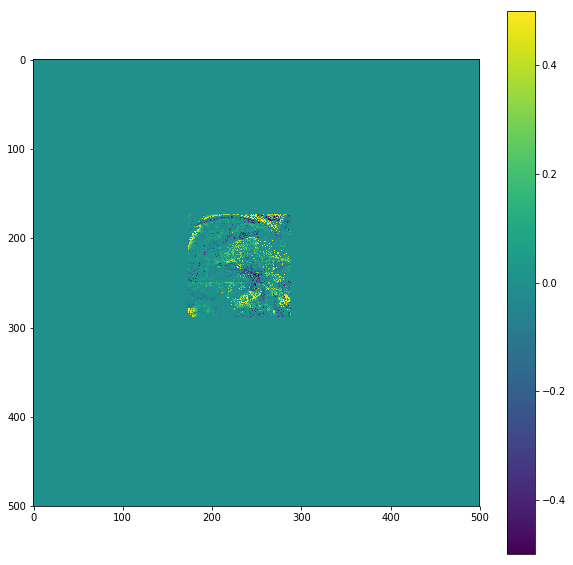

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(phd)
plt.colorbar()
# plt.clim(0,0.005)
plt.show()

In [ ]:
y = 300
x = 250
ph = phis0[y,x]
th = thetas0[y,x]
th0 = 0.9
ph0 = 1.1
n = 1.6
I = Is[y,x,:].flatten()

sol = root(system1, (ph0, th0, 1.6), args=(I), method='lm', tol=0.000001)
print (sol.x[0], th, sol.x[2], system1((sol.x[0], sol.x[1], sol.x[2]),(I)))
print (ph, th, n, system1((ph, th, n),(I)))

In [ ]:
ph = 1.1
th = 0.9
phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))
for y in range(0, 500):
    if y%100 == 0:
        print ("y =", y)
    for x in range (0, 500):
        if np.isnan(dm[y,x]):
            continue

        I = Is[y,x,:].flatten()
        sol = root(system1, (1.1, 0.9, 1.6), args=(I), method='lm', tol=0.00001)
            
        ph = pied(sol.x[0])
        th = pi2ed(sol.x[1])
        phis[y,x] = sol.x[0]
        thetas[y,x] = sol.x[1]
        ns[y,x] = sol.x[2]
        ress = system1((sol.x[0], sol.x[1], sol.x[2]), (I))
        ress1 = [abs(xx) for xx in ress]
#         print (sum(ress1), sol.x[2])

In [ ]:
res1 = system1((1.5796033696071434, 0.9459872649068347, 1.997700058230306), (I))
# print (ph, th)
print (res1)
res1 = [abs(xx) for xx in res1]
res0 = sum(res1)
print ("real =", res0)

In [ ]:
phsh = -pi + 375*2*pi/1000
thsh = 823*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
phsh = -pi + 592*2*pi/1000
thsh = 464*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
# res[ind] = 1
thetas[250,249]

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(phis)
plt.colorbar()
plt.clim(-pi,pi)
plt.show()


# 75*(pi/2+0.1)/100

In [ ]:
pi

### I get wrong minimum with 0 value. find the reason. 

Unfortunately, the method generates faulty mins. On the example above (50, 70) is the minimum, although not the correct one. And correct one won't appear, because 1 pixel error in remapping make it bigger than phantom min. This can be fixed in the simulation but won't work stable in the actual system.

In [ ]:
Run tests with:
    ps = 0
    Ip = 0
    
and see if I get classic results

In [ ]:
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

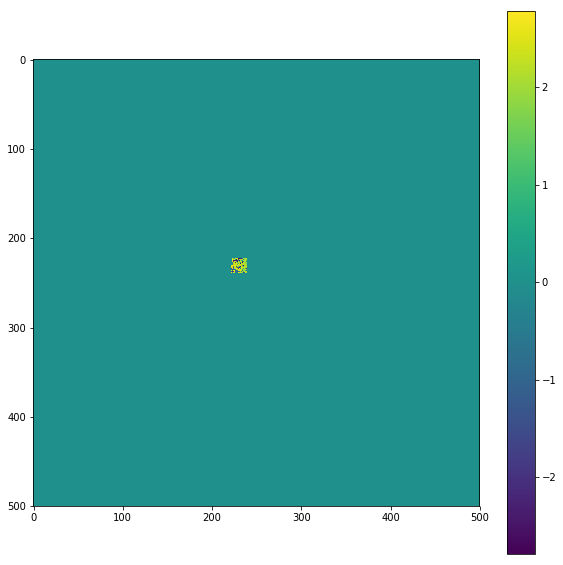

In [113]:
plt.figure(figsize=(10,10))
plt.imshow(phis)
plt.colorbar()
# plt.clim(0,1.7)
plt.show()